#                                                                                                         Elo Predicting Loyalty Score

 #  1. Description

Imagine being hungry in an unfamiliar part of town and getting restaurant recommendations served up, based on your personal preferences, at just the right moment. The recommendation comes with an attached discount from your credit card provider for a local place around the corner!

Right now, Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. But do these promotions work for either the consumer or the merchant? Do customers enjoy their experience? Do merchants see repeat business? Personalization is key.

Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.

In this competition, Kagglers will develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty. Your input will improve customers’ lives and help Elo reduce unwanted campaigns, to create the right experience for customers.

> # 2. Business Problem

# 2.1 Overview

Nowadays many of us use credit card for transaction. As the name
suggests using credit card one can perform transaction even if there is
insufficient balance in the Bank Account and the same amount needs
to be paid in the next billing cycle by the credit cardholder. Although
The basic operation is same for all the credit cards still to retain
customers and make use of credit cards more , credit card providers
offer various discount coupons and promotions occasionally for the
eligible customers. This also helps the merchants to expand the
business where the customers can spend the money.

Elo is one of the largest payment brands in Brazil, has built
partnerships with merchants in order to offer promotions or discounts
to cardholders.Elo wants to build machine learning models to
understand the most important aspects and preferences in their
customers' lifecycle, from food to shopping so that they can provide
more relevant and personalized promotions to the cardholders.

So in summary, our task is to predict the customer loyalty score (a real
number value) based on the transaction history. Which will help Elo to
personalize the offers and discount coupons to check whether the
promotions are working as expected for the consumer or the
merchant. or customers are really enjoying their experiences and
repeat business is also occurring for the merchants.
Research-

# 2.2 Problem Statement

1. Predict loyalty score for a customer based on his/her purchasing history on credit card
2. Predicting loyalty score would be useful as it will help the credit card provider to offer discount coupons and various promotional offers.
3. This is useful as customer might spend more money to avail them which in returns expands the bisuness  

# 2.3 Dataset source

> credit: Kaggle

https://www.kaggle.com/c/elo-merchant-category-recommendation/data

# 2.4 Useful links

https://www.researchgate.net/publication/335158533_Predicting_Customer_Loyalty_Using_Various_Regression_Models

https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/77537

https://brendanhasz.github.io/2019/04/04/loyalty-prediction-2-features.html

https://medium.com/@charansai_k/predicting-loyalty-scores-for-elo-merchant-category-using-ml-models-fromscratch-to-deployment-2346b157b837

# 2.5 Business Constraints

* Accuracy should be high , since low or medium accuracy can severely impact the business
* There is no strict low latency requirements , as predicting loyalty score needn't to be immediate and it's acceptable if it takes time
* Even though there is no strict requirement of interpretability still it is partially important , as it will help the card_provider to understand the purchasing behavior of the customers, based on which customers might receive promotional offers.

# 3. Data

# 3.1 Data Overview

We have total 5 csv files,
train.csv - features are card details of traindataset,first_active_month,card_id, three categorical features -
feature_1,feature_2,feature_3 and the target value

test.csv - features are same as train.csv only the target value doesn't present

historical_transactions.csv - It contains up to 3 months' worth of transactions for every card at any of the provided merchant_ids

new_merchant_transactions.csv - The features are same as historical_transactions.csv. However it contains the transactions at new merchants (merchant_ids that this particular card_id has not yet visited) over a period of two months.

and the last one is merchants.csv , It contains aggregate information for each merchant_id represented in the data set.

Along with the above, we have data dictionary also which explains each features.

# 3.2 Example Data Points

* "first_active_month" ,	"card_id" ,  "feature_1"  ,	"feature_2" ,	"feature_3" ,	"target"
           2017-06 , 	 C_ID_92a2005557 ,	5  ,	          2	,             1,	    ,-0.820283

* 'authorized_flag', 'card_id', 'city_id', 'category_1', 'installments','category_3', 'merchant_category_id', merchant_id', 'month_lag','purchase_amount', 'purchase_date', 'category_2', 'state_id','subsector_id'

Y	,C_ID_4e6213e9bc,	88,	N,	0,	A,	80,	M_ID_e020e9b302,	-8,	-0.703331,	2017-06-25 15:33:07,	1.0,	16,	37

* merchant_id,	merchant_group_id,	merchant_category_id,	subsector_id,	numerical_1,	numerical_2,	category_1,	most_recent_sales_range,	most_recent_purchases_range,	avg_sales_lag3,	avg_sales_lag6,	avg_purchases_lag6,	active_months_lag6,	avg_sales_lag12,	avg_purchases_lag12,	active_months_lag12,	category_4,	city_id,	state_id,	category_2

0,	M_ID_838061e48c,	8353,	792,	9,	-0.057471,	-0.057471,	N,	E,	E,	-0.40,	-2.25,	18.666667,	6,	-2.32,	13.916667,	12,	N,	242,	9,	1.0

# 4. Machine Learning Problem

# 4.1 Type

> Clearly this is a regression problem as we need to predict loyalty score which is the real number 

# 4.2 Performance Metric

> we will use Root mean squared error (RMSE) as performance metric

# 4.3 Train-Test Construction

> We will split the data in 70-30 ratio for evaluating and developing the model before predict on the actual test dataset 

# 5. Exploratory Data Analysis

In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elo-concat/datas.csv
/kaggle/input/elo-merchant-category-recommendation/new_merchant_transactions.csv
/kaggle/input/elo-merchant-category-recommendation/merchants.csv
/kaggle/input/elo-merchant-category-recommendation/test.csv
/kaggle/input/elo-merchant-category-recommendation/sample_submission.csv
/kaggle/input/elo-merchant-category-recommendation/historical_transactions.csv
/kaggle/input/elo-merchant-category-recommendation/train.csv
/kaggle/input/elo-merchant-category-recommendation/Data_Dictionary.xlsx
/kaggle/input/elo-merchant-category-recommendation/Data Dictionary.xlsx


In [90]:
#import the required libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#Load the test dataset
test_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/test.csv')
test_csv.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3'], dtype='object')

In [92]:
#load the train dataset
train_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/train.csv')
train_csv.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

In [93]:
print("shape of train:",train_csv.shape)
print("shape of test:",test_csv.shape)

shape of train: (201917, 6)
shape of test: (123623, 5)


In [94]:
test_csv.head()

first_active_month          card_id  feature_1  feature_2  feature_3
0            2017-04  C_ID_0ab67a22ab          3          3          1
1            2017-01  C_ID_130fd0cbdd          2          3          0
2            2017-08  C_ID_b709037bc5          5          1          1
3            2017-12  C_ID_d27d835a9f          2          1          0
4            2015-12  C_ID_2b5e3df5c2          5          1          1

In [95]:
train_csv.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   
1            2017-01  C_ID_3d0044924f          4          1          0   
2            2016-08  C_ID_d639edf6cd          2          2          0   
3            2017-09  C_ID_186d6a6901          4          3          0   
4            2017-11  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [96]:
test_csv.describe()

feature_1      feature_2      feature_3
count  123623.00000  123623.000000  123623.000000
mean        3.10926       1.741796       0.564377
std         1.18911       0.749195       0.495840
min         1.00000       1.000000       0.000000
25%         2.00000       1.000000       0.000000
50%         3.00000       2.000000       1.000000
75%         4.00000       2.000000       1.000000
max         5.00000       3.000000       1.000000

In [97]:
train_csv.describe()

feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569      -0.393636
std         1.186160       0.751362       0.495683       3.850500
min         1.000000       1.000000       0.000000     -33.219281
25%         2.000000       1.000000       0.000000      -0.883110
50%         3.000000       2.000000       1.000000      -0.023437
75%         4.000000       2.000000       1.000000       0.765453
max         5.000000       3.000000       1.000000      17.965068

In [98]:
#to check if there is any common card_id exists in both train and test dataset
duplicate_card_id=set(train_csv['card_id']).intersection(set(test_csv['card_id']))
print('duplicate_card_id:',duplicate_card_id)

duplicate_card_id: set()


Hence there is no common card_id in train and test dataset

In [99]:
#to check if any duplicate card_id present in train & test dataset
duplicate_train = train_csv[train_csv.duplicated(['card_id'])]
duplicate_test = test_csv[test_csv.duplicated(['card_id'])]
print("duplicate card_id in train:",duplicate_train)
print("duplicate in test:",duplicate_test)

duplicate card_id in train: Empty DataFrame
Columns: [first_active_month, card_id, feature_1, feature_2, feature_3, target]
Index: []
duplicate in test: Empty DataFrame
Columns: [first_active_month, card_id, feature_1, feature_2, feature_3]
Index: []


Hence there is no duplicate entry in both train and test dataset based on card_id

In [100]:
#check whether NULL value present
print("********************************************************")
print("For train.csv")
print("********************************************************")
for i in train_csv.columns:
    if (train_csv[i].isnull().sum() > 0):
        print("Total NULL values in ", i ,":",train_csv[i].isnull().sum())

print("********************************************************")
print("For test.csv")
print("********************************************************")
for i in test_csv.columns:
    if (test_csv[i].isnull().sum() > 0):
        print("Total NULL values in ", i ,":",test_csv[i].isnull().sum())

********************************************************
For train.csv
********************************************************
********************************************************
For test.csv
********************************************************
Total NULL values in  first_active_month : 1


In [101]:
test_csv[test_csv['first_active_month'].isnull()]

first_active_month          card_id  feature_1  feature_2  feature_3
11578                NaN  C_ID_c27b4f80f7          5          2          1

Hence there is no Null values in train dataset , however in test dataset one null value exists for the first_active_month for the card_id C_ID_c27b4f80f7 . 

we will check later what can be done with this Null value

# EDA - Plot feature_1 in both train test dataset

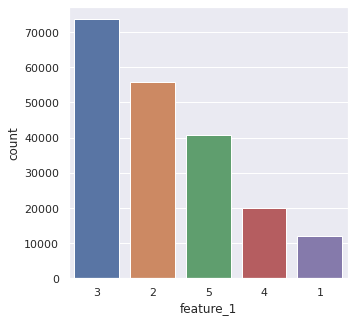

In [102]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style(style="darkgrid")
ax=sns.countplot(x="feature_1",data=train_csv,order=train_csv['feature_1'].value_counts().index)

clearly in feature_1 , category 3 is dominating

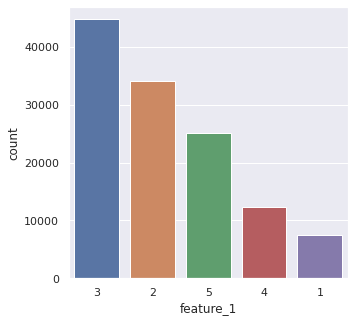

In [103]:
sns.set_style(style="darkgrid") 
#ax=sns.countplot(x="feature_1",data=test_csv)

ax=sns.countplot(x="feature_1",data=test_csv,order=test_csv['feature_1'].value_counts().index)
#order=df_faculty['PhdDecade'].value_counts().index

In [104]:
print("Percentage of category_1 in train:",len(train_csv[train_csv['feature_1'] == 1])/len(train_csv['feature_1'])*100)
print("Percentage of category_1 in test:",len(test_csv[test_csv['feature_1'] == 1])/len(test_csv['feature_1'])*100)
print("Percentage of category_2 in train:",len(train_csv[train_csv['feature_1'] == 2])/len(train_csv['feature_1'])*100)
print("Percentage of category_2 in test:",len(test_csv[test_csv['feature_1'] == 2])/len(test_csv['feature_1'])*100)
print("Percentage of category_3 in train:",len(train_csv[train_csv['feature_1'] == 3])/len(train_csv['feature_1'])*100)
print("Percentage of category_3 in test:",len(test_csv[test_csv['feature_1'] == 3])/len(test_csv['feature_1'])*100)
print("Percentage of category_4 in train:",len(train_csv[train_csv['feature_1'] == 4])/len(train_csv['feature_1'])*100)
print("Percentage of category_4 in test:",len(test_csv[test_csv['feature_1'] == 4])/len(test_csv['feature_1'])*100)
print("Percentage of category_5 in train:",len(train_csv[train_csv['feature_1'] == 5])/len(train_csv['feature_1'])*100)
print("Percentage of category_5 in test:",len(test_csv[test_csv['feature_1'] == 5])/len(test_csv['feature_1'])*100)


Percentage of category_1 in train: 5.961360360940386
Percentage of category_1 in test: 5.990794593239122
Percentage of category_2 in train: 27.633631640723667
Percentage of category_2 in test: 27.59599750855423
Percentage of category_3 in train: 36.43724896863563
Percentage of category_3 in test: 36.17368936201192
Percentage of category_4 in train: 9.84810590490152
Percentage of category_4 in test: 9.975489997815941
Percentage of category_5 in train: 20.119653124798802
Percentage of category_5 in test: 20.26402853837878


in test dataset also category-3 appears in most number of cases in feature_1. And the distribution is also almost same for train and test dataset. 

We will check the same counterplot for other two categorical features as well

# plot feature_2:

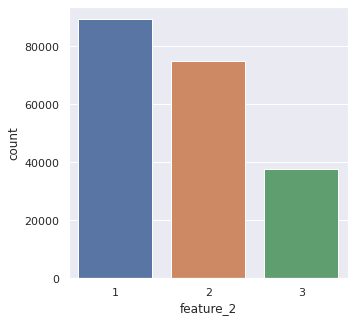

In [105]:
sns.set_style(style="darkgrid")
ax=sns.countplot(x="feature_2",data=train_csv)

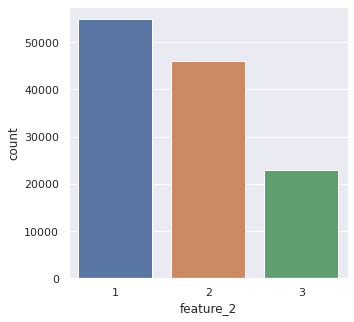

In [106]:
sns.set_style(style="darkgrid")
ax=sns.countplot(x="feature_2",data=test_csv)

In [107]:
print("Percentage of category_1 in train:",len(train_csv[train_csv['feature_2'] == 1])/len(train_csv['feature_2'])*100)
print("Percentage of category_1 in test:",len(test_csv[test_csv['feature_2'] == 1])/len(test_csv['feature_2'])*100)
print("Percentage of category_2 in train:",len(train_csv[train_csv['feature_2'] == 2])/len(train_csv['feature_2'])*100)
print("Percentage of category_2 in test:",len(test_csv[test_csv['feature_2'] == 2])/len(test_csv['feature_2'])*100)
print("Percentage of category_3 in train:",len(train_csv[train_csv['feature_2'] == 3])/len(train_csv['feature_2'])*100)
print("Percentage of category_3 in test:",len(test_csv[test_csv['feature_2'] == 3])/len(test_csv['feature_2'])*100)

Percentage of category_1 in train: 44.19736822555802
Percentage of category_1 in test: 44.3080980076523
Percentage of category_2 in train: 37.06423926662936
Percentage of category_2 in test: 37.20424192909086
Percentage of category_3 in train: 18.738392507812616
Percentage of category_3 in test: 18.487660063256836


# plot feature_3:

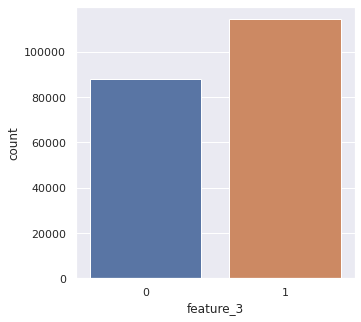

In [108]:
sns.set_style(style="darkgrid")
ax=sns.countplot(x="feature_3",data=train_csv)

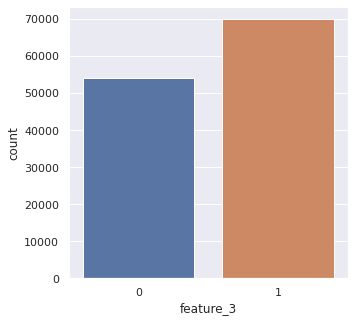

In [109]:
sns.set_style(style="darkgrid")
ax=sns.countplot(x="feature_3",data=test_csv)

In [110]:
print("Percentage of category_0 in train:",len(train_csv[train_csv['feature_3'] == 0])/len(train_csv['feature_3'])*100)
print("Percentage of category_0 in test:",len(test_csv[test_csv['feature_3'] == 0])/len(test_csv['feature_3'])*100)
print("Percentage of category_1 in train:",len(train_csv[train_csv['feature_3'] == 1])/len(train_csv['feature_3'])*100)
print("Percentage of category_1 in test:",len(test_csv[test_csv['feature_3'] == 1])/len(test_csv['feature_3'])*100)


Percentage of category_0 in train: 43.44309790656557
Percentage of category_0 in test: 43.5622820996093
Percentage of category_1 in train: 56.55690209343444
Percentage of category_1 in test: 56.4377179003907


**Conclusion:** The distribution is almost similar for the three categorical features. We need to convert them using one hot encoding

# plot target feature:

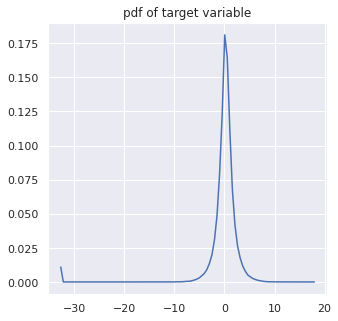

In [111]:
counts,bin_edges = np.histogram (train_csv['target'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of target variable")
plt.show()

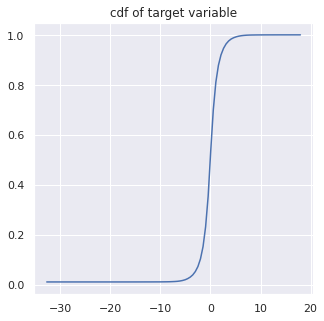

In [112]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of target variable")
plt.show()

Text(0, 0.5, 'loyalty score')

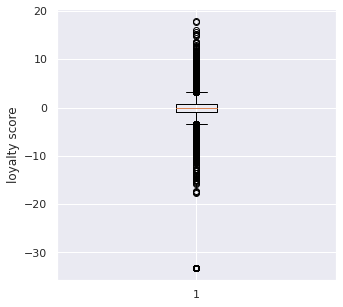

In [113]:
plt.boxplot(train_csv['target'])
plt.ylabel("loyalty score")

from the pdf and cdf we could see maximum values present in between (-10,10) . To get more insightful we will look for the percentile data

In [114]:
print("The 10th percentile of loyalty score is :", np.percentile(train_csv['target'],[10]))
print("The 20th percentile of loyalty score is :", np.percentile(train_csv['target'],[20]))
print("The 30th percentile of loyalty score is :", np.percentile(train_csv['target'],[30]))
print("The 40th percentile of loyalty score is :", np.percentile(train_csv['target'],[40]))
print("The 50th percentile of loyalty score is :", np.percentile(train_csv['target'],[50]))
print("The 60th percentile of loyalty score is :", np.percentile(train_csv['target'],[60]))
print("The 70th percentile of loyalty score is :", np.percentile(train_csv['target'],[70]))
print("The 80th percentile of loyalty score is :", np.percentile(train_csv['target'],[80]))
print("The 90th percentile of loyalty score is :", np.percentile(train_csv['target'],[90]))
print("The 100th percentile of loyalty score is :", np.percentile(train_csv['target'],[100]))

The 10th percentile of loyalty score is : [-2.04229431]
The 20th percentile of loyalty score is : [-1.14604072]
The 30th percentile of loyalty score is : [-0.66396523]
The 40th percentile of loyalty score is : [-0.31219633]
The 50th percentile of loyalty score is : [-0.02343689]
The 60th percentile of loyalty score is : [0.23619123]
The 70th percentile of loyalty score is : [0.56450805]
The 80th percentile of loyalty score is : [1.01425502]
The 90th percentile of loyalty score is : [1.83028022]
The 100th percentile of loyalty score is : [17.9650684]


let's go for more deep

In [115]:
for i in range (1,11):
    print("The" ,i, "th percentile of loyalty score is :", np.percentile(train_csv['target'],[i]))

The 1 th percentile of loyalty score is : [-33.21928095]
The 2 th percentile of loyalty score is : [-5.01607721]
The 3 th percentile of loyalty score is : [-4.06320537]
The 4 th percentile of loyalty score is : [-3.49365557]
The 5 th percentile of loyalty score is : [-3.10783563]
The 6 th percentile of loyalty score is : [-2.8080848]
The 7 th percentile of loyalty score is : [-2.56256506]
The 8 th percentile of loyalty score is : [-2.36225974]
The 9 th percentile of loyalty score is : [-2.19336072]
The 10 th percentile of loyalty score is : [-2.04229431]


if we check for the minimum value , it seems around 1% of data have very less loyalty score -30

In [116]:
for i in range (80,101):
    print("The" ,i, "th percentile of loyalty score is :", np.percentile(train_csv['target'],[i]))

The 80 th percentile of loyalty score is : [1.01425502]
The 81 th percentile of loyalty score is : [1.07173898]
The 82 th percentile of loyalty score is : [1.13227365]
The 83 th percentile of loyalty score is : [1.19754612]
The 84 th percentile of loyalty score is : [1.26898947]
The 85 th percentile of loyalty score is : [1.34520843]
The 86 th percentile of loyalty score is : [1.42507187]
The 87 th percentile of loyalty score is : [1.51228911]
The 88 th percentile of loyalty score is : [1.60639673]
The 89 th percentile of loyalty score is : [1.71256874]
The 90 th percentile of loyalty score is : [1.83028022]
The 91 th percentile of loyalty score is : [1.95925439]
The 92 th percentile of loyalty score is : [2.10680338]
The 93 th percentile of loyalty score is : [2.28343475]
The 94 th percentile of loyalty score is : [2.47487263]
The 95 th percentile of loyalty score is : [2.70268023]
The 96 th percentile of loyalty score is : [2.99319449]
The 97 th percentile of loyalty score is : [3.36

similarly if we go  for the max loyalty score , then around 1% data have extreme high loyalty score <5. If they are outlier then they will create issue if we perform linear regression.

We will check later in feature engineering steps if we need to eliminate them or replace with other values or we can keep them as it is..

In [117]:
min(train_csv['target'])

-33.21928095

our next target is , we will check if we can plot each features against loyalty score and plot histogram of date

In [118]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000000

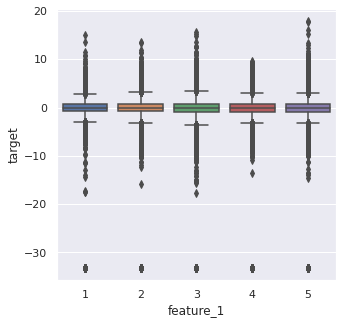

In [119]:
ax=sns.boxplot(x="feature_1",y="target",data=train_csv)

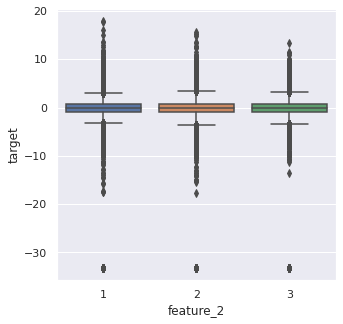

In [120]:
ax=sns.boxplot(x="feature_2",y="target",data=train_csv)

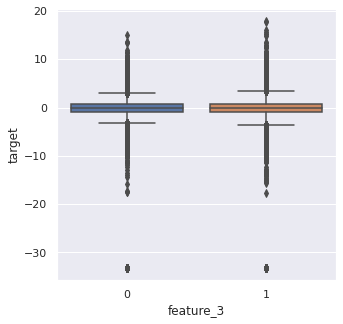

In [121]:
ax=sns.boxplot(x="feature_3",y="target",data=train_csv)

Unfortunately none of the plots are clear, so we can't conclude anything just by using the categorical features (feature_1,feature_2,feature_3) as they are not worthy  

# plot first_active_month

As the data type is object , we will convert it to pandas datetime format so that we can perform operations into it

In [122]:
# convert the datatype of first_active_month to datetime 
test_csv['first_active_month']=pd.to_datetime(train_csv['first_active_month'],format='%Y-%m')
train_csv['first_active_month']=pd.to_datetime(train_csv['first_active_month'],format='%Y-%m')

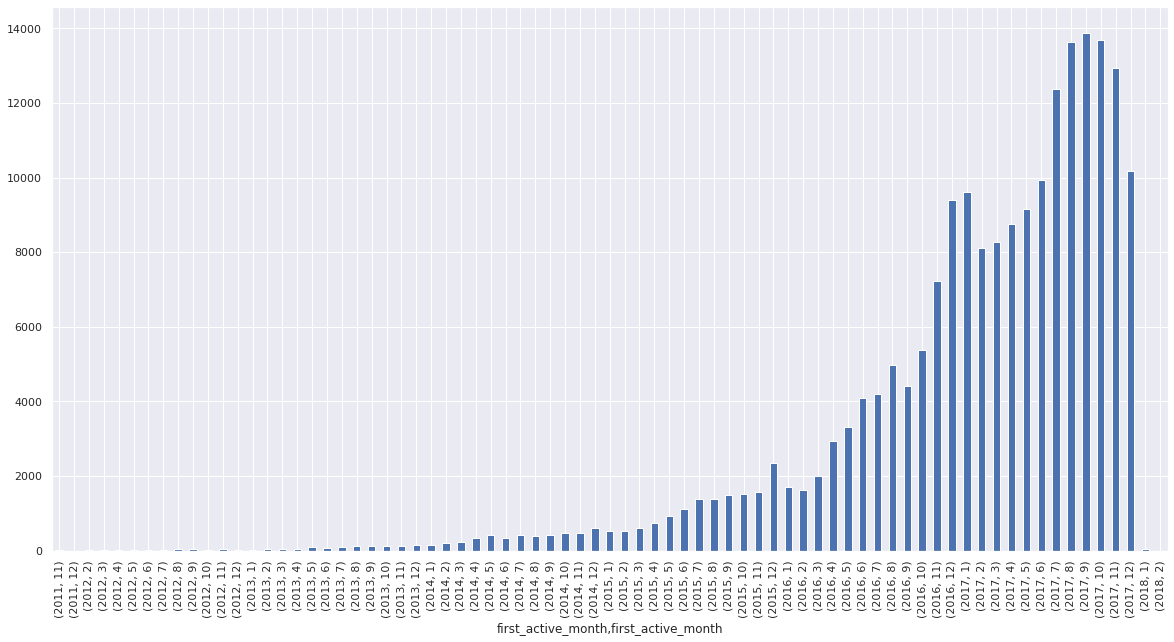

In [123]:
#ref: https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})
train_csv['first_active_month'].groupby([train_csv['first_active_month'].dt.year, train_csv['first_active_month'].dt.month]).count().plot(kind="bar")

As the time passes by, the count also increases . But there is a sudden drop after Jan'2017. Also one interesting fact is we have data till Jan'2018 only and that number is also very less. And most of the date belongs to 2016 to 2018

let's check for test data

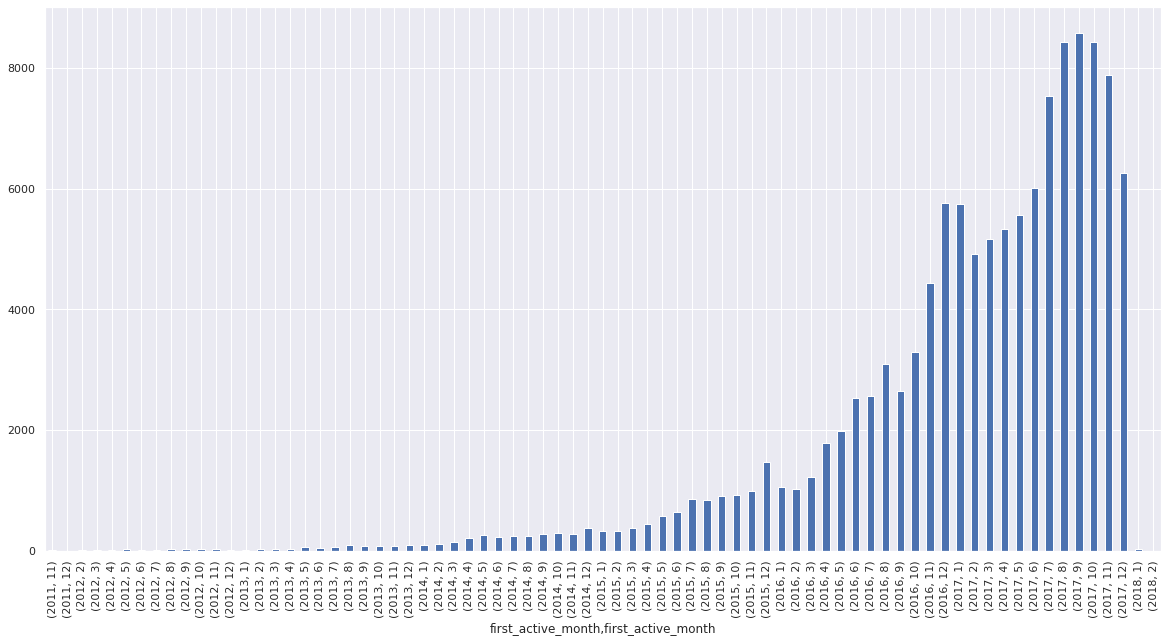

In [124]:
test_csv['first_active_month'].groupby([test_csv['first_active_month'].dt.year, test_csv['first_active_month'].dt.month]).count().plot(kind="bar")

And same pattern continues in test dataset as well. so we have more recent data than historical (past) . It would be difficult for us to understand tif we had less recent data in comparison with past one.  

In [125]:
#load historical_transactions
historical_transactions=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/historical_transactions.csv')
historical_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [126]:
#load new_merchant_transactions
new_merchant_transactions=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/new_merchant_transactions.csv')
new_merchant_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [127]:
print("shape of historical_transaction:",historical_transactions.shape)
print("shape of new_merchant_transactions: ",new_merchant_transactions.shape)

shape of historical_transaction: (29112361, 14)
shape of new_merchant_transactions:  (1963031, 14)


In [128]:
historical_transactions.head(10)

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   
5               Y  C_ID_4e6213e9bc      333          N             0   
6               Y  C_ID_4e6213e9bc       88          N             0   
7               Y  C_ID_4e6213e9bc        3          N             0   
8               Y  C_ID_4e6213e9bc       88          N             0   
9               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   
5          A                    80  M_ID_50af771f8d          0   
6          A                   278  M_ID_5e8220e564        -11   
7          A                    80  M_ID_9d41786a50         -3   
8          A                    80  M_ID_979ed661fc         -8   
9          A                    80  M_ID_74ba14b5fc        -11   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.703331  2017-06-25 15:33:07         1.0        16            37  
1        -0.733128  2017-07-15 12:10:45         1.0        16            16  
2        -0.720386  2017-08-09 22:04:29         1.0        16            37  
3        -0.735352  2017-09-02 10:06:26         1.0        16            34  
4        -0.722865  2017-03-10 01:14:19         1.0        16            37  
5        -0.734887  2018-02-24 08:45:05         1.0         9            37  
6        -0.716855  2017-03-21 00:10:51         1.0        16            37  
7        -0.657049  2017-11-18 20:05:55         1.0        16            37  
8        -0.737967  2017-06-01 22:02:56         1.0        16            37  
9        -0.715352  2017-03-16 15:41:22         1.0        16            37

In [129]:
new_merchant_transactions.head(10)

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   
5               Y  C_ID_ef55cf8d4b      231          N             1   
6               Y  C_ID_ef55cf8d4b       69          N             1   
7               Y  C_ID_ef55cf8d4b      231          N             1   
8               Y  C_ID_ef55cf8d4b       69          N             1   
9               Y  C_ID_ef55cf8d4b       69          N             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   
5          B                   367  M_ID_8874615e00          2   
6          B                   333  M_ID_6d061b5ddc          1   
7          B                   307  M_ID_df1e022f41          2   
8          B                   278  M_ID_d15eae0468          2   
9          B                   437  M_ID_5f9bffd028          1   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.557574  2018-03-11 14:57:36         1.0         9            19  
1        -0.569580  2018-03-19 18:53:37         1.0         9            19  
2        -0.551037  2018-04-26 14:08:44         1.0         9            14  
3        -0.671925  2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904  2018-03-22 21:07:53         NaN        -1            29  
5        -0.633007  2018-04-02 12:53:28         1.0         9            16  
6         5.263697  2018-03-28 19:50:19         1.0         9            10  
7        -0.553787  2018-04-05 08:06:52         1.0         9            19  
8        -0.596643  2018-04-07 18:37:40         1.0         9            37  
9        -0.607191  2018-03-17 18:10:41         1.0         9            15

In [130]:
historical_transactions.describe()

city_id  installments  merchant_category_id     month_lag  \
count  2.911236e+07  2.911236e+07          2.911236e+07  2.911236e+07   
mean   1.293256e+02  6.484954e-01          4.810130e+02 -4.487294e+00   
std    1.042563e+02  2.795577e+00          2.493757e+02  3.588800e+00   
min   -1.000000e+00 -1.000000e+00         -1.000000e+00 -1.300000e+01   
25%    5.300000e+01  0.000000e+00          3.070000e+02 -7.000000e+00   
50%    9.000000e+01  0.000000e+00          4.540000e+02 -4.000000e+00   
75%    2.120000e+02  1.000000e+00          7.050000e+02 -2.000000e+00   
max    3.470000e+02  9.990000e+02          8.910000e+02  0.000000e+00   

       purchase_amount    category_2      state_id  subsector_id  
count     2.911236e+07  2.645950e+07  2.911236e+07  2.911236e+07  
mean      3.640090e-02  2.194578e+00  1.056679e+01  2.684839e+01  
std       1.123522e+03  1.531896e+00  6.366927e+00  9.692793e+00  
min      -7.469078e-01  1.000000e+00 -1.000000e+00 -1.000000e+00  
25%      -7.203559e-01  1.000000e+00  9.000000e+00  1.900000e+01  
50%      -6.883495e-01  1.000000e+00  9.000000e+00  2.900000e+01  
75%      -6.032543e-01  3.000000e+00  1.600000e+01  3.400000e+01  
max       6.010604e+06  5.000000e+00  2.400000e+01  4.100000e+01

In [131]:
new_merchant_transactions.describe()

city_id  installments  merchant_category_id     month_lag  \
count  1.963031e+06  1.963031e+06          1.963031e+06  1.963031e+06   
mean   1.343867e+02  6.829643e-01          4.309701e+02  1.476515e+00   
std    1.015152e+02  1.584069e+00          2.463385e+02  4.994483e-01   
min   -1.000000e+00 -1.000000e+00         -1.000000e+00  1.000000e+00   
25%    6.900000e+01  0.000000e+00          2.780000e+02  1.000000e+00   
50%    1.100000e+02  1.000000e+00          3.670000e+02  1.000000e+00   
75%    2.120000e+02  1.000000e+00          6.830000e+02  2.000000e+00   
max    3.470000e+02  9.990000e+02          8.910000e+02  2.000000e+00   

       purchase_amount    category_2      state_id  subsector_id  
count     1.963031e+06  1.851286e+06  1.963031e+06  1.963031e+06  
mean     -5.509690e-01  2.197841e+00  1.088067e+01  2.597624e+01  
std       6.940043e-01  1.528125e+00  6.038542e+00  1.012908e+01  
min      -7.468928e-01  1.000000e+00 -1.000000e+00 -1.000000e+00  
25%      -7.166294e-01  1.000000e+00  9.000000e+00  1.900000e+01  
50%      -6.748406e-01  1.000000e+00  9.000000e+00  2.900000e+01  
75%      -5.816162e-01  3.000000e+00  1.500000e+01  3.400000e+01  
max       2.631575e+02  5.000000e+00  2.400000e+01  4.100000e+01

However, describe() function is not so useful , as most of them have categorical features instead of numerical features.

we will quickly check for the duplicate & NaN value.


In [132]:
print("duplicate card_id in historical_transactions:",historical_transactions.pivot_table(index=['card_id'], aggfunc='size'))
print("duplicate merchant_id in historical_transactions:",historical_transactions.pivot_table(index=['merchant_id'], aggfunc='size'))
print("duplicate card_id in new_merchant_transactions:",new_merchant_transactions.pivot_table(index=['card_id'], aggfunc='size'))
print("duplicate merchant_id in new_merchant_transactions:",new_merchant_transactions.pivot_table(index=['merchant_id'], aggfunc='size'))

duplicate card_id in historical_transactions: card_id
C_ID_00007093c1    149
C_ID_0001238066    123
C_ID_0001506ef0     66
C_ID_0001793786    216
C_ID_000183fdda    144
                  ... 
C_ID_ffff1d9928     12
C_ID_ffff579d3a    114
C_ID_ffff756266     24
C_ID_ffff828181    190
C_ID_fffffd5772     84
Length: 325540, dtype: int64
duplicate merchant_id in historical_transactions: merchant_id
M_ID_000025127f     9
M_ID_0000699140    57
M_ID_00006a5552     1
M_ID_000087311e    22
M_ID_0000ab0b2d    30
                   ..
M_ID_fffeeb852d    21
M_ID_fffef87522     2
M_ID_ffff0af8e7    26
M_ID_ffff655e2c     3
M_ID_ffffc28eaa    17
Length: 326311, dtype: int64
duplicate card_id in new_merchant_transactions: card_id
C_ID_00007093c1     2
C_ID_0001238066    26
C_ID_0001506ef0     2
C_ID_0001793786    31
C_ID_000183fdda    11
                   ..
C_ID_ffff1d9928     4
C_ID_ffff579d3a     1
C_ID_ffff756266     1
C_ID_ffff828181     8
C_ID_fffffd5772     3
Length: 290001, dtype: int64
dupl

The result is expected , as same card_id can perform multiple transactions similarly same merchant_id can record multiple transactions.

So we will check for the entire duplicate row.

In [133]:
print("duplicate rows in historical_transactions:",historical_transactions[historical_transactions.duplicated(subset=None, keep='first')])

duplicate rows in historical_transactions: Empty DataFrame
Columns: [authorized_flag, card_id, city_id, category_1, installments, category_3, merchant_category_id, merchant_id, month_lag, purchase_amount, purchase_date, category_2, state_id, subsector_id]
Index: []


In [134]:
print("duplicate rows in new_merchant_transactions:",new_merchant_transactions[new_merchant_transactions.duplicated(subset=None, keep='first')])

duplicate rows in new_merchant_transactions: Empty DataFrame
Columns: [authorized_flag, card_id, city_id, category_1, installments, category_3, merchant_category_id, merchant_id, month_lag, purchase_amount, purchase_date, category_2, state_id, subsector_id]
Index: []


So , in both transactions dataset , no duplicate record present

In [135]:
# check whether NULL value present

print("********************************************************")
print("For historical_transactions")
print("********************************************************")
for i in historical_transactions.columns:
    if(historical_transactions[i].isnull().sum() > 0):
        print("Total NULL values in ", i ,":",historical_transactions[i].isnull().sum())

********************************************************
For historical_transactions
********************************************************
Total NULL values in  category_3 : 178159
Total NULL values in  merchant_id : 138481
Total NULL values in  category_2 : 2652864


As few NULL values present , we will check the total percentage for each features

In [136]:
for i in ['category_3','merchant_id','category_2']:
    print("Percentage of NULL values in ",i,":",historical_transactions[i].isnull().sum()/len(historical_transactions[i])*100)

Percentage of NULL values in  category_3 : 0.6119702898710276
Percentage of NULL values in  merchant_id : 0.4756776683278969
Percentage of NULL values in  category_2 : 9.1125003568072


In [137]:
print("********************************************************")
print("For new merchant transactions")
print("********************************************************")
for i in new_merchant_transactions.columns:
    if(new_merchant_transactions[i].isnull().sum() > 0):
        print("Total NULL values in ", i ,":",new_merchant_transactions[i].isnull().sum())

********************************************************
For new merchant transactions
********************************************************
Total NULL values in  category_3 : 55922
Total NULL values in  merchant_id : 26216
Total NULL values in  category_2 : 111745


In [138]:
for i in ['category_3','merchant_id','category_2']:
    print("Percentage of NULL values in ",i,":",new_merchant_transactions[i].isnull().sum()/len(new_merchant_transactions[i])*100)

Percentage of NULL values in  category_3 : 2.8487578647509895
Percentage of NULL values in  merchant_id : 1.3354857870303627
Percentage of NULL values in  category_2 : 5.692472508075522


In [139]:
# to check if there is any common entry for [city_id  merchant_id]. since as per the data definition there shouldn't be any
temp1=historical_transactions
temp2=new_merchant_transactions
temp1.merge(temp2,on=['card_id','merchant_id'])

Empty DataFrame
Columns: [authorized_flag_x, card_id, city_id_x, category_1_x, installments_x, category_3_x, merchant_category_id_x, merchant_id, month_lag_x, purchase_amount_x, purchase_date_x, category_2_x, state_id_x, subsector_id_x, authorized_flag_y, city_id_y, category_1_y, installments_y, category_3_y, merchant_category_id_y, month_lag_y, purchase_amount_y, purchase_date_y, category_2_y, state_id_y, subsector_id_y]
Index: []

[0 rows x 26 columns]

In [140]:
del temp1,temp2

In [141]:
#check if all the card_ids present in train and test dataset are also present in transactions dataset

card_id_train_test=set(train_csv['card_id']).union(set(test_csv['card_id']))
card_id_transactions=set(new_merchant_transactions['card_id']).union(set(historical_transactions['card_id']))
card_id_difference=card_id_train_test.difference(card_id_transactions)
print("card_id_difference:",card_id_difference)

card_id_difference: set()


As it returns empty set , so there is no such card_id for which we don't have any record in transaction dataset.

Now we can directly perform the univariate analysis

# plot authorized_flag

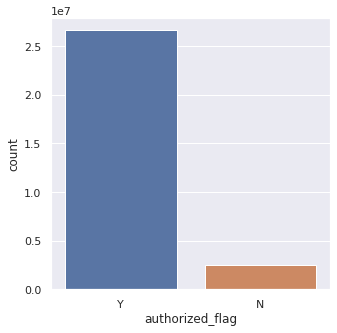

In [142]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style(style="darkgrid")
ax=sns.countplot(x="authorized_flag",data=historical_transactions)

Looks like most of the entries are Authorized, we will check the percentage 

In [143]:
result=historical_transactions[historical_transactions['authorized_flag'] == 'N']
percentage_Y=len(result)/len(historical_transactions['authorized_flag'])
print("Percentage of unauthorized transactions:",percentage_Y*100)

Percentage of unauthorized transactions: 8.64549941517969


So around 9% data are from unauthorized transactions which is very less. We will check in feature Engineering steps if we need to keep them.

Now check the same for new_merchant_transactions

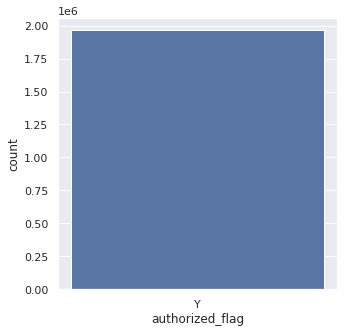

In [144]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style(style="darkgrid")
ax=sns.countplot(x="authorized_flag",data=new_merchant_transactions)

here all of the transactions are authorized

# Plot city_id

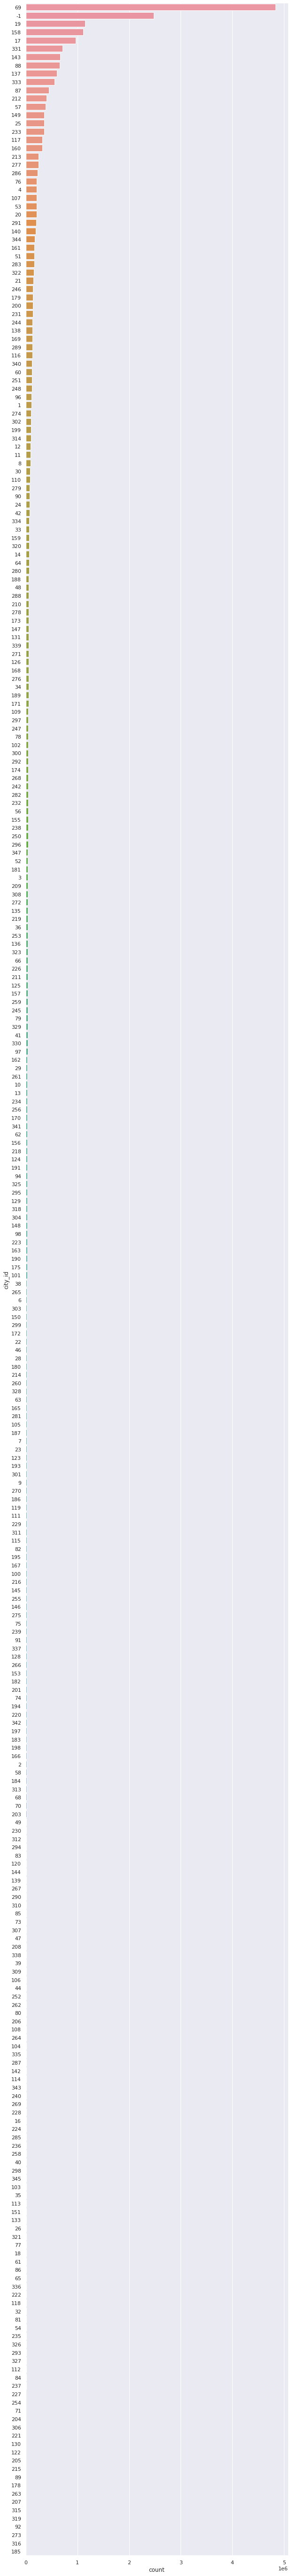

In [259]:
sns.set(rc={'figure.figsize':(10,100)})
sns.set_style(style="darkgrid")
ax=sns.countplot(y="city_id",data=historical_transactions,order=historical_transactions['city_id'].value_counts().index)

From the above counterplot , it gives us an intuitive idea which city_id recorded max number of transactions. We could also see there is a city_id which is -1. Till now we are not completely sure whether city_id can be negative values.

Now let's check for new_merchant_transactions

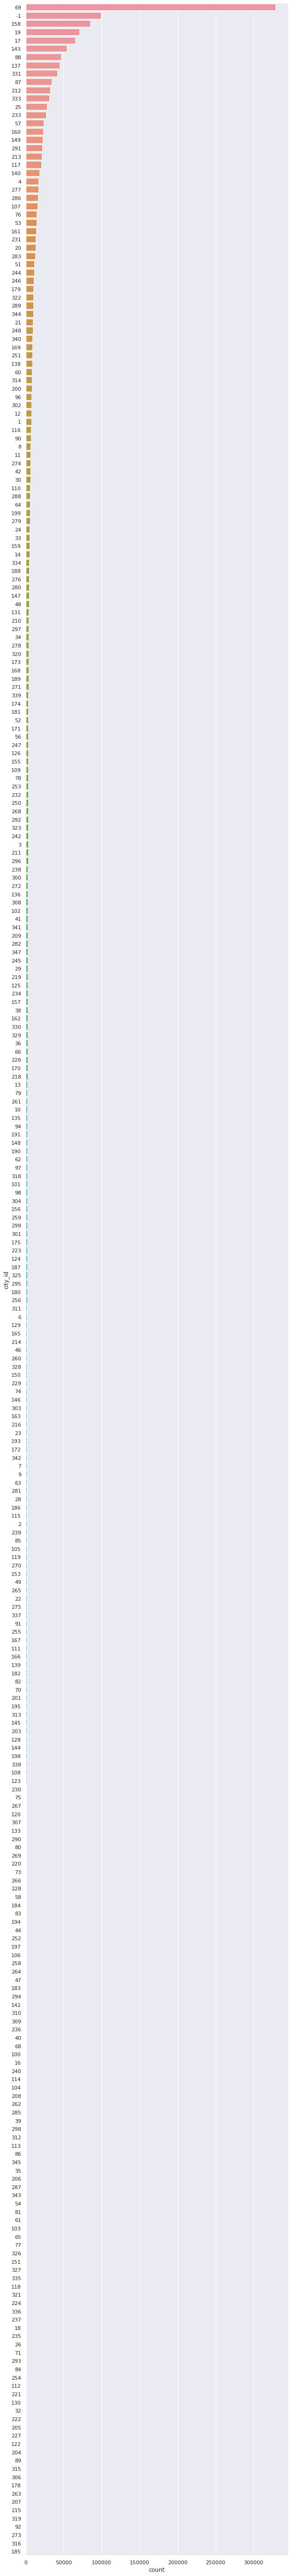

In [260]:
ax=sns.countplot(y="city_id",data=new_merchant_transactions,order=new_merchant_transactions['city_id'].value_counts().index)

Seems the city_id  -1, 69, 158 hold maximum number of transactions . Most of the cities recoreded very less transactions in comparison with them

# Plot category_1

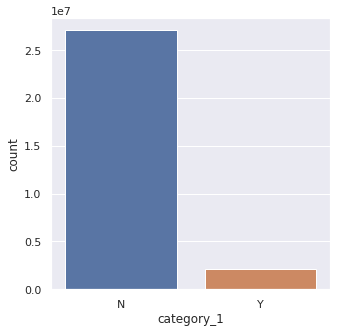

In [147]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style(style="darkgrid")
ax=sns.countplot(x="category_1",data=historical_transactions)

In [148]:
result=historical_transactions[historical_transactions['category_1'] == 'Y']
percentage_Y=len(result)/len(historical_transactions['category_1'])
print("Percentage of category_1 with Y:",percentage_Y*100)

Percentage of category_1 with Y: 7.158570890213954


So most of the data comes under 'N' in category_1. Only 7.15% comes under 'Y' category

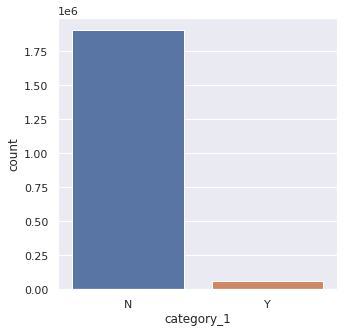

In [149]:
ax=sns.countplot(x="category_1",data=new_merchant_transactions)

In [150]:
result=new_merchant_transactions[new_merchant_transactions['category_1'] == 'Y']
percentage_Y=len(result)/len(new_merchant_transactions['category_1'])
print("Percentage of category_1 with Y:",percentage_Y*100)

Percentage of category_1 with Y: 3.2142131224621515


In new transactions also only 3.21% comes under 'Y' category

# plot installments

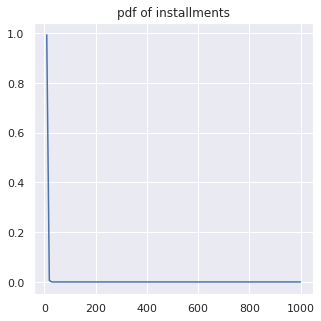

In [151]:
sns.set(rc={'figure.figsize':(5,5)})
counts,bin_edges = np.histogram (historical_transactions['installments'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of installments")
plt.show()

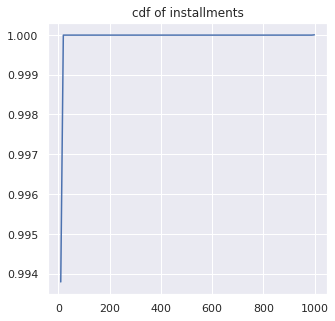

In [152]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of installments")
plt.show()

Text(0, 0.5, 'installment')

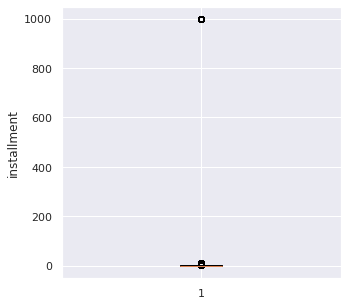

In [153]:
plt.boxplot(historical_transactions['installments'])
plt.ylabel("installment")

So from the above plots it is clear mostly are with 0 installments. Now we will check for percentile data

In [154]:
for i in [10,20,30,40,50,60,70,80,90,100]:
    print("The" ,i, "th percentile of  :", np.percentile(historical_transactions['installments'],[i]))

The 10 th percentile of  : [0.]
The 20 th percentile of  : [0.]
The 30 th percentile of  : [0.]
The 40 th percentile of  : [0.]
The 50 th percentile of  : [0.]
The 60 th percentile of  : [1.]
The 70 th percentile of  : [1.]
The 80 th percentile of  : [1.]
The 90 th percentile of  : [1.]
The 100 th percentile of  : [999.]


We will check more closely for 0th and 100th percentile

In [155]:
for i in range (0,11):
    print("The" ,i, "th percentile of  :", np.percentile(historical_transactions['installments'],[i]))

The 0 th percentile of  : [-1.]
The 1 th percentile of  : [0.]
The 2 th percentile of  : [0.]
The 3 th percentile of  : [0.]
The 4 th percentile of  : [0.]
The 5 th percentile of  : [0.]
The 6 th percentile of  : [0.]
The 7 th percentile of  : [0.]
The 8 th percentile of  : [0.]
The 9 th percentile of  : [0.]
The 10 th percentile of  : [0.]


In [156]:
for i in range (90,101):
    print("The" ,i, "th percentile :", np.percentile(historical_transactions['installments'],[i]))

The 90 th percentile : [1.]
The 91 th percentile : [1.]
The 92 th percentile : [1.]
The 93 th percentile : [1.]
The 94 th percentile : [2.]
The 95 th percentile : [2.]
The 96 th percentile : [3.]
The 97 th percentile : [3.]
The 98 th percentile : [4.]
The 99 th percentile : [6.]
The 100 th percentile : [999.]


Now we have installments with -1 , this should be outlier as installments can't be negative. Alternatively the installments of 999 is massive. There is a high chance that it is also an outlier.  

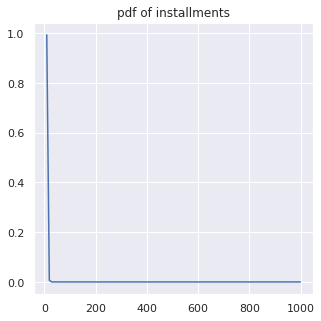

In [157]:
sns.set(rc={'figure.figsize':(5,5)})
counts,bin_edges = np.histogram (new_merchant_transactions['installments'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of installments")
plt.show()

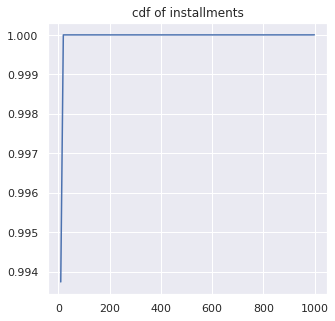

In [158]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of installments")
plt.show()

Text(0, 0.5, 'installment')

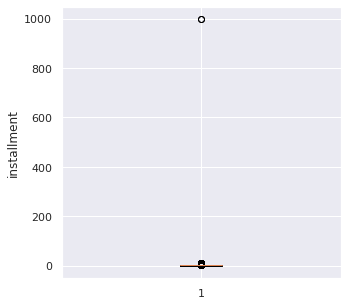

In [159]:
plt.boxplot(new_merchant_transactions['installments'])
plt.ylabel("installment")

In [160]:
for i in [10,20,30,40,50,60,70,80,90,100]:
    print("The" ,i, "th percentile of  :", np.percentile(new_merchant_transactions['installments'],[i]))

The 10 th percentile of  : [0.]
The 20 th percentile of  : [0.]
The 30 th percentile of  : [0.]
The 40 th percentile of  : [0.]
The 50 th percentile of  : [1.]
The 60 th percentile of  : [1.]
The 70 th percentile of  : [1.]
The 80 th percentile of  : [1.]
The 90 th percentile of  : [1.]
The 100 th percentile of  : [999.]


In [161]:
for i in range (0,11):
    print("The" ,i, "th percentile of  :", np.percentile(new_merchant_transactions['installments'],[i]))

The 0 th percentile of  : [-1.]
The 1 th percentile of  : [-1.]
The 2 th percentile of  : [-1.]
The 3 th percentile of  : [0.]
The 4 th percentile of  : [0.]
The 5 th percentile of  : [0.]
The 6 th percentile of  : [0.]
The 7 th percentile of  : [0.]
The 8 th percentile of  : [0.]
The 9 th percentile of  : [0.]
The 10 th percentile of  : [0.]


In [162]:
for i in range (90,101):
    print("The" ,i, "th percentile :", np.percentile(new_merchant_transactions['installments'],[i]))

The 90 th percentile : [1.]
The 91 th percentile : [1.]
The 92 th percentile : [1.]
The 93 th percentile : [2.]
The 94 th percentile : [2.]
The 95 th percentile : [2.]
The 96 th percentile : [3.]
The 97 th percentile : [3.]
The 98 th percentile : [4.]
The 99 th percentile : [6.]
The 100 th percentile : [999.]


Same thing is applicable for New transactions as well. In feature engineering steps we need to concentrate on this unexpected behavior if we need to keep them as it is or need to be replaced

# Plot category_3

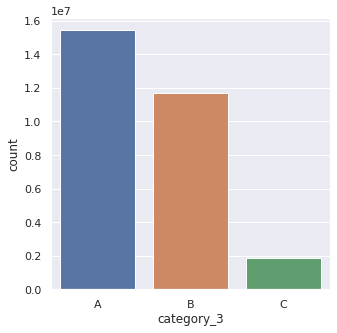

In [163]:
ax=sns.countplot(x="category_3",data=historical_transactions)

In [164]:
result=historical_transactions[historical_transactions['category_3'] == 'A']
percentage_Y=len(result)/len(historical_transactions['category_3'])
print("Percentage of category_3 with A:",percentage_Y*100)
result=historical_transactions[historical_transactions['category_3'] == 'B']
percentage_Y=len(result)/len(historical_transactions['category_3'])
print("Percentage of category_3 with B:",percentage_Y*100)
result=historical_transactions[historical_transactions['category_3'] == 'C']
percentage_Y=len(result)/len(historical_transactions['category_3'])
print("Percentage of category_3 with C:",percentage_Y*100)

Percentage of category_3 with A: 52.93884271358136
Percentage of category_3 with B: 40.11190298169221
Percentage of category_3 with C: 6.337284014855409


So mostly are from category 'A' followed by 'B' and 'C'. let's check for new transactions

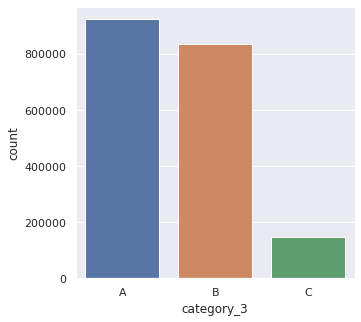

In [262]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.countplot(x="category_3",data=new_merchant_transactions,order=new_merchant_transactions['category_3'].value_counts().index)

In [166]:
result=new_merchant_transactions[new_merchant_transactions['category_3'] == 'A']
percentage_Y=len(result)/len(new_merchant_transactions['category_3'])
print("Percentage of category_3 with A:",percentage_Y*100)
result=new_merchant_transactions[new_merchant_transactions['category_3'] == 'B']
percentage_Y=len(result)/len(new_merchant_transactions['category_3'])
print("Percentage of category_3 with B:",percentage_Y*100)
result=new_merchant_transactions[new_merchant_transactions['category_3'] == 'C']
percentage_Y=len(result)/len(new_merchant_transactions['category_3'])
print("Percentage of category_3 with C:",percentage_Y*100)

Percentage of category_3 with A: 46.98061314365387
Percentage of category_3 with B: 42.596270766992475
Percentage of category_3 with C: 7.574358224602667


Verified the same in new transactions as well

# Plot merchant_category_id

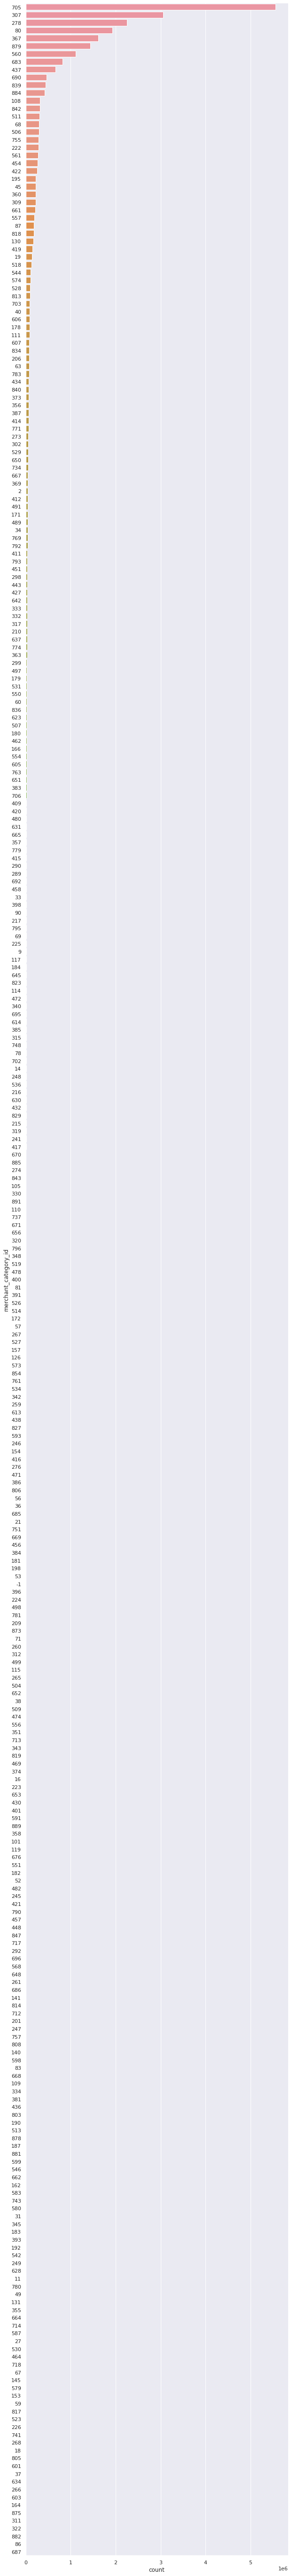

In [263]:
sns.set(rc={'figure.figsize':(10,100)})
sns.set_style(style="darkgrid")
ax=sns.countplot(y="merchant_category_id",data=historical_transactions,order=historical_transactions['merchant_category_id'].value_counts().index)

There is no NaN values for merchant_category_id. And from the counterplot we could see for the specific merchant_category like 278,307,705 are dominating

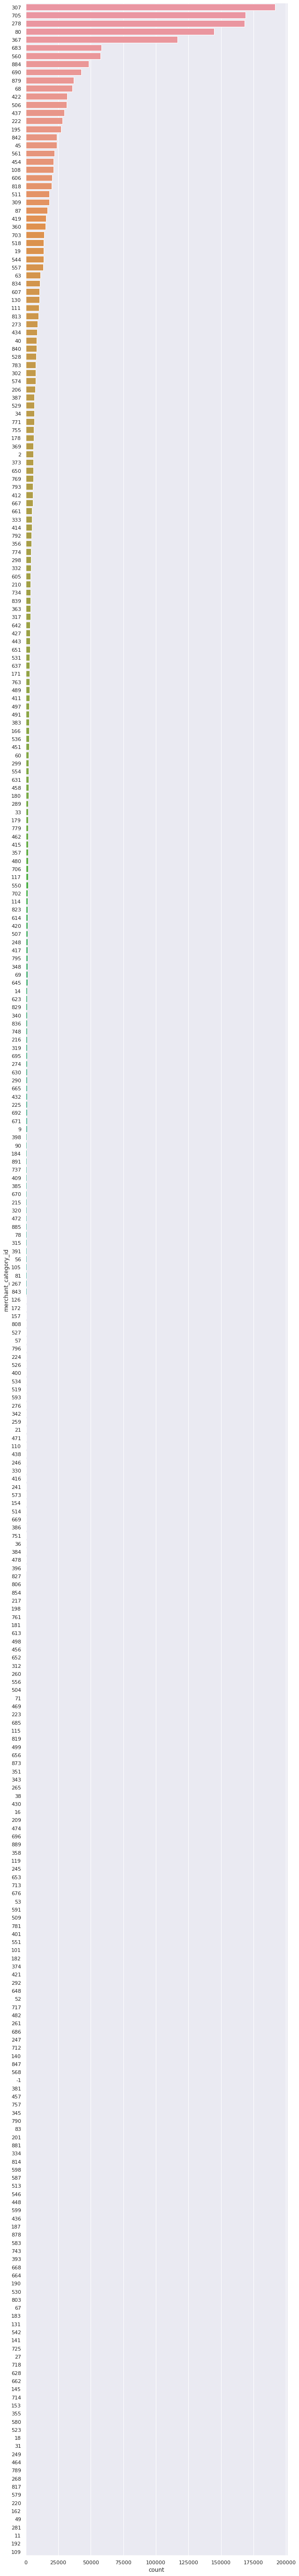

In [264]:
sns.set(rc={'figure.figsize':(10,100)})
sns.set_style(style="darkgrid")
ax=sns.countplot(y="merchant_category_id",data=new_merchant_transactions,order=new_merchant_transactions['merchant_category_id'].value_counts().index)

# Analyze month_lag

> > Ref: https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/77687

"
If this value is negative month_lag indicated that the transaction was realized before reference date and if this value is positive month_lag is indicated that the transaction was realized after reference date. most likely that reference date is the date where ELO started to recommended this merchant.
"

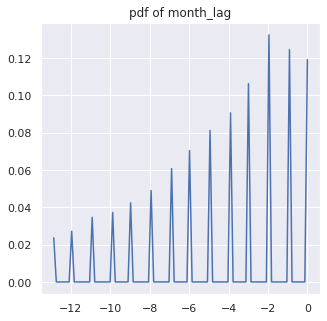

In [169]:
sns.set(rc={'figure.figsize':(5,5)})
counts,bin_edges = np.histogram (historical_transactions['month_lag'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of month_lag")
plt.show()

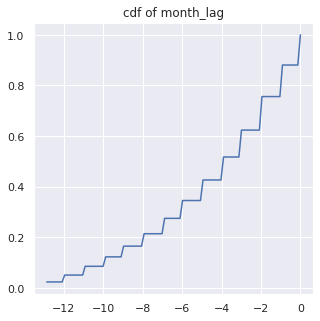

In [170]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of month_lag")
plt.show()

Text(0, 0.5, 'Month_lag')

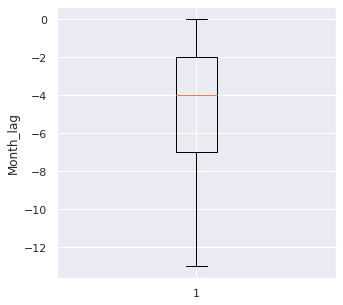

In [171]:
plt.boxplot(historical_transactions['month_lag'])
plt.ylabel("Month_lag")

So in between (-10,-2) , maximum data exist for month_lag. As shown below even percentile data displaying the same.

In [172]:
for i in [1,10,20,30,40,50,60,70,80,90,100]:
    print("The" ,i, "th percentile of  :", np.percentile(historical_transactions['month_lag'],[i]))

The 1 th percentile of  : [-13.]
The 10 th percentile of  : [-10.]
The 20 th percentile of  : [-8.]
The 30 th percentile of  : [-6.]
The 40 th percentile of  : [-5.]
The 50 th percentile of  : [-4.]
The 60 th percentile of  : [-3.]
The 70 th percentile of  : [-2.]
The 80 th percentile of  : [-1.]
The 90 th percentile of  : [0.]
The 100 th percentile of  : [0.]


let's check for new transaction

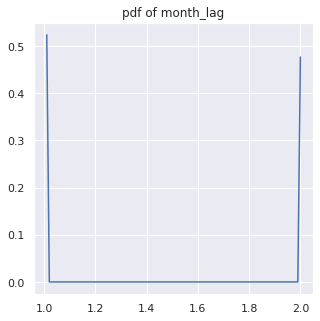

In [173]:
counts,bin_edges = np.histogram (new_merchant_transactions['month_lag'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of month_lag")
plt.show()

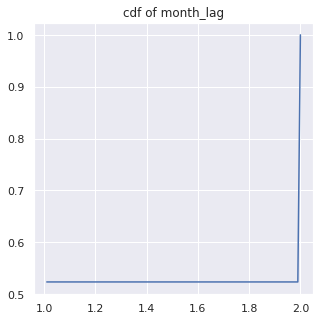

In [174]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of month_lag")
plt.show()

Text(0, 0.5, 'Month_lag')

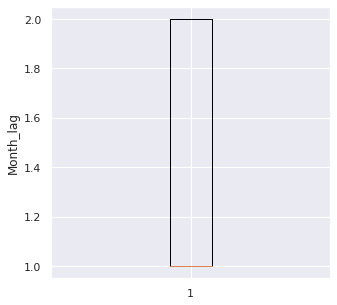

In [175]:
plt.boxplot(new_merchant_transactions['month_lag'])
plt.ylabel("Month_lag")

In [176]:
for i in [1,10,20,30,40,50,60,70,80,90,100]:
    print("The" ,i, "th percentile of  :", np.percentile(historical_transactions['month_lag'],[i]))

The 1 th percentile of  : [-13.]
The 10 th percentile of  : [-10.]
The 20 th percentile of  : [-8.]
The 30 th percentile of  : [-6.]
The 40 th percentile of  : [-5.]
The 50 th percentile of  : [-4.]
The 60 th percentile of  : [-3.]
The 70 th percentile of  : [-2.]
The 80 th percentile of  : [-1.]
The 90 th percentile of  : [0.]
The 100 th percentile of  : [0.]


So distribution for month_lag is almost same in new and historical transactions

# Analyze Purchase Amount

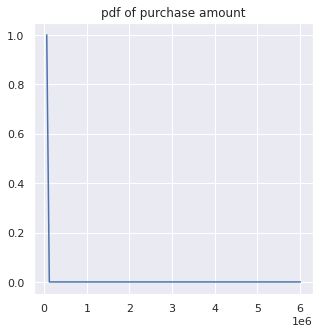

In [177]:
sns.set(rc={'figure.figsize':(5,5)})
counts,bin_edges = np.histogram (historical_transactions['purchase_amount'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
#plt.xscale('log')
#plt.yscale('log')
plt.title("pdf of purchase amount")
plt.show()

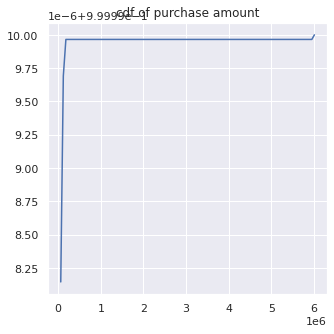

In [178]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of purchase amount")
plt.show()

Text(0, 0.5, 'purchase amount')

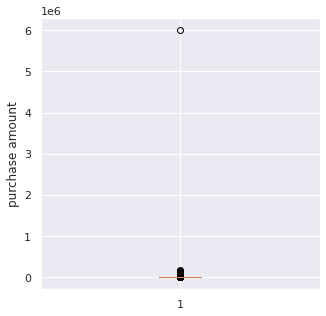

In [179]:
plt.boxplot(historical_transactions['purchase_amount'])
plt.ylabel("purchase amount")

In [180]:
for i in [1,10,20,30,40,50,60,70,80,90,100]:
    print("The" ,i, "th percentile :", np.percentile(historical_transactions['purchase_amount'],[i]))

The 1 th percentile : [-0.74324133]
The 10 th percentile : [-0.73341399]
The 20 th percentile : [-0.72469861]
The 30 th percentile : [-0.71685477]
The 40 th percentile : [-0.70370657]
The 50 th percentile : [-0.68834948]
The 60 th percentile : [-0.67042285]
The 70 th percentile : [-0.6331571]
The 80 th percentile : [-0.57109761]
The 90 th percentile : [-0.42819548]
The 100 th percentile : [6010603.9717525]


In [181]:
for i in range (90,101):
    print("The" ,i, "th percentile :", np.percentile(historical_transactions['purchase_amount'],[i]))

The 90 th percentile : [-0.42819548]
The 91 th percentile : [-0.39627917]
The 92 th percentile : [-0.35892326]
The 93 th percentile : [-0.31053789]
The 94 th percentile : [-0.25196455]
The 95 th percentile : [-0.16861249]
The 96 th percentile : [-0.05286327]
The 97 th percentile : [0.13003943]
The 98 th percentile : [0.45521315]
The 99 th percentile : [1.22084097]
The 100 th percentile : [6010603.9717525]


It is surprising that purchase_amount is negative . However, According to Data_Dictionary.xlsx purchase_amount is normalized purchase amount. so, it can be negative.

Also the 100th percentile value is significantly larger in comparison with others

let's analyze the same for new transactions

In [182]:
for i in [1,10,20,30,40,50,60,70,80,90,100]:
    print("The" ,i, "th percentile :", np.percentile(new_merchant_transactions['purchase_amount'],[i]))

The 1 th percentile : [-0.74239984]
The 10 th percentile : [-0.73188128]
The 20 th percentile : [-0.72035595]
The 30 th percentile : [-0.70934152]
The 40 th percentile : [-0.69581766]
The 50 th percentile : [-0.67484064]
The 60 th percentile : [-0.65227082]
The 70 th percentile : [-0.60762706]
The 80 th percentile : [-0.5366869]
The 90 th percentile : [-0.37139527]
The 100 th percentile : [263.15749789]


In new transaction also the 100th percentile value is larger than others but not as much as historical transaction is

In [ ]:
a=new_merchant_transactions['purchase_amount']
a.to_numpy()

array([-0.55757375, -0.56957993, -0.55103721, ..., -0.62103071,
       -0.65674872, -0.73939454])

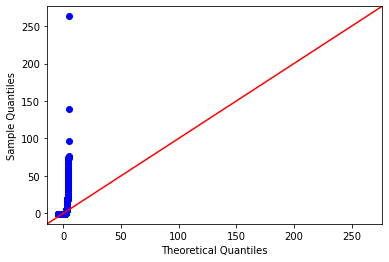

In [ ]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(a, line='45')
py.show()

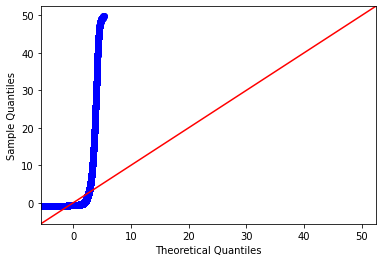

In [ ]:
qqplot(historical_transactions['purchase_amount'], line='45')
pyplot.show()

# Plot purchase_date

In [183]:
# convert the datatype of purchase_date to datetime 
historical_transactions['purchase_date']=pd.to_datetime(historical_transactions['purchase_date'],format='%Y-%m')
new_merchant_transactions['purchase_date']=pd.to_datetime(new_merchant_transactions['purchase_date'],format='%Y-%m')

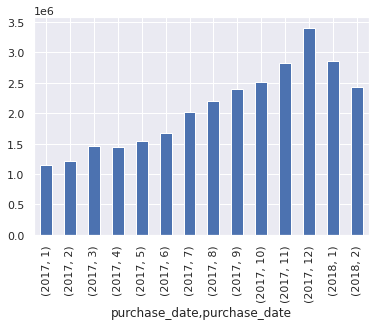

In [184]:
#https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates
sns.set(rc={'figure.figsize':(10,10)})
%matplotlib inline
historical_transactions['purchase_date'].groupby([historical_transactions['purchase_date'].dt.year, historical_transactions['purchase_date'].dt.month]).count().plot(kind="bar")

We have the historical transaction data from Jan'2017 to Feb'2018. Even though the transaction kept incresaing still there is a sudden drop after Dec'2017.

We experienced the same behavior in train/test dataset seems in late 2017 the transaction started decresing 

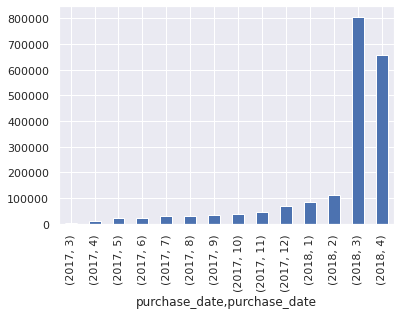

In [185]:
new_merchant_transactions['purchase_date'].groupby([new_merchant_transactions['purchase_date'].dt.year, new_merchant_transactions['purchase_date'].dt.month]).count().plot(kind="bar")

In new transaction details we have vey less amount of transaction till 2017 . As the transaction record are relatively new as per the dataset definition so this behavior is kind of expected

In [186]:
import gc
temp=gc.collect()
del temp

# Plot Category_2

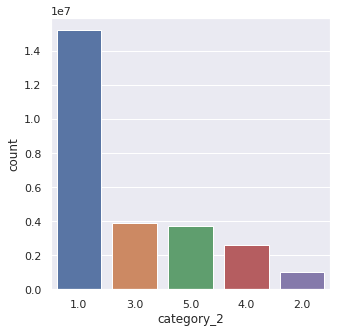

In [266]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style(style="darkgrid")
ax=sns.countplot(x="category_2",data=historical_transactions,order=historical_transactions['category_2'].value_counts().index)

In [188]:
for i in [1.0,2.0,3.0,4.0,5.0]:
    result=historical_transactions[historical_transactions['category_2'] == i]
    percentage_Y=len(result)/len(historical_transactions['category_2'])
    print("Percentage of category_2 with",i,":",percentage_Y*100)

Percentage of category_2 with 1.0 : 52.133178068243936
Percentage of category_2 with 2.0 : 3.526113873072679
Percentage of category_2 with 3.0 : 13.436886826183558
Percentage of category_2 with 4.0 : 8.992925719765568
Percentage of category_2 with 5.0 : 12.798395155927064


under category_2 , the value 1.0 is dominating here

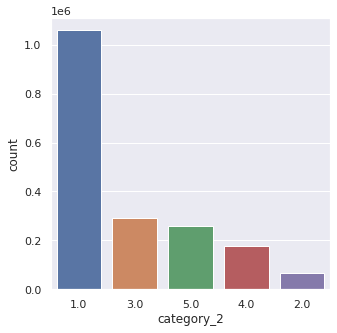

In [267]:
ax=sns.countplot(x="category_2",data=new_merchant_transactions,order=new_merchant_transactions['category_2'].value_counts().index)

In [190]:
for i in [1.0,2.0,3.0,4.0,5.0]:
    result=new_merchant_transactions[new_merchant_transactions['category_2'] == i]
    percentage_Y=len(result)/len(new_merchant_transactions['category_2'])
    print("Percentage of category_2 with",i,":",percentage_Y*100)

Percentage of category_2 with 1.0 : 53.9085730179503
Percentage of category_2 with 2.0 : 3.3449802881360506
Percentage of category_2 with 3.0 : 14.748875590859237
Percentage of category_2 with 4.0 : 9.097665803545638
Percentage of category_2 with 5.0 : 13.207432791433249


The distribution is almost same in historical and new_merchant transactions

# Plot State-ID

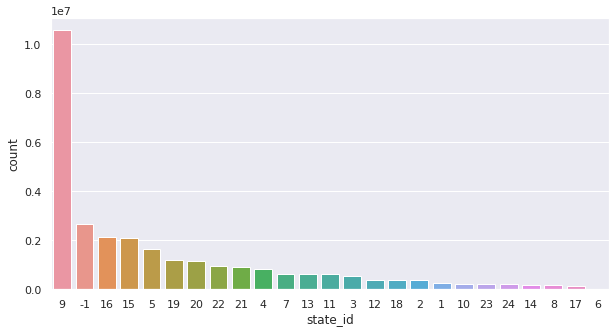

In [268]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style(style="darkgrid")
ax=sns.countplot(x="state_id",data=historical_transactions,order=historical_transactions['state_id'].value_counts().index)

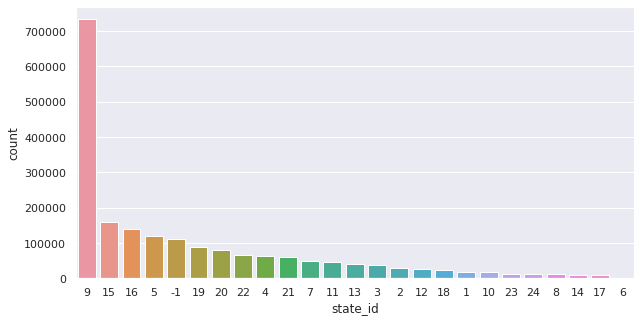

In [269]:
ax=sns.countplot(x="state_id",data=new_merchant_transactions,order=new_merchant_transactions['state_id'].value_counts().index)

In both cases - the state_id with -1,9,15,16,19,20 are clearly dominating

# Plot Subsector_ID

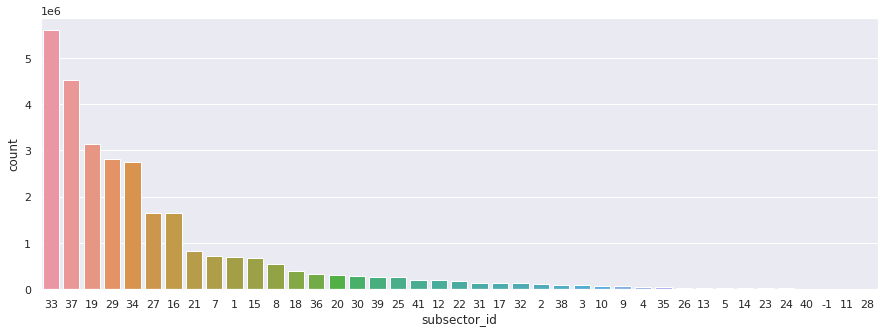

In [270]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style(style="darkgrid")
ax=sns.countplot(x="subsector_id",data=historical_transactions,order=historical_transactions['subsector_id'].value_counts().index)

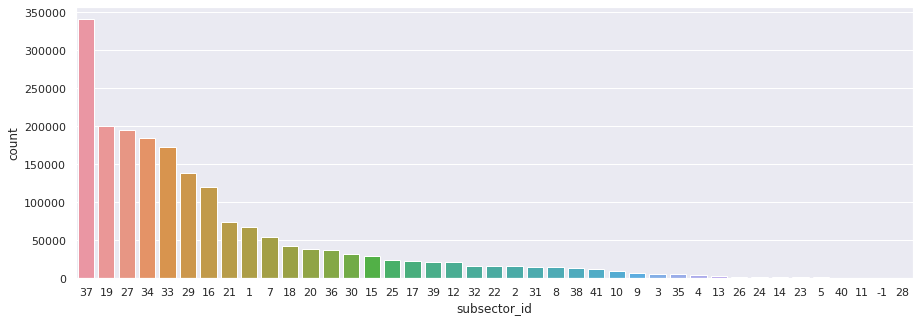

In [272]:
ax=sns.countplot(x="subsector_id",data=new_merchant_transactions,order=new_merchant_transactions['subsector_id'].value_counts().index)

From the plot it is clear the subsector_id with 19,33,34,37 recorded maximum transactions.

In [195]:
merchants=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/merchants.csv')
merchants.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [196]:
print("shape of merchant data:",merchants.shape)

shape of merchant data: (334696, 22)


In [197]:
merchants.head(5)

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range  \
0    -0.057471    -0.057471          N                       E   
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6  \
0                           E           -0.40  ...           -2.25   
1                           E           -0.72  ...           -0.74   
2                           E          -82.13  ...          -82.13   
3                           E             NaN  ...             NaN   
4                           E             NaN  ...             NaN   

   avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
0           18.666667                   6            -2.32   
1            1.291667                   6            -0.57   
2          260.000000                   2           -82.13   
3            4.666667                   6              NaN   
4            0.361111                   6              NaN   

   avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
0            13.916667                   12           N      242        9   
1             1.687500                   12           N       22       16   
2           260.000000                    2           N       -1        5   
3             3.833333                   12           Y       -1       -1   
4             0.347222                   12           Y       -1       -1   

   category_2  
0         1.0  
1         1.0  
2         5.0  
3         NaN  
4         NaN  

[5 rows x 22 columns]

In [198]:
merchants.describe()

merchant_group_id  merchant_category_id   subsector_id    numerical_1  \
count      334696.000000         334696.000000  334696.000000  334696.000000   
mean        31028.736143            423.131663      25.116404       0.011476   
std         31623.043426            252.898046       9.807371       1.098154   
min             1.000000             -1.000000      -1.000000      -0.057471   
25%          3612.000000            222.000000      19.000000      -0.057471   
50%         19900.000000            373.000000      27.000000      -0.057471   
75%         51707.250000            683.000000      33.000000      -0.047556   
max        112586.000000            891.000000      41.000000     183.735111   

         numerical_2  avg_sales_lag3  avg_purchases_lag3  active_months_lag3  \
count  334696.000000   334683.000000        3.346960e+05       334696.000000   
mean        0.008103       13.832993                 inf            2.994108   
std         1.070497     2395.489999                 NaN            0.095247   
min        -0.057471      -82.130000        3.334953e-01            1.000000   
25%        -0.057471        0.880000        9.236499e-01            3.000000   
50%        -0.057471        1.000000        1.016667e+00            3.000000   
75%        -0.047556        1.160000        1.146522e+00            3.000000   
max       182.079322   851844.640000                 inf            3.000000   

       avg_sales_lag6  avg_purchases_lag6  active_months_lag6  \
count    3.346830e+05        3.346960e+05       334696.000000   
mean     2.165079e+01                 inf            5.947397   
std      3.947108e+03                 NaN            0.394936   
min     -8.213000e+01        1.670447e-01            1.000000   
25%      8.500000e-01        9.022475e-01            6.000000   
50%      1.010000e+00        1.026961e+00            6.000000   
75%      1.230000e+00        1.215575e+00            6.000000   
max      1.513959e+06                 inf            6.000000   

       avg_sales_lag12  avg_purchases_lag12  active_months_lag12  \
count     3.346830e+05         3.346960e+05        334696.000000   
mean      2.522771e+01                  inf            11.599335   
std       5.251842e+03                  NaN             1.520138   
min      -8.213000e+01         9.832954e-02             1.000000   
25%       8.500000e-01         8.983333e-01            12.000000   
50%       1.020000e+00         1.043361e+00            12.000000   
75%       1.290000e+00         1.266480e+00            12.000000   
max       2.567408e+06                  inf            12.000000   

             city_id       state_id     category_2  
count  334696.000000  334696.000000  322809.000000  
mean      102.917926      11.860942       2.380002  
std       107.090673       6.176889       1.562661  
min        -1.000000      -1.000000       1.000000  
25%        -1.000000       9.000000       1.000000  
50%        69.000000       9.000000       2.000000  
75%       182.000000      16.000000       4.000000  
max       347.000000      24.000000       5.000000

for the purchase features we have few inf values

In [199]:
duplicate_merchant_id = merchants[merchants.duplicated(['merchant_id'],keep="first")]
print("duplicate merchant_id:")
duplicate_merchant_id['merchant_id']

duplicate merchant_id:


54        M_ID_c0b712e11a
112       M_ID_0039220eb3
3393      M_ID_bd49e37dda
3394      M_ID_bd49e37dda
3395      M_ID_bd49e37dda
               ...       
333905    M_ID_6464db3b45
333906    M_ID_6464db3b45
334071    M_ID_1802942aaf
334072    M_ID_1802942aaf
334073    M_ID_1802942aaf
Name: merchant_id, Length: 63, dtype: object

So we have few duplicate merchant_id, we will remove them and keep only the first record in feature engineering steps to avoid further confusion ie which records to be considered for a merchant_id 

In [200]:
print("duplicate rows in merchants:",merchants[merchants.duplicated(subset=None, keep='first')])

duplicate rows in merchants: Empty DataFrame
Columns: [merchant_id, merchant_group_id, merchant_category_id, subsector_id, numerical_1, numerical_2, category_1, most_recent_sales_range, most_recent_purchases_range, avg_sales_lag3, avg_purchases_lag3, active_months_lag3, avg_sales_lag6, avg_purchases_lag6, active_months_lag6, avg_sales_lag12, avg_purchases_lag12, active_months_lag12, category_4, city_id, state_id, category_2]
Index: []

[0 rows x 22 columns]


Hence, there is no duplicate rows

In [201]:
#check for number of unique values
merchants.nunique(axis=0)

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
numerical_1                       954
numerical_2                       947
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3372
avg_purchases_lag3             100003
active_months_lag3                  3
avg_sales_lag6                   4507
avg_purchases_lag6             135202
active_months_lag6                  6
avg_sales_lag12                  5009
avg_purchases_lag12            172917
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

In [202]:
# check whether NULL value present

print("********************************************************")
print("For merchant data")
print("********************************************************")
for i in merchants.columns:
    if (merchants[i].isnull().sum() > 0):
        print("Total NULL values in ", i ,":",merchants[i].isnull().sum())

********************************************************
For merchant data
********************************************************
Total NULL values in  avg_sales_lag3 : 13
Total NULL values in  avg_sales_lag6 : 13
Total NULL values in  avg_sales_lag12 : 13
Total NULL values in  category_2 : 11887


In the given merchant dataset , we hvae NaN values for the features avg_sales_lag3, avg_sales_lag6, avg_sales_lag12 , category_2. We will need to replace them with proper values.

let's check the common features for transactions and merchant Dataset

In [203]:
common_features=set(new_merchant_transactions.columns).intersection(set(merchants.columns))
common_features

{'category_1',
 'category_2',
 'city_id',
 'merchant_category_id',
 'merchant_id',
 'state_id',
 'subsector_id'}

In [205]:
set(merchants.columns).difference(common_features)

{'active_months_lag12',
 'active_months_lag3',
 'active_months_lag6',
 'avg_purchases_lag12',
 'avg_purchases_lag3',
 'avg_purchases_lag6',
 'avg_sales_lag12',
 'avg_sales_lag3',
 'avg_sales_lag6',
 'category_4',
 'merchant_group_id',
 'most_recent_purchases_range',
 'most_recent_sales_range',
 'numerical_1',
 'numerical_2'}

For the common features we will check more closely if the distribution is same and entries are same or not.

Since we have already observed there are few columns which present both in transactions and merchant dataset so  at first we will check whether they're same or not for the common merchant_id. 

To verify this we will pick few records from the historical_transaction dataset and verify whether same or different.

In [206]:
# we will create one temporary dataset for the historical transaction data  merchant and extract only the common features which 
#are present both in transaction and merchant dataset. 
temp_hist=historical_transactions[['category_1','category_2','city_id','merchant_category_id','merchant_id','state_id','subsector_id']]
temp_merchant=merchants[['category_1','category_2','city_id','merchant_category_id','merchant_id','state_id','subsector_id']]

#consider only top 100000 data
temp_hist=temp_hist.head(100000)

#also extract those rows only from merchant dataset for which the merchant_id also present in temp_hist dataframe,
#and construct the new temp1 dataframe
a=temp_hist['merchant_id']
a=a.tolist()
temp1=temp_merchant.loc[temp_merchant['merchant_id'].isin(a)]

# for verification purpose let's delete the duplicate merchant_id as well
temp_hist.drop_duplicates(subset ="merchant_id", keep = False, inplace = True)
temp1.drop_duplicates(subset ="merchant_id", keep = False, inplace = True)

#sort them based on merchant_id
temp1=temp1.sort_values(by="merchant_id")
temp_hist=temp_hist.sort_values(by="merchant_id")

# for simplicity, resetting the index
temp_hist.reset_index()
temp1.reset_index()

# concat them and as defined if there is the row is same for both dataframes then it will not be stored 
#ref: https://stackoverflow.com/questions/20225110/comparing-two-dataframes-and-getting-the-differences
df_diff = pd.concat([temp_hist,temp1]).drop_duplicates(keep=False)
df_diff

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


category_1  category_2  city_id  merchant_category_id      merchant_id  \
67290           N         3.0      190                   705  M_ID_00087160af   
84951           N         5.0      268                   422  M_ID_00313521c7   
23046           N         1.0      331                   307  M_ID_003271751d   
93155           N         1.0       69                   317  M_ID_007e2cbe55   
25183           N         3.0      286                   454  M_ID_009ae274e9   
...           ...         ...      ...                   ...              ...   
326882          N         1.0      213                   783  M_ID_ffea322b04   
331847          N         3.0       25                   367  M_ID_ffeb1929c8   
129739          N         3.0       -1                    80  M_ID_ffec24cacd   
304969          N         1.0      233                   528  M_ID_ffefc89829   
330285          N         4.0       -1                   783  M_ID_fff6541e56   

        state_id  subsector_id  
67290          7            33  
84951         21            27  
23046         16            19  
93155          9            25  
25183          3            39  
...          ...           ...  
326882         9            19  
331847         7            16  
129739         8            37  
304969         9            25  
330285         4            19  

[17158 rows x 7 columns]

As there are many rows present in dt_diff , so it means many of the values are different in transaction and merchant data for a given merchant_id

We will quickly check once for the merchant_id M_ID_00313521c7 to understand better

In [207]:
temp_hist[temp_hist['merchant_id'] == 'M_ID_00313521c7']

category_1  category_2  city_id  merchant_category_id      merchant_id  \
84951          N         5.0      268                   422  M_ID_00313521c7   

       state_id  subsector_id  
84951        21            27

In [208]:
temp1[temp1['merchant_id'] == 'M_ID_00313521c7']

category_1  category_2  city_id  merchant_category_id      merchant_id  \
220034          N         5.0       -1                   422  M_ID_00313521c7   

        state_id  subsector_id  
220034        21            27

As we could see , the city_id is different in merchant and transaction data. Also , to verify this we have also removed the duplicate merchant_id from the temp_hist dataframe. 

So we can conclude , even though there are few common columns in merchant and transaction dataset , still the value could be different for a same merchant_id . Although this is a problem but we will consider only the value present in transaction dataset for the common feature 

In [209]:
del df_diff,temp1,temp_hist,temp_merchant

In [210]:
merchant_id_transaction=set(historical_transactions['merchant_id']).union(set(new_merchant_transactions['merchant_id']))
merchant_id_merchant=set(merchants['merchant_id'])
merchant_id_difference=merchant_id_transaction.difference(merchant_id_merchant)
merchant_id_difference

{nan}

As the difference returns {NaN} , so we can conclude all the merchant_id which are present in transactions dataset are also present in merchant dataset.

Instead of empty set it returns {NaN} as there are few NULL merchant_id exist in transaction dataset 

# Plot Numerical_1:

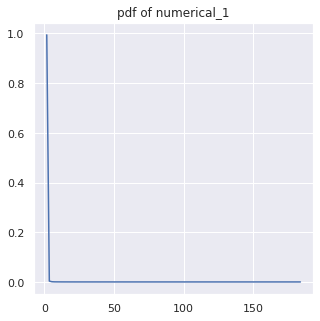

In [211]:
sns.set(rc={'figure.figsize':(5,5)})
counts,bin_edges = np.histogram (merchants['numerical_1'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of numerical_1")
plt.show()

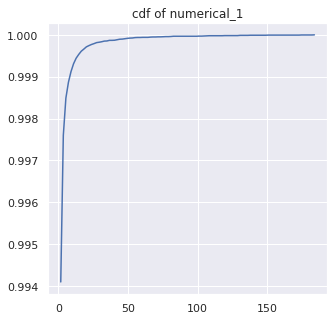

In [212]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of numerical_1")
plt.show()

In [213]:
for i in [10,20,30,40,50,60,70,80,90,100]:
    print("The" ,i, "th percentile :", np.percentile(merchants['numerical_1'],[i]))

The 10 th percentile : [-0.05747065]
The 20 th percentile : [-0.05747065]
The 30 th percentile : [-0.05747065]
The 40 th percentile : [-0.05747065]
The 50 th percentile : [-0.05747065]
The 60 th percentile : [-0.05747065]
The 70 th percentile : [-0.04755575]
The 80 th percentile : [-0.04755575]
The 90 th percentile : [-0.00789613]
The 100 th percentile : [183.73511137]


In [214]:
for i in range(90,101):
    print("The" ,i, "th percentile :", np.percentile(merchants['numerical_1'],[i]))

The 90 th percentile : [-0.00789613]
The 91 th percentile : [0.00201877]
The 92 th percentile : [0.01193368]
The 93 th percentile : [0.03176349]
The 94 th percentile : [0.0615082]
The 95 th percentile : [0.09125291]
The 96 th percentile : [0.15074234]
The 97 th percentile : [0.25980629]
The 98 th percentile : [0.47793418]
The 99 th percentile : [1.06291354]
The 100 th percentile : [183.73511137]


So , around 1% data has higher numerical_1 value

# Plot Numerical_2:

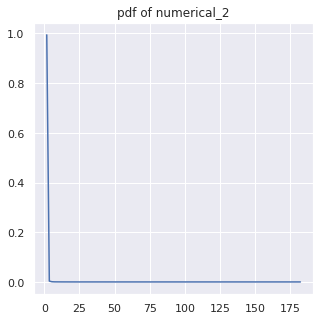

In [216]:
counts,bin_edges = np.histogram (merchants['numerical_2'],bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of numerical_2")
plt.show()

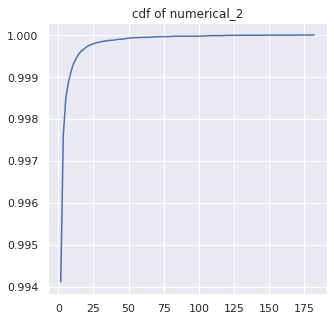

In [217]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of numerical_2")
plt.show()

In [218]:
for i in [10,20,30,40,50,60,70,80,90,100]:
    print("The:", i , "th percentile:" , np.percentile(merchants['numerical_2'],[i]))

The: 10 th percentile: [-0.05747065]
The: 20 th percentile: [-0.05747065]
The: 30 th percentile: [-0.05747065]
The: 40 th percentile: [-0.05747065]
The: 50 th percentile: [-0.05747065]
The: 60 th percentile: [-0.05747065]
The: 70 th percentile: [-0.05747065]
The: 80 th percentile: [-0.04755575]
The: 90 th percentile: [-0.01781104]
The: 100 th percentile: [182.07932234]


In [219]:
for i in range(90,101):
    print("The:", i , "th percentile:" , np.percentile(merchants['numerical_2'],[i]))

The: 90 th percentile: [-0.01781104]
The: 91 th percentile: [-0.00789613]
The: 92 th percentile: [0.00201877]
The: 93 th percentile: [0.02184858]
The: 94 th percentile: [0.04167839]
The: 95 th percentile: [0.08133801]
The: 96 th percentile: [0.14082743]
The: 97 th percentile: [0.23997648]
The: 98 th percentile: [0.45810437]
The: 99 th percentile: [1.04308373]
The: 100 th percentile: [182.07932234]


The distribution is similar in numerical_1 and numerical_2 feature.

let's plot them together

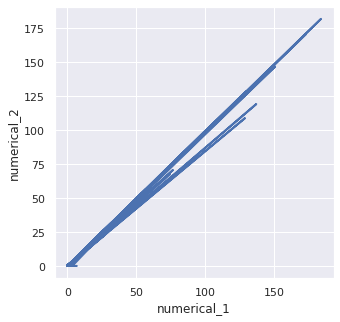

In [220]:
plt.plot(merchants['numerical_1'],merchants['numerical_2'],linewidth=2.0)
plt.xlabel('numerical_1')
plt.ylabel('numerical_2')
plt.show()

So, both the features - numerical_1 and numerical_2 are highly correlated with each other. In feature engineering steps we will check if we need to use both of them

# Plot category_1:

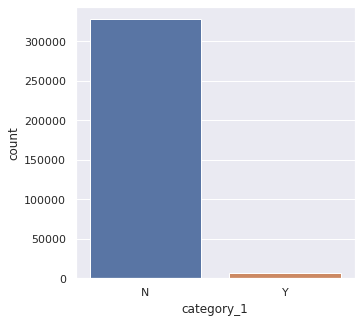

In [221]:
sns.set_style(style="darkgrid")
ax=sns.countplot(x="category_1",data=merchants)

In [222]:
result=merchants[merchants['category_1'] == 'Y']
percentage_Y=len(result)/len(merchants['category_1'])
print("Percentage of category_1 with Y:",percentage_Y*100)

Percentage of category_1 with Y: 2.1031025169108686


So only 2.10% data are with 'Y' for category_1 which we also observed in transaction data as well where also most data come under 'N' category

# Plot category_4:

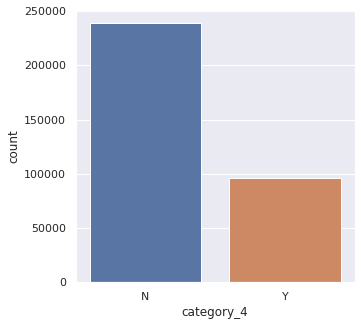

In [223]:
sns.set_style(style="darkgrid")
ax=sns.countplot(x="category_4",data=merchants)

In [224]:
result=merchants[merchants['category_4'] == 'Y']
percentage_Y=len(result)/len(merchants['category_4'])
print("Percentage of category_4 with Y:",percentage_Y*100)

Percentage of category_4 with Y: 28.712622798001767


More than 70% data are from 'N' category in category_4

# Plot Most Recent Sales & Purchase Range

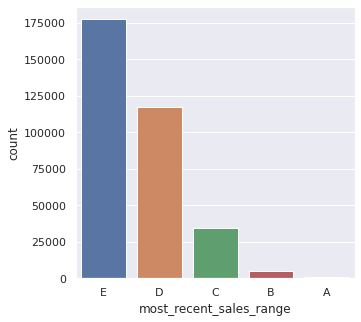

In [274]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style(style="darkgrid")
sns.countplot(x="most_recent_sales_range",data=merchants,order=merchants['most_recent_sales_range'].value_counts().index)

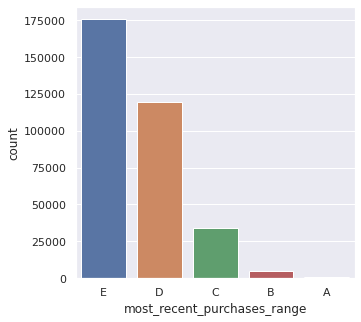

In [275]:
sns.countplot(x="most_recent_purchases_range",data=merchants,order=merchants['most_recent_purchases_range'].value_counts().index)

In [227]:
for i in ['A','B','C','D','E']:
    result=merchants[merchants['most_recent_sales_range'] == i]
    print("Percentage of:",i, "in most_recent_sales_range:",len(result)/len(merchants['most_recent_sales_range'])*100)
    result=merchants[merchants['most_recent_purchases_range'] == i]
    print("Percentage of:",i, "in most_recent_purchases_range:",len(result)/len(merchants['most_recent_purchases_range'])*100)

    #result=merchants[merchants['category_4'] != 'N']

Percentage of: A in most_recent_sales_range: 0.30027248607691753
Percentage of: A in most_recent_purchases_range: 0.3017663790424744
Percentage of: B in most_recent_sales_range: 1.504947773501924
Percentage of: B in most_recent_purchases_range: 1.5076367808399265
Percentage of: C in most_recent_sales_range: 10.180880560269618
Percentage of: C in most_recent_purchases_range: 10.201496283194302
Percentage of: D in most_recent_sales_range: 35.09901522575711
Percentage of: D in most_recent_purchases_range: 35.610524177163754
Percentage of: E in most_recent_sales_range: 52.91488395439443
Percentage of: E in most_recent_purchases_range: 52.378576379759544


So it's clear the distribution is almost same for both the features  most_recent_sales_range & most_recent_purchases_range

# Plot Average Sales

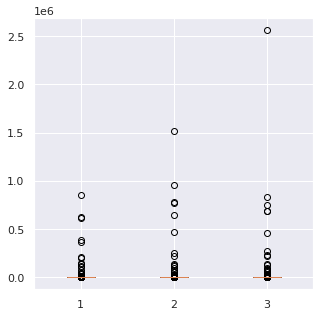

In [228]:
data=[merchants['avg_sales_lag3'].dropna().values,merchants['avg_sales_lag6'].dropna().values,merchants['avg_sales_lag12'].dropna().values]
plt.boxplot(data)
#plt.boxplot(merchants['avg_sales_lag6'].dropna().values)
plt.show()

In [229]:
result=merchants[merchants['avg_purchases_lag3'] == np.inf]
result

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
10  M_ID_492cfa500c              13462                   369            27   
11  M_ID_73487fed26              17123                   427            27   
12  M_ID_7149162139               2118                    63            27   

    numerical_1  numerical_2 category_1 most_recent_sales_range  \
10    -0.057471    -0.057471          N                       E   
11    -0.057471    -0.057471          Y                       E   
12    -0.057471    -0.057471          N                       E   

   most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6  \
10                           E             NaN  ...             NaN   
11                           E             NaN  ...             NaN   
12                           E             NaN  ...             NaN   

    avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
10                 inf                   6              NaN   
11                 inf                   6              NaN   
12                 inf                   6              NaN   

    avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
10                  inf                   12           N       -1        9   
11                  inf                   12           Y       -1       -1   
12                  inf                   12           Y       88       16   

    category_2  
10         1.0  
11         NaN  
12         1.0  

[3 rows x 22 columns]

In [230]:
result=merchants[merchants['avg_purchases_lag6'] == np.inf]
result

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
10  M_ID_492cfa500c              13462                   369            27   
11  M_ID_73487fed26              17123                   427            27   
12  M_ID_7149162139               2118                    63            27   

    numerical_1  numerical_2 category_1 most_recent_sales_range  \
10    -0.057471    -0.057471          N                       E   
11    -0.057471    -0.057471          Y                       E   
12    -0.057471    -0.057471          N                       E   

   most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6  \
10                           E             NaN  ...             NaN   
11                           E             NaN  ...             NaN   
12                           E             NaN  ...             NaN   

    avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
10                 inf                   6              NaN   
11                 inf                   6              NaN   
12                 inf                   6              NaN   

    avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
10                  inf                   12           N       -1        9   
11                  inf                   12           Y       -1       -1   
12                  inf                   12           Y       88       16   

    category_2  
10         1.0  
11         NaN  
12         1.0  

[3 rows x 22 columns]

In [231]:
result=merchants[merchants['avg_purchases_lag12'] == np.inf]
result

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
10  M_ID_492cfa500c              13462                   369            27   
11  M_ID_73487fed26              17123                   427            27   
12  M_ID_7149162139               2118                    63            27   

    numerical_1  numerical_2 category_1 most_recent_sales_range  \
10    -0.057471    -0.057471          N                       E   
11    -0.057471    -0.057471          Y                       E   
12    -0.057471    -0.057471          N                       E   

   most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6  \
10                           E             NaN  ...             NaN   
11                           E             NaN  ...             NaN   
12                           E             NaN  ...             NaN   

    avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
10                 inf                   6              NaN   
11                 inf                   6              NaN   
12                 inf                   6              NaN   

    avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
10                  inf                   12           N       -1        9   
11                  inf                   12           Y       -1       -1   
12                  inf                   12           Y       88       16   

    category_2  
10         1.0  
11         NaN  
12         1.0  

[3 rows x 22 columns]

in the features - avg_purchases_lag3,avg_purchases_lag6,avg_purchases_lag12 there are few inf values exist. For the time being we are going to set them as NaN.

In [232]:
# set the inf value to NaN
merchants.replace([np.inf, -np.inf], np.nan,inplace=True)

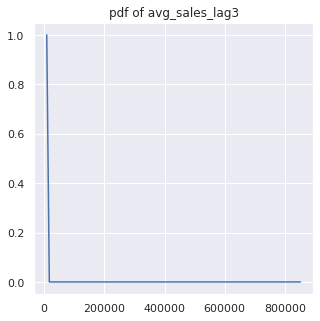

In [233]:
counts,bin_edges = np.histogram (merchants['avg_sales_lag3'].dropna().values,bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of avg_sales_lag3")
plt.show()

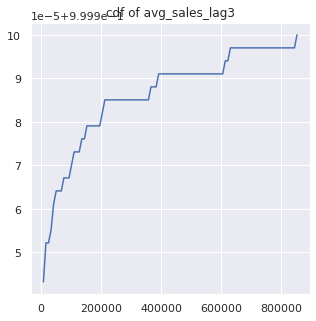

In [234]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of avg_sales_lag3")
plt.show()

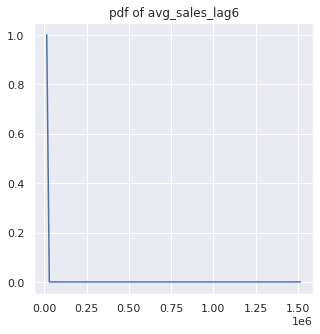

In [235]:
counts,bin_edges = np.histogram (merchants['avg_sales_lag6'].dropna().values,bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of avg_sales_lag6")
plt.show()

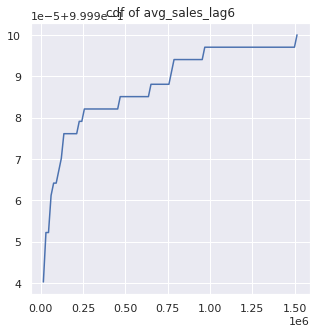

In [236]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of avg_sales_lag6")
plt.show()

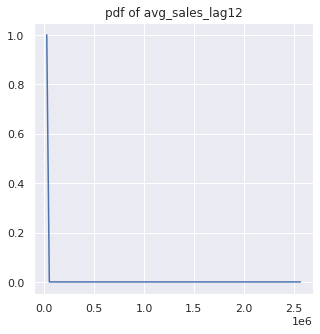

In [237]:
counts,bin_edges = np.histogram (merchants['avg_sales_lag12'].dropna().values,bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of avg_sales_lag12")
plt.show()

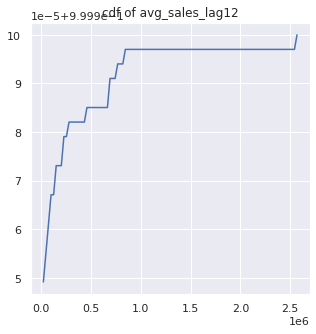

In [238]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of avg_sales_lag12")
plt.show()

The cdfs are not completely identical, let's dive deep into the percentile data

In [239]:
#np.percentile(train_csv['target'],[i]))
print("***********************************************")
for i in [10,20,30,40,50,60,70,80,90,91,92,93,94,95,96,97,98,99,100]:
    print("The:",i,"th percentile of avg_sales_lag3:",np.percentile(merchants['avg_sales_lag3'].dropna().values,[i]))
    print("The:",i,"th percentile of avg_sales_lag6:",np.percentile(merchants['avg_sales_lag6'].dropna().values,[i]))
    print("The:",i,"th percentile of avg_sales_lag12:",np.percentile(merchants['avg_sales_lag12'].dropna().values,[i]))
    print("************************************************")

***********************************************
The: 10 th percentile of avg_sales_lag3: [0.74]
The: 10 th percentile of avg_sales_lag6: [0.69]
The: 10 th percentile of avg_sales_lag12: [0.67]
************************************************
The: 20 th percentile of avg_sales_lag3: [0.85]
The: 20 th percentile of avg_sales_lag6: [0.81]
The: 20 th percentile of avg_sales_lag12: [0.8]
************************************************
The: 30 th percentile of avg_sales_lag3: [0.91]
The: 30 th percentile of avg_sales_lag6: [0.89]
The: 30 th percentile of avg_sales_lag12: [0.89]
************************************************
The: 40 th percentile of avg_sales_lag3: [0.96]
The: 40 th percentile of avg_sales_lag6: [0.95]
The: 40 th percentile of avg_sales_lag12: [0.96]
************************************************
The: 50 th percentile of avg_sales_lag3: [1.]
The: 50 th percentile of avg_sales_lag6: [1.01]
The: 50 th percentile of avg_sales_lag12: [1.02]
**********************************

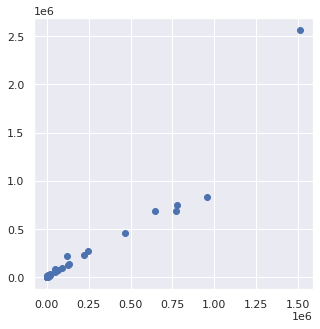

In [240]:
plt.scatter(merchants['avg_sales_lag6'].dropna().values,merchants['avg_sales_lag12'].dropna().values)
plt.show()

The distributions are not completely identical also the 100th percentile value is quiet large

# Plot Average Purchase

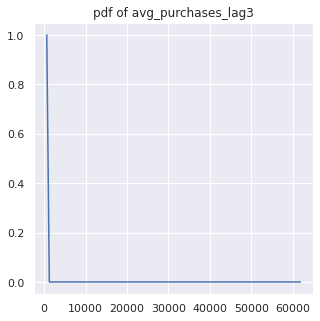

In [241]:
counts,bin_edges = np.histogram (merchants['avg_purchases_lag3'].dropna().values,bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of avg_purchases_lag3")
plt.show()

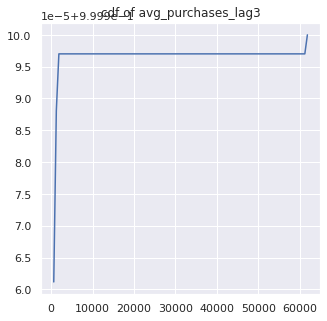

In [242]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of avg_purchases_lag3")
plt.show()

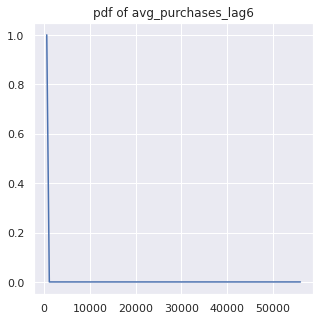

In [243]:
counts,bin_edges = np.histogram (merchants['avg_purchases_lag6'].dropna().values,bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of avg_purchases_lag6")
plt.show()

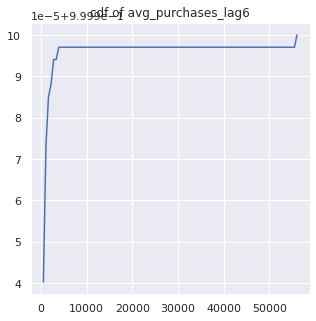

In [244]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of avg_purchases_lag6")
plt.show()

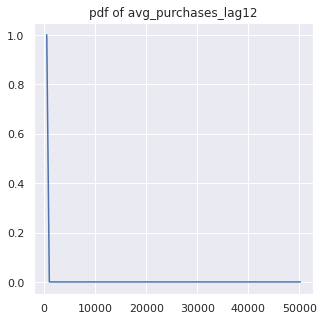

In [245]:
counts,bin_edges = np.histogram (merchants['avg_purchases_lag12'].dropna().values,bins=100, density = True)
pdf=counts/sum(counts)
plt.plot(bin_edges[1:],pdf)
plt.title("pdf of avg_purchases_lag12")
plt.show()

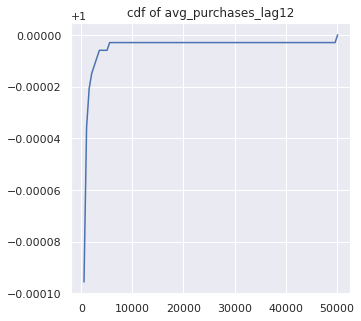

In [246]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("cdf of avg_purchases_lag12")
plt.show()

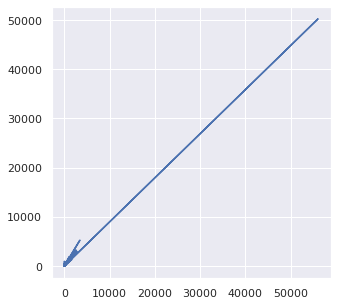

In [247]:
plt.plot(merchants['avg_purchases_lag6'],merchants['avg_purchases_lag12'])
plt.show()

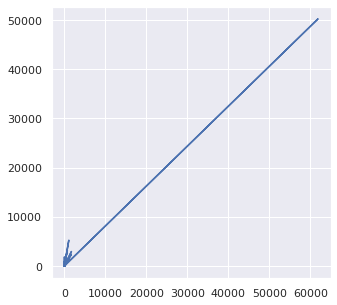

In [248]:
plt.plot(merchants['avg_purchases_lag3'],merchants['avg_purchases_lag12'])
plt.show()

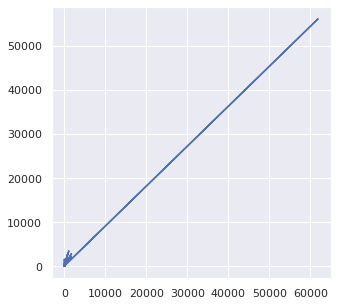

In [249]:
plt.plot(merchants['avg_purchases_lag3'].dropna().values,merchants['avg_purchases_lag6'].dropna().values)
plt.show()

In [250]:
print("***********************************************")
for i in [10,20,30,40,50,60,70,80,90,91,92,93,94,95,96,97,98,99,100]:
    print("The:",i,"th percentile of avg_purchases_lag3:",np.percentile(merchants['avg_purchases_lag3'].dropna().values,[i]))
    print("The:",i,"th percentile of avg_purchases_lag6:",np.percentile(merchants['avg_purchases_lag6'].dropna().values,[i]))
    print("The:",i,"th percentile of avg_purchases_lag12:",np.percentile(merchants['avg_purchases_lag12'].dropna().values,[i]))
    print("************************************************")

***********************************************
The: 10 th percentile of avg_purchases_lag3: [0.81481481]
The: 10 th percentile of avg_purchases_lag6: [0.76666667]
The: 10 th percentile of avg_purchases_lag12: [0.75154513]
************************************************
The: 20 th percentile of avg_purchases_lag3: [0.8962963]
The: 20 th percentile of avg_purchases_lag6: [0.8681592]
The: 20 th percentile of avg_purchases_lag12: [0.86111111]
************************************************
The: 30 th percentile of avg_purchases_lag3: [0.94647002]
The: 30 th percentile of avg_purchases_lag6: [0.93074186]
The: 30 th percentile of avg_purchases_lag12: [0.93055556]
************************************************
The: 40 th percentile of avg_purchases_lag3: [0.98484848]
The: 40 th percentile of avg_purchases_lag6: [0.98044546]
The: 40 th percentile of avg_purchases_lag12: [0.98809386]
************************************************
The: 50 th percentile of avg_purchases_lag3: [1.01666667]


this phenomenon is more or less same as sales . But here the distributions are almost similar

# Plot Active Month Lag

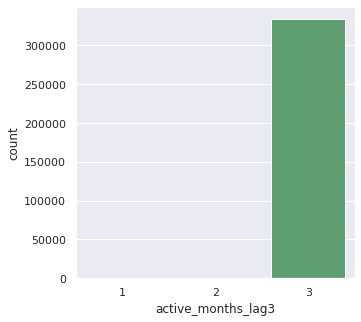

In [251]:
ax=sns.countplot(x="active_months_lag3",data=merchants)

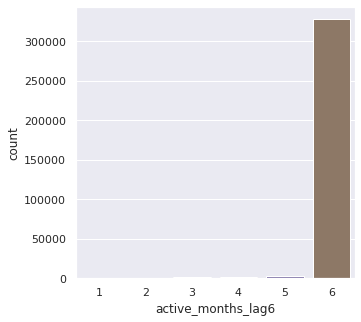

In [252]:
ax=sns.countplot(x="active_months_lag6",data=merchants)

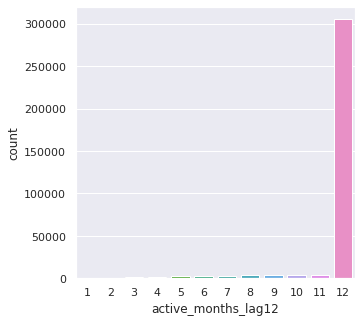

In [253]:
ax=sns.countplot(x="active_months_lag12",data=merchants)

# Plot City ID

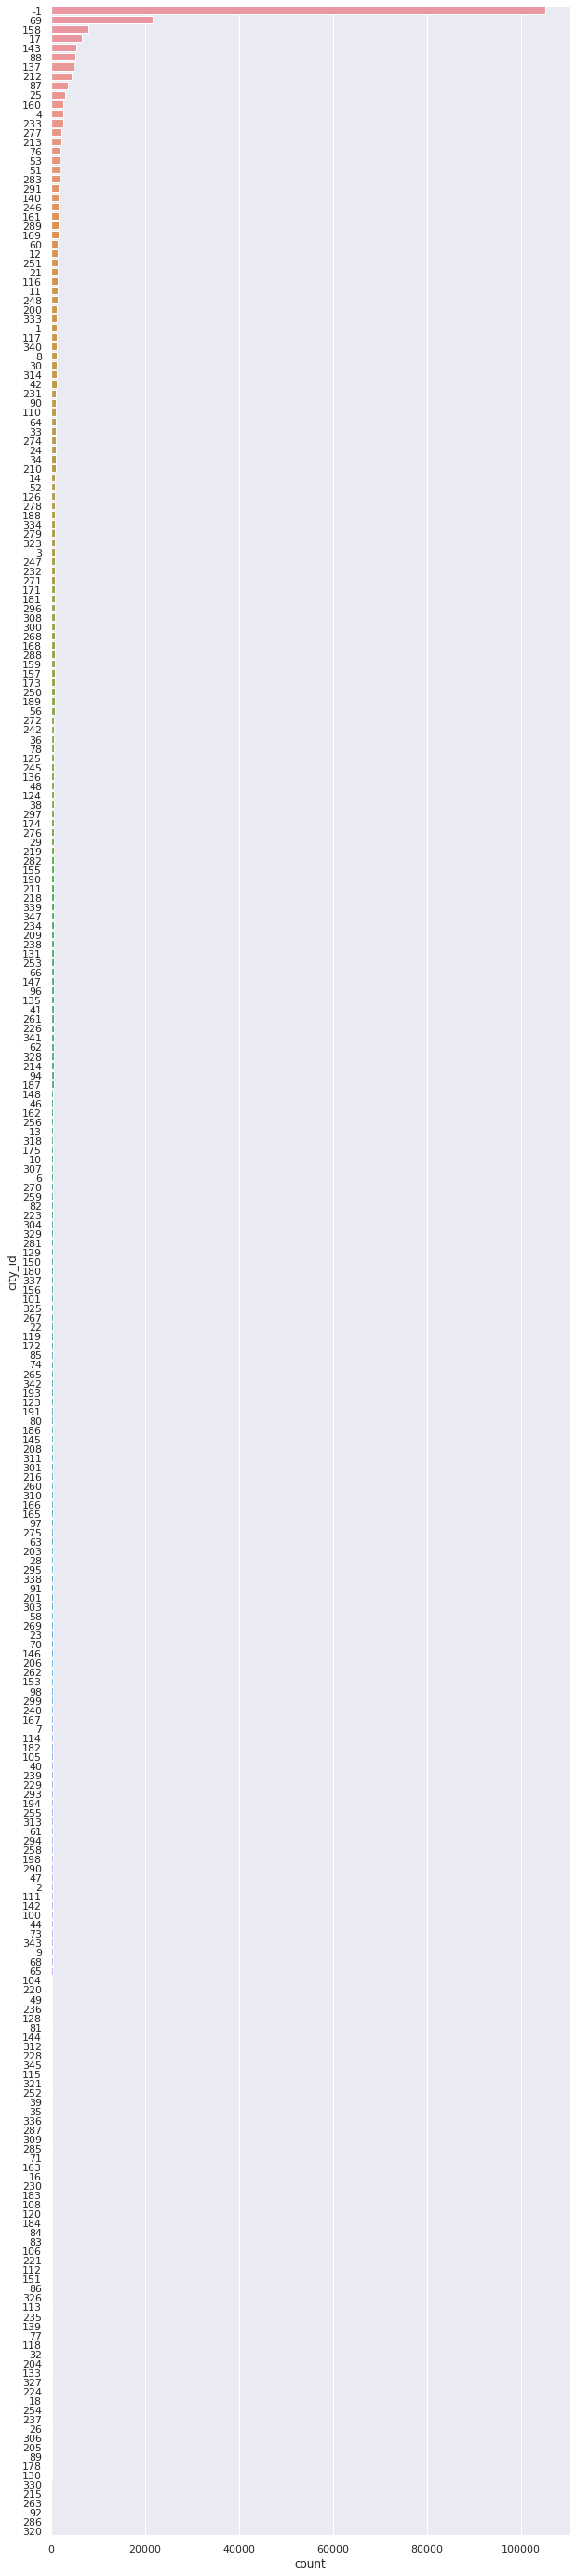

In [276]:
sns.set(rc={'figure.figsize':(10,50)})
ax=sns.countplot(y="city_id",data=merchants,order=merchants['city_id'].value_counts().index)

Here, the city_id with -1 having maximum number of merchants. Although in transaction data the city_id with -1,69,158 hold maximum number of transactions.

# Plot State ID:

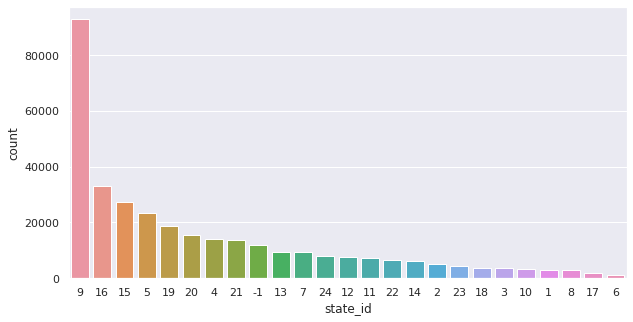

In [277]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x="state_id",data=merchants,order=merchants['state_id'].value_counts().index)

In state_id also id with (-1,5,9,15,16,19) are having maximum record same as transaction data

# Plot Category_2:

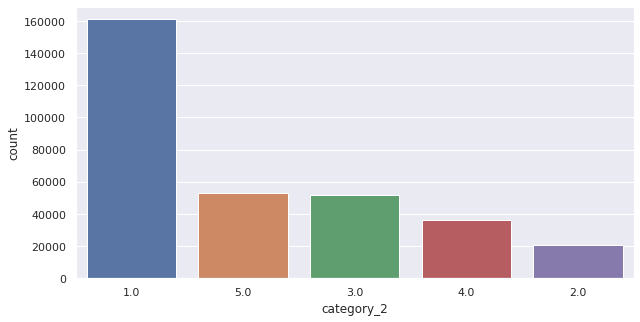

In [278]:
ax=sns.countplot(x="category_2",data=merchants,order=merchants['category_2'].value_counts().index)

In [257]:
for i in [1.0,2.0,3.0,4.0,5.0]:
    result=merchants[merchants['category_2'] == i]
    percentage_Y=len(result)/len(merchants['category_2'])
    print("Percentage of category_2 with",i,":",percentage_Y*100)

Percentage of category_2 with 1.0 : 48.06989028850061
Percentage of category_2 with 2.0 : 6.173064512273824
Percentage of category_2 with 3.0 : 15.502724860769176
Percentage of category_2 with 4.0 : 10.890479718909098
Percentage of category_2 with 5.0 : 15.812259483232546


The percentage of each category_2 is expected as we observed the same in transaction data also.

Now , let's merge the datasets and start bi-variate analysis

In [ ]:
transaction=pd.concat([historical_transactions,new_merchant_transactions])


In [ ]:
common_features=set(new_merchant_transactions.columns).intersection(set(merchants.columns))
common_features

{'category_1',
 'category_2',
 'city_id',
 'merchant_category_id',
 'merchant_id',
 'state_id',
 'subsector_id'}

In [ ]:
#we will oad only those features which are not present in transaction dataset . As we already observed even though 
#there are some mismatches in between transaction data and merchant dataset for the common features, still we will consider
# only the record present in transaction data
set(merchants.columns).difference(common_features)

{'active_months_lag12',
 'active_months_lag3',
 'active_months_lag6',
 'avg_purchases_lag12',
 'avg_purchases_lag3',
 'avg_purchases_lag6',
 'avg_sales_lag12',
 'avg_sales_lag3',
 'avg_sales_lag6',
 'category_4',
 'merchant_group_id',
 'most_recent_purchases_range',
 'most_recent_sales_range',
 'numerical_1',
 'numerical_2'}

In [ ]:
merchants=merchants[['merchant_id','active_months_lag12','active_months_lag3',
 'active_months_lag6',
 'avg_purchases_lag12',
 'avg_purchases_lag3',
 'avg_purchases_lag6',
 'avg_sales_lag12',
 'avg_sales_lag3',
 'avg_sales_lag6',
 'category_4',
 'merchant_group_id',
 'most_recent_purchases_range',
 'most_recent_sales_range',
 'numerical_1',
 'numerical_2']]

In [ ]:
data=transaction.merge(merchants,how='outer',on='merchant_id')

In [ ]:
data.columns

Index(['authorized_flag', 'card_id', 'city_id_x', 'category_1_x',
       'installments', 'category_3', 'merchant_category_id_x', 'merchant_id',
       'month_lag', 'purchase_amount', 'purchase_date', 'category_2_x',
       'state_id_x', 'subsector_id_x', 'merchant_group_id',
       'merchant_category_id_y', 'subsector_id_y', 'numerical_1',
       'numerical_2', 'category_1_y', 'most_recent_sales_range',
       'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_lag12', 'category_4', 'city_id_y', 'state_id_y',
       'category_2_y'],
      dtype='object')

In [ ]:
data.head()

authorized_flag          card_id  ...  numerical_1 numerical_2
0               Y  C_ID_4e6213e9bc  ...    23.470597   23.014512
1               Y  C_ID_4e6213e9bc  ...    23.470597   23.014512
2               Y  C_ID_4e6213e9bc  ...    23.470597   23.014512
3               Y  C_ID_4e6213e9bc  ...    23.470597   23.014512
4               Y  C_ID_4e6213e9bc  ...    23.470597   23.014512

[5 rows x 29 columns]

In [ ]:
#saving the data for future use
data.to_csv('data.csv')

In [ ]:
#Since uni-variate analysis is already completed so for rest of the EDA purpose we will load only 50 lakhs rows
data=pd.read_csv('datas.csv',nrows=5000000)

In [6]:
data.columns

Index(['Unnamed: 0', 'authorized_flag', 'card_id', 'city_id', 'category_1',
       'installments', 'category_3', 'merchant_category_id', 'merchant_id',
       'month_lag', 'purchase_amount', 'purchase_date', 'category_2',
       'state_id', 'subsector_id', 'active_months_lag12', 'active_months_lag3',
       'active_months_lag6', 'avg_purchases_lag12', 'avg_purchases_lag3',
       'avg_purchases_lag6', 'avg_sales_lag12', 'avg_sales_lag3',
       'avg_sales_lag6', 'category_4', 'merchant_group_id',
       'most_recent_purchases_range', 'most_recent_sales_range', 'numerical_1',
       'numerical_2'],
      dtype='object')

In [8]:
#let's drop the Unnamed coulmns and merge it with the train dataset where card features are present
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)
data=data.merge(train_csv,how='outer',on='card_id')
data.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id', 'active_months_lag12', 'active_months_lag3',
       'active_months_lag6', 'avg_purchases_lag12', 'avg_purchases_lag3',
       'avg_purchases_lag6', 'avg_sales_lag12', 'avg_sales_lag3',
       'avg_sales_lag6', 'category_4', 'merchant_group_id',
       'most_recent_purchases_range', 'most_recent_sales_range', 'numerical_1',
       'numerical_2', 'first_active_month', 'feature_1', 'feature_2',
       'feature_3', 'target'],
      dtype='object')

# Plot month_lag with target features

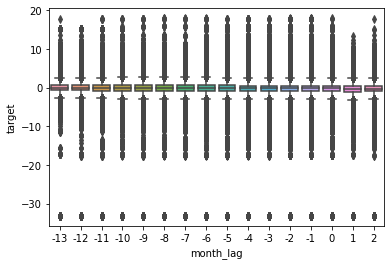

In [ ]:
ax=sns.boxplot(x="month_lag",y="target",data=data)

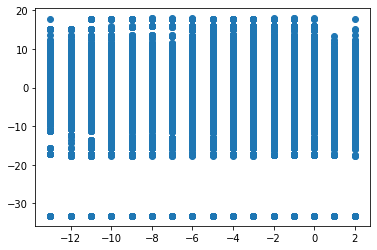

In [ ]:
plt.scatter(data['month_lag'],data['target'])

So , overlapping happens as shown in the above box plot.

# Plot Installments vs target

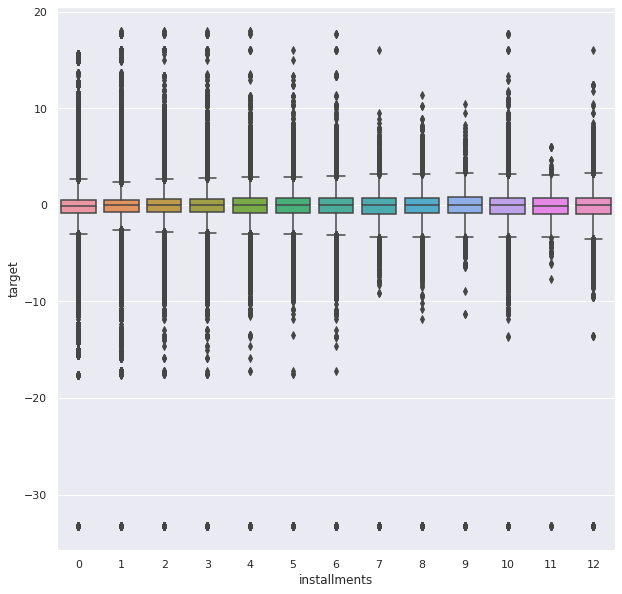

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.boxplot(x="installments",y="target",data=data)

# Plot Purchase_amount vs target

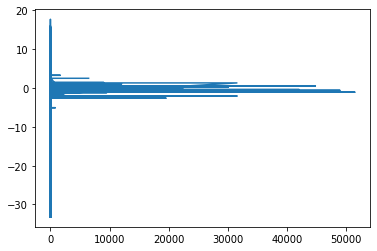

In [ ]:
plt.plot(data['purchase_amount'],data['target'])
plt.show()

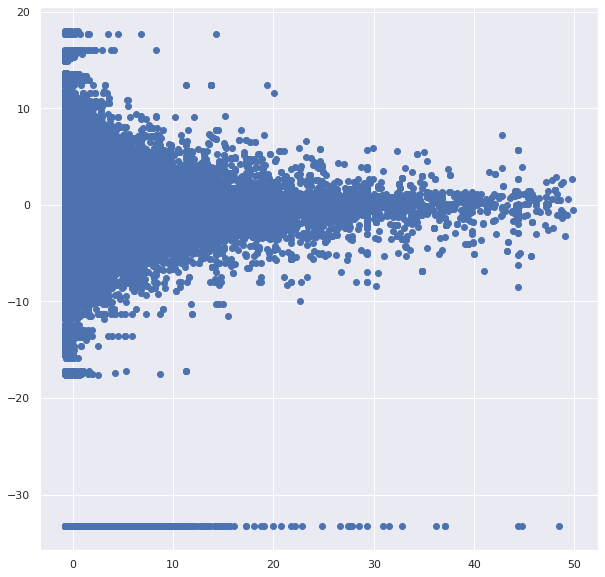

In [ ]:
plt.scatter(data['purchase_amount'],data['target'])

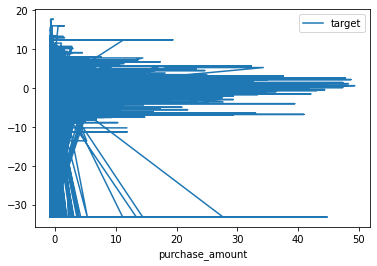

In [ ]:
ax = plt.gca()

data.plot(kind='line',x='purchase_amount',y='target',ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

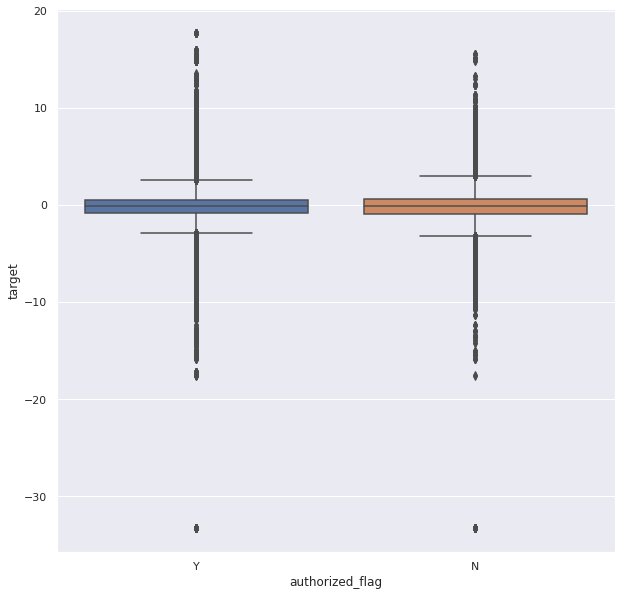

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
ax=sns.boxplot(x="authorized_flag",y="target",data=data)

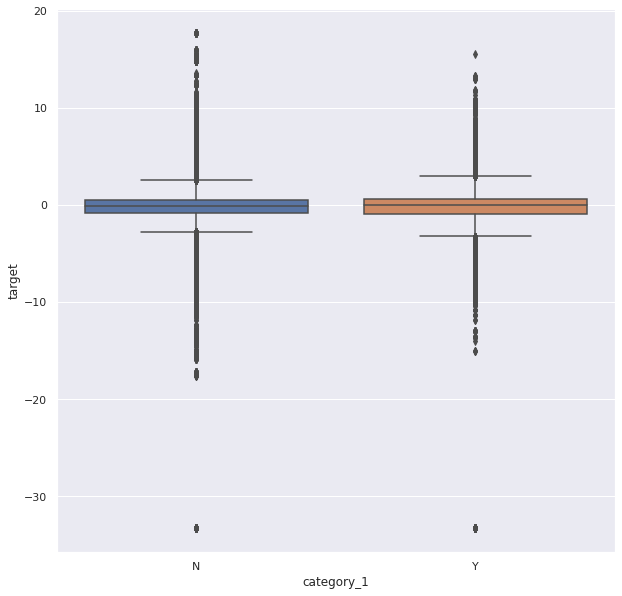

In [ ]:
ax=sns.boxplot(x="category_1",y="target",data=data)

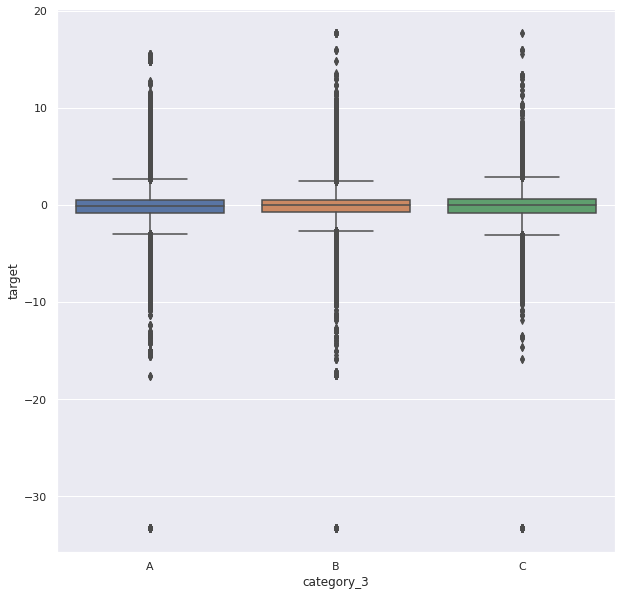

In [ ]:
ax=sns.boxplot(x="category_3",y="target",data=data)

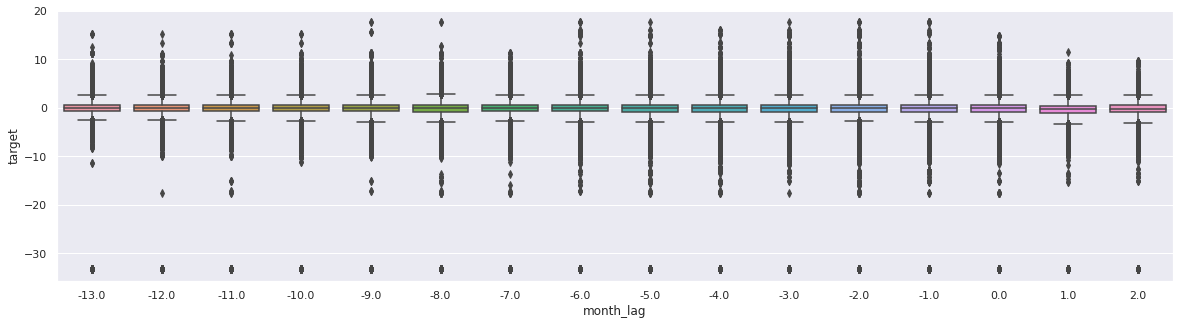

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.boxplot(x="month_lag",y="target",data=data)

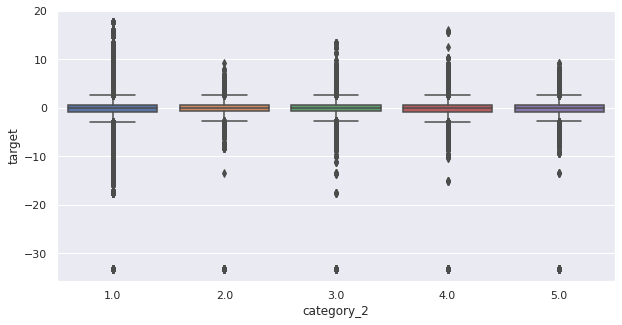

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.boxplot(x="category_2",y="target",data=data)

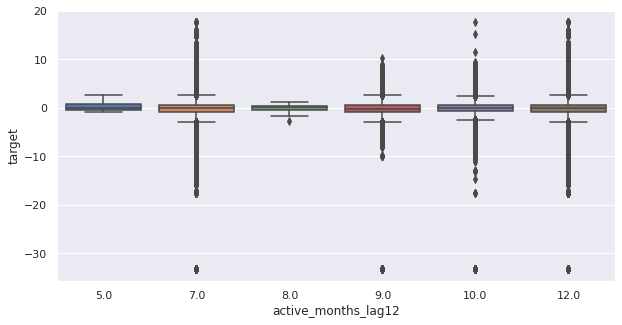

In [ ]:
ax=sns.boxplot(x="active_months_lag12",y="target",data=data)

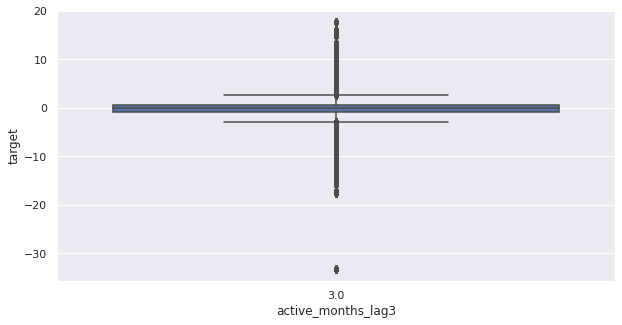

In [ ]:
ax=sns.boxplot(x="active_months_lag3",y="target",data=data)

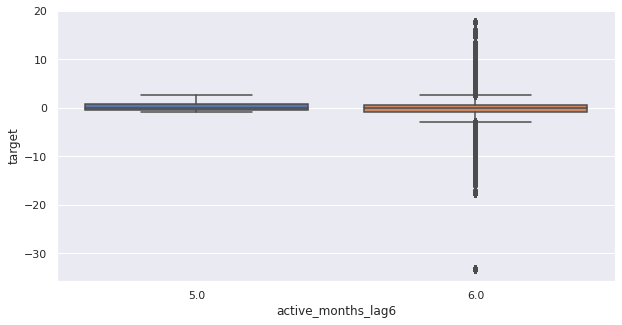

In [ ]:
ax=sns.boxplot(x="active_months_lag6",y="target",data=data)

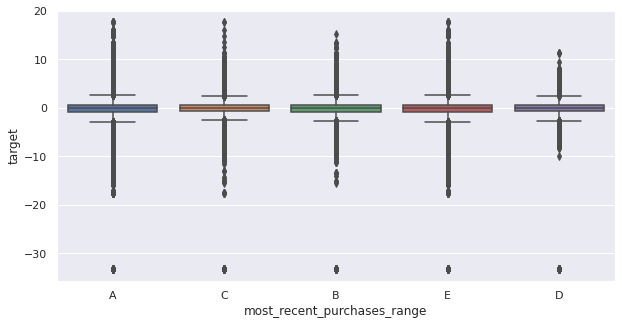

In [ ]:
ax=sns.boxplot(x="most_recent_purchases_range",y="target",data=data)

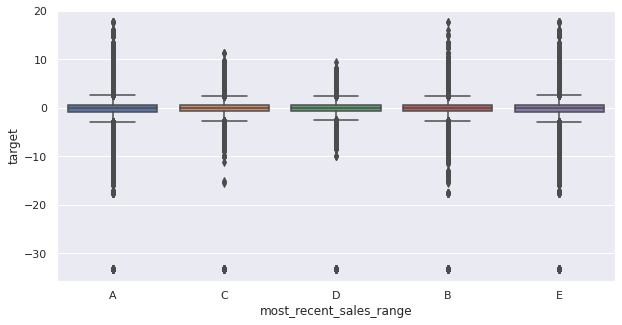

In [ ]:
ax=sns.boxplot(x="most_recent_sales_range",y="target",data=data)

In [10]:
data['purchase_date']=pd.to_datetime(data['purchase_date'],format='%Y-%m')
data['first_active_month']=pd.to_datetime(data['first_active_month'],format='%Y-%m')

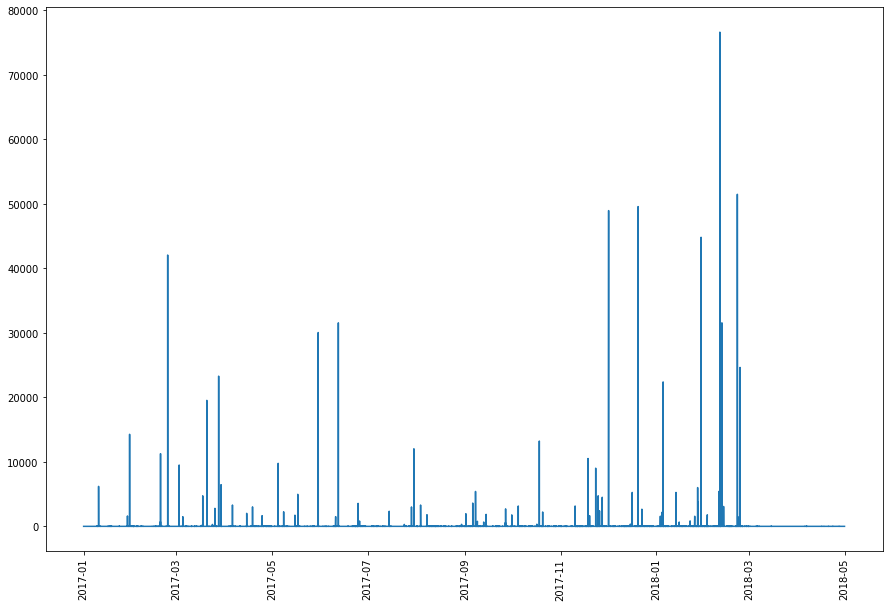

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
data = data.sort_values('purchase_date', ascending=True)
plt.plot(data['purchase_date'], data['purchase_amount'])
plt.xticks(rotation='vertical')
plt.show()

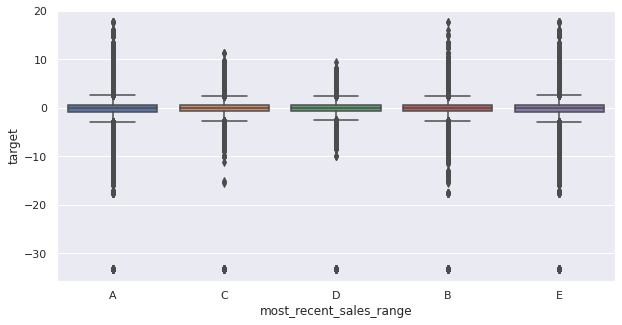

In [ ]:
ax=sns.boxplot(x="most_recent_sales_range",y="target",data=data)

As we have selected only sample of the actual data , so many of the records are not present . However , it is clear even in Bi-variate analysis no single feture is sufficient to predict the target score. hence, based on the EDA result at first we need to clean the data and then go for feature engineering which can be useful for model creation.

# Conclusion:

As the basic EDA is completed and also we get to know about the insight of the data , in the next step we will need to take action based on our observations.

Then we can proceed with the feature engineering steps


In [1]:
#print("end")

# Construct the problem as Classification Problem

As we checked, our primary task is to predict the loyalty score which can be real values. However, instead of thinking the 
problem statement like that, we can also think to predict the customer whether he is loyal or not . If the loyalty score is 0.0 then he/she should be consider as "Not loyal" and if it's 1.0 then can be considered as "Loyal".

Clearly , if the customer can be considered as "Loyal", then he/she would get maximum offers/discount coupons

# Accuracy Metrics

For Binary Classification problems, we can choose roc_auc score. Also True Positive rate is most important 

# Steps to reconstruct the Regression problem to Binary Classification Problem

We will perform StandardScaler() or standardizee the target feauture. after Standardiing if it's <=0 then to be set as 0 else we will set the target feature as 1

In [28]:
target=data['target']
type(target)

pandas.core.series.Series

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#target_std=scaler.fit_transform(target)

data[['target_std']] = scaler.fit_transform(data[['target']])

In [32]:
data.head()

authorized_flag          card_id  city_id  ... feature_3     target target_std
0               Y  C_ID_f43ae18887     69.0  ...       0.0  -0.964822  -0.125492
1               Y  C_ID_f43ae18887     69.0  ...       0.0  -0.964822  -0.125492
2               Y  C_ID_90b85e2e11     -1.0  ...       1.0 -33.219281  -8.628539
3               Y  C_ID_3933ea1cb4    331.0  ...       0.0   0.955069   0.380637
4               N  C_ID_9daf3daa55     -1.0  ...       0.0   0.776284   0.333505

[5 rows x 35 columns]

In [46]:
target_0=data['target_std']<=0
target_1=data['target_std']>0
data.loc[target_0,'target_std']=0
data.loc[target_1,'target_std']=1
data.head()

authorized_flag          card_id  city_id  ... feature_3     target target_std
0               Y  C_ID_f43ae18887     69.0  ...       0.0  -0.964822        0.0
1               Y  C_ID_f43ae18887     69.0  ...       0.0  -0.964822        0.0
2               Y  C_ID_90b85e2e11     -1.0  ...       1.0 -33.219281        0.0
3               Y  C_ID_3933ea1cb4    331.0  ...       0.0   0.955069        1.0
4               N  C_ID_9daf3daa55     -1.0  ...       0.0   0.776284        1.0

[5 rows x 35 columns]

As we could see, the new column target_std has been introduced which can hold [0 or 1]. So we will consider the same problem as Regression as well as Binary Classification problem and simulatneously evaluate the accuracy for both of them. 

## Distribution of Target feature after performing standard scaler

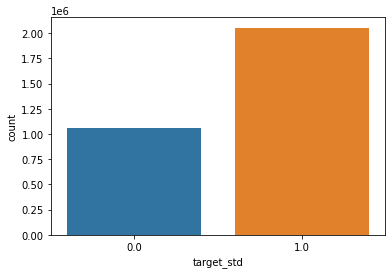

In [17]:
ax=sns.countplot(x='target_std',data=data)

Even though we have loaded only few percentage of the entire data , still we can conclude now in the target feature only two values present either 0 or 1 and this can be considered as a binary classification problem

Now we will plot against the new target feature and check if it gives us any additional informations

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


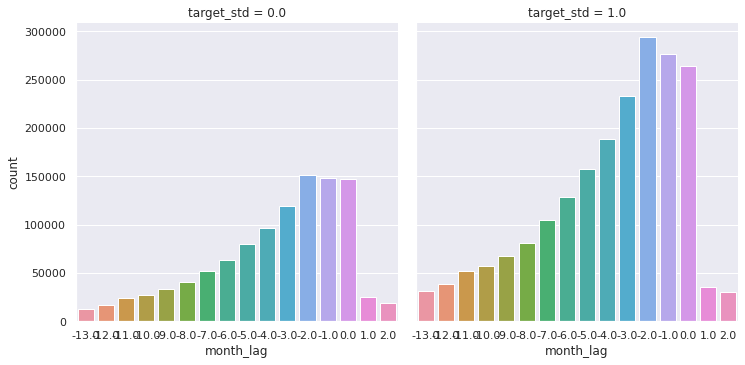

In [36]:
#ref: https://www.tutorialspoint.com/seaborn/seaborn_multi_panel_categorical_plots.htm
sns.set(rc={'figure.figsize':(5,5)})
sns.factorplot("month_lag", col = "target_std", col_wrap = 3,data = data[data.month_lag.notnull()],kind = "count")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


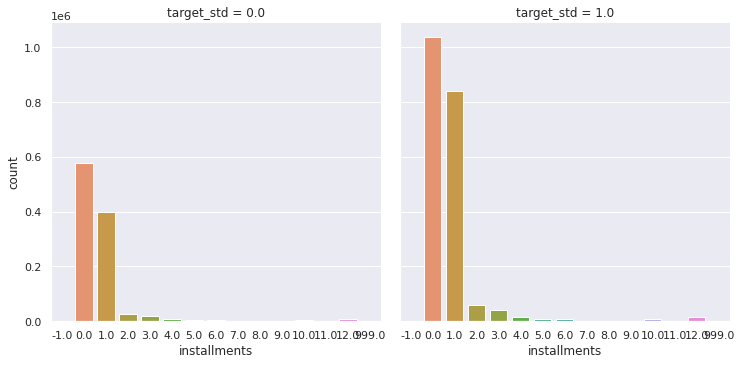

In [41]:
sns.factorplot("installments", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

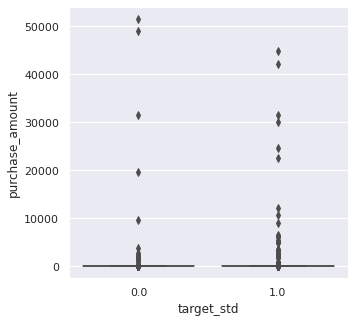

In [39]:
sns.boxplot(x='target_std',y='purchase_amount',data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


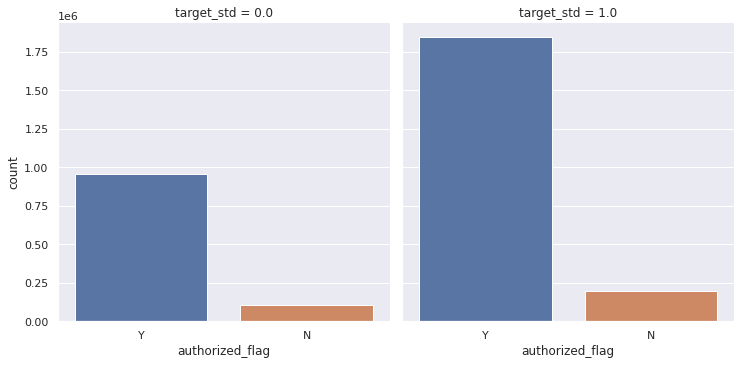

In [40]:
sns.factorplot("authorized_flag", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


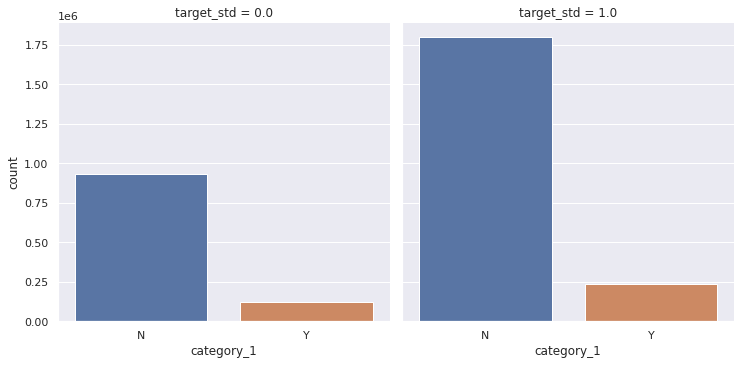

In [42]:
sns.factorplot("category_1", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


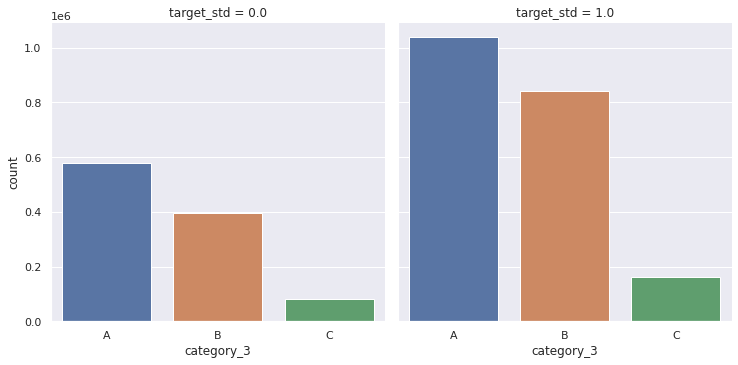

In [43]:
sns.factorplot("category_3", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


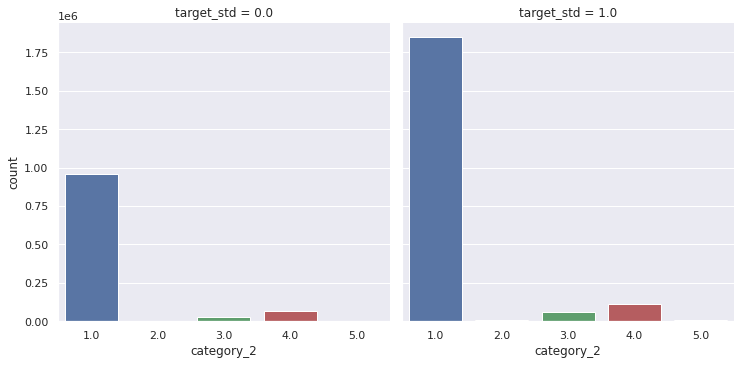

In [44]:
sns.factorplot("category_2", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

In [46]:
data['active_months_lag12'].nunique()

6

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


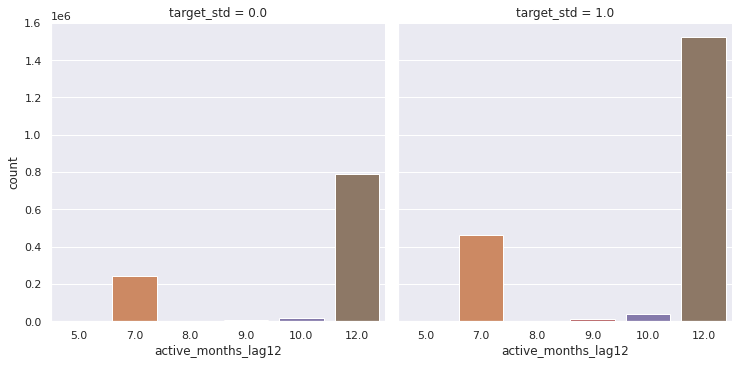

In [47]:
sns.factorplot("active_months_lag12", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


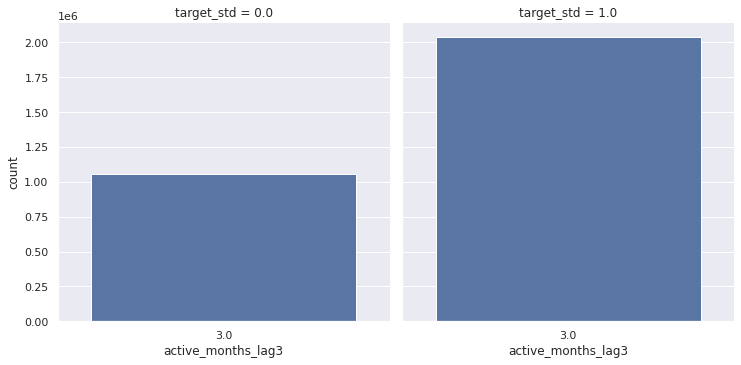

In [48]:
sns.factorplot("active_months_lag3", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


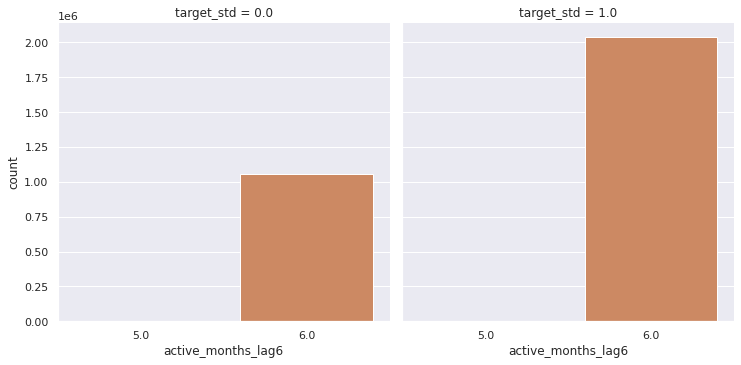

In [49]:
sns.factorplot("active_months_lag6", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


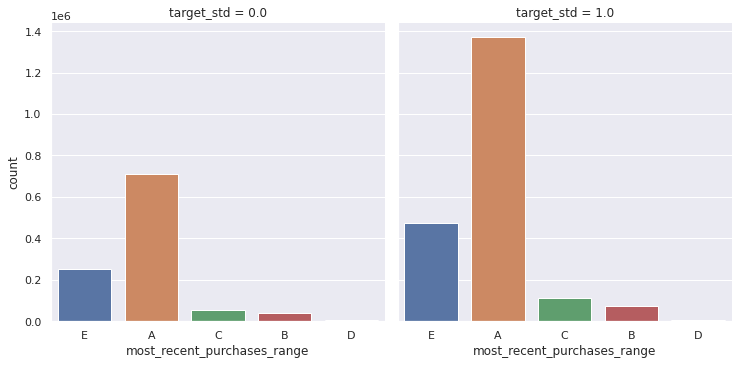

In [50]:
sns.factorplot("most_recent_purchases_range", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


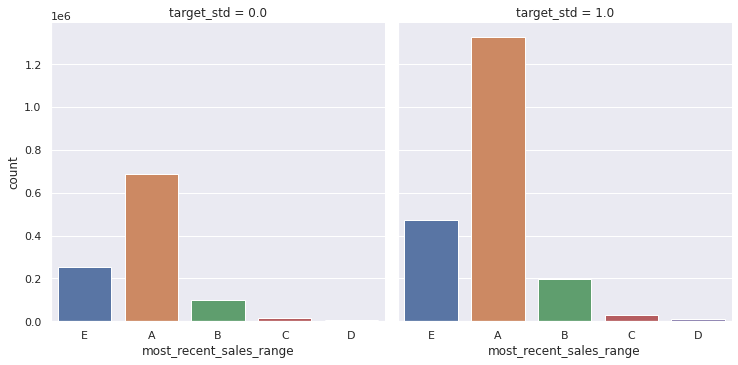

In [51]:
sns.factorplot("most_recent_sales_range", col = "target_std", col_wrap = 3,data = data[data.target_std.notnull()],kind = "count")

The dataset which we have loaded has  5M rows which is 1/4 th of the original given dataset but this is clear , 
there is no direct relationship in between target and remaining features ie no single/bi-features are not sufficient to predict 
the target feature as the dataset is quiet complex. So we have to perform the feature engineering in next step and remove the 
features which are not so useful. 

Then only we can build the model and check for the accuracy.

## Feature Engineering

As the basic EDA is completed, now based on our observation we will perform the feature engineering steps which to be fed to model

In [ ]:
#load the train dataset for card details
train_csv=pd.read_csv('/content/train.csv')

In [ ]:
#load historical transactions
historical_transactions=pd.read_csv('/content/historical_transactions.csv')
historical_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [ ]:
# load the new merchants transactions
new_merchant_transactions=pd.read_csv('/content/new_merchant_transactions.csv')
new_merchant_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [ ]:
#load the merchant dataset
merchants=pd.read_csv('/content/merchants.csv')
merchants.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

As we checked earlier , we will first remove the duplicate records and replace the NaN values

In [ ]:
#remove the duplicate merchant_id
merchants.drop_duplicates(subset ="merchant_id", keep = "first", inplace = True)
merchants.shape

(334633, 22)

In [ ]:
merchants['avg_sales_lag3'].median()

1.0

In [ ]:
merchants['avg_sales_lag6'].median()

1.01

In [ ]:
merchants['avg_sales_lag12'].median()

1.02

In [ ]:
merchants['category_2'].mode() 

0    1.0
dtype: float64

In [ ]:
print("avg_purchases_lag3 median:",merchants['avg_purchases_lag3'].median())
print("avg_purchases_lag6 median:",merchants['avg_purchases_lag6'].median())
print("avg_purchases_lag12 median:",merchants['avg_purchases_lag12'].median())

avg_purchases_lag3 median: 1.01666667
avg_purchases_lag6 median: 1.02693603
avg_purchases_lag12 median: 1.04334433


In [ ]:
# convert the inf & NaN values
merchants.replace([np.inf, -np.inf], np.nan,inplace=True)
merchants['category_2'].fillna(1.0,inplace=True)
merchants['avg_sales_lag3'].fillna(1.0,inplace=True)
merchants['avg_sales_lag6'].fillna(1.01,inplace=True)
merchants['avg_sales_lag12'].fillna(1.02,inplace=True)
merchants['avg_purchases_lag3'].fillna(1.02,inplace=True)
merchants['avg_purchases_lag6'].fillna(1.03,inplace=True)
merchants['avg_purchases_lag12'].fillna(1.04,inplace=True)
merchants.shape

(334633, 22)

Since we have many common features in between transaction and merchant dataset , so we will select only those features which are not present in transaction dataset

In [ ]:
historical_transactions=historical_transactions.merge(merchants,how='outer',on='merchant_id')
historical_transactions.columns

new_merchant_transactions=new_merchant_transactions.merge(merchants,how='outer',on='merchant_id')
new_merchant_transactions.columnsmerchants=merchants[['merchant_id','active_months_lag12','active_months_lag3',
 'active_months_lag6',
 'avg_purchases_lag12',
 'avg_purchases_lag3',
 'avg_purchases_lag6',
 'avg_sales_lag12',
 'avg_sales_lag3',
 'avg_sales_lag6',
 'category_4',
 'merchant_group_id',
 'most_recent_purchases_range',
 'most_recent_sales_range',
 'numerical_1']]

In [ ]:
historical_transactions['category_3'].mode()

0    A
dtype: object

In [ ]:
historical_transactions['category_2'].mode()

0    1.0
dtype: float64

In [ ]:
new_merchant_transactions['category_3'].mode()

0    A
dtype: object

In [ ]:
new_merchant_transactions['category_2'].mode()

0    1.0
dtype: float64

In [ ]:
#drop the rows with NaN merchant_id and replace the other NaN values

historical_transactions=historical_transactions.dropna(subset=['merchant_id'])
historical_transactions['category_3'].fillna('A',inplace=True)
historical_transactions['category_2'].fillna(1.0,inplace=True)
new_merchant_transactions=new_merchant_transactions.dropna(subset=['merchant_id'])
new_merchant_transactions['category_3'].fillna('A',inplace=True)
new_merchant_transactions['category_2'].fillna(1.0,inplace=True)

Remove the installments having less than 0 and with 999

In [ ]:
historical_transactions=historical_transactions[historical_transactions['installments'] >=0]
historical_transactions=historical_transactions[historical_transactions['installments'] !=999]
historical_transactions.shape

(28802740, 14)

In [ ]:
new_merchant_transactions=new_merchant_transactions[new_merchant_transactions['installments'] >=0]
new_merchant_transactions=new_merchant_transactions[new_merchant_transactions['installments'] !=999]
new_merchant_transactions.shape

(1883073, 14)

Since we have few categorical features , let's convert them to numeric form

In [ ]:
#https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
historical_transactions['authorized_flag'] = historical_transactions['authorized_flag'].map({'Y': 1, 'N': 0})
historical_transactions['category_1'] = historical_transactions['category_1'].map({'Y': 1, 'N': 0})
historical_transactions['category_3'] = historical_transactions['category_3'].map({'A': 1, 'B': 2, 'C': 3})

In [ ]:
merchants['category_4'] = merchants['category_4'].map({'Y': 1, 'N': 0})
merchants['most_recent_purchases_range'] = merchants['most_recent_purchases_range'].map({'A': 1, 'B': 2,'C': 3,'D': 4, 'E': 5})
merchants['most_recent_sales_range'] = merchants['most_recent_sales_range'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})

In [ ]:
new_merchant_transactions['authorized_flag'] = new_merchant_transactions['authorized_flag'].map({'Y': 1, 'N': 0})
new_merchant_transactions['category_1'] = new_merchant_transactions['category_1'].map({'Y': 1, 'N': 0})
new_merchant_transactions['category_3'] = new_merchant_transactions['category_3'].map({'A': 1, 'B': 2, 'C': 3})

Convert the multiple categorical values in a single features to multiple features

In [ ]:
#https://datascience.stackexchange.com/questions/14847/multiple-categorical-values-for-a-single-feature-how-to-convert-them-to-binary-u
historical_transactions = pd.get_dummies(historical_transactions, columns=['category_2', 'category_3'])
historical_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount',
       'purchase_date', 'state_id', 'subsector_id', 'category_2_1.0',
       'category_2_2.0', 'category_2_3.0', 'category_2_4.0', 'category_2_5.0',
       'category_3_1', 'category_3_2', 'category_3_3'],
      dtype='object')

In [ ]:
train_csv = pd.get_dummies(train_csv, columns=['feature_1', 'feature_2'])
train_csv.columns

Index(['first_active_month', 'card_id', 'feature_3', 'target', 'feature_1_1',
       'feature_1_2', 'feature_1_3', 'feature_1_4', 'feature_1_5',
       'feature_2_1', 'feature_2_2', 'feature_2_3'],
      dtype='object')

Now merge the transactions and merchant dataset based on merchant_id

In [ ]:
historical_transactions=historical_transactions.merge(merchants,how='outer',on='merchant_id')
historical_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount',
       'purchase_date', 'state_id', 'subsector_id', 'category_2_1.0',
       'category_2_2.0', 'category_2_3.0', 'category_2_4.0', 'category_2_5.0',
       'category_3_1', 'category_3_2', 'category_3_3', 'active_months_lag12',
       'active_months_lag3', 'active_months_lag6', 'avg_purchases_lag12',
       'avg_purchases_lag3', 'avg_purchases_lag6', 'avg_sales_lag12',
       'avg_sales_lag3', 'avg_sales_lag6', 'category_4', 'merchant_group_id',
       'most_recent_purchases_range', 'most_recent_sales_range',
       'numerical_1'],
      dtype='object')

In [ ]:
new_merchant_transactions=new_merchant_transactions.merge(merchants,how='outer',on='merchant_id')
new_merchant_transactions.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id', 'active_months_lag12', 'active_months_lag3',
       'active_months_lag6', 'avg_purchases_lag12', 'avg_purchases_lag3',
       'avg_purchases_lag6', 'avg_sales_lag12', 'avg_sales_lag3',
       'avg_sales_lag6', 'category_4', 'merchant_group_id',
       'most_recent_purchases_range', 'most_recent_sales_range', 'numerical_1',
       'numerical_2'],
      dtype='object')

In [ ]:
new_merchant_transactions = pd.get_dummies(new_merchant_transactions, columns=['category_2', 'category_3'])

Ref: https://www.researchgate.net/publication/335158533_Predicting_Customer_Loyalty_Using_Various_Regression_Models

Now we will perform some aggregate function on our data which are numeric. The features are also mentioned in the above research paper

In [1]:
#ref: https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/
#This function performs the aggregate  operation on the numerical features
def aggregate_func(data,str_data):
    agg_func= {
      'authorized_flag':['mean'],
      'category_1':['mean','sum'],
      'category_2_1.0':['mean'],
      'category_2_2.0':['mean'],
      'category_2_3.0':['mean'],
      'category_2_4.0':['mean'],
      'category_2_5.0':['mean'],
      'category_3_1':['mean'],
      'category_3_2':['mean'],
      'category_3_3':['mean'],
      'city_id':['nunique'],
      'installments':['max','min','mean','std','sum'],
      'merchant_category_id':['nunique'],
      'merchant_id':['nunique'],
      'month_lag':['max','mean','min','std'],
      'purchase_amount':['max','mean','min','std','sum'],
      'state_id':['nunique'],
      'subsector_id':['nunique'],
      'active_months_lag12':['mean'],
      'active_months_lag3':['mean'],
      'active_months_lag6':['mean'],
      'avg_purchases_lag12':['max','mean','min','std','sum'],
      'avg_purchases_lag3':['max','min','mean','std','sum'],
      'avg_purchases_lag6':['max','min','mean','std','sum'],
      'avg_sales_lag12':['max','mean','min','std','sum'],
      'avg_sales_lag3':['max','min','mean','std','sum'],
      'avg_sales_lag6':['max','min','mean','std','sum'],
      'numerical_1':['max','min','mean','std','sum'],
      'category_4':['mean'],
      'merchant_group_id':['nunique'],
      'most_recent_purchases_range':['mean'],
      'most_recent_sales_range':['mean'],


    }
    featured_data=data.groupby(['card_id']).agg(agg_func)
    col_list=[]
    for col in featured_data.columns:
        col_str='_'.join(col)
        col_str=str_data + col_str
        ren_name=col_str.split(",")
        col_list.extend(ren_name)
        
    col_list.insert(0,'card_id')
    featured_data.reset_index(inplace=True)
    return featured_data,col_list


In [ ]:
%%time
X_train_history,col_list_hist=aggregate_func(historical_transactions[historical_transactions['authorized_flag']==1],'auth_history_')


CPU times: user 2min 26s, sys: 5.06 s, total: 2min 31s
Wall time: 2min 31s


In [ ]:
X_train_history.head(5)

card_id  ...  auth_history_most_recent_sales_range_mean
0  C_ID_00007093c1  ...                                   2.728070
1  C_ID_0001238066  ...                                   2.829060
2  C_ID_0001506ef0  ...                                   2.322581
3  C_ID_0001793786  ...                                   3.095238
4  C_ID_000183fdda  ...                                   2.939850

[5 rows x 73 columns]

In [ ]:
X_train_history.columns=col_list_hist


In [ ]:
X_train_new,col_list_new=aggregate_func(new_merchant_transactions,'new_')
X_train_new.columns=col_list_new

In [ ]:
%%time
X_train_unauth,col_list_unauth=aggregate_func(historical_transactions[historical_transactions['authorized_flag']==0],'unauth_hist_')
X_train_unauth.columns=col_list_unauth

CPU times: user 15 s, sys: 197 ms, total: 15.2 s
Wall time: 15.2 s


Since we have covered the numerical features, now let's concentrate on the date features.

In [ ]:
#https://www.kaggle.com/juliaflower/feature-selection-lgbm-with-python
historical_transactions['pur_date'] = pd.DatetimeIndex(historical_transactions['purchase_date']).date
historical_transactions['pur_date'] = pd.DatetimeIndex(historical_transactions['pur_date']).astype(np.int64) * 1e-9

In [ ]:
new_merchant_transactions['pur_date'] = pd.DatetimeIndex(new_merchant_transactions['purchase_date']).date
new_merchant_transactions['pur_date'] = pd.DatetimeIndex(new_merchant_transactions['pur_date']).astype(np.int64) * 1e-9

In [ ]:
historical_transactions['purchase_date']=pd.to_datetime(historical_transactions['purchase_date'],format='%Y-%m')
new_merchant_transactions['purchase_date']=pd.to_datetime(new_merchant_transactions['purchase_date'],format='%Y-%m')

In [ ]:
#ref: https://stackoverflow.com/questions/42822768/pandas-number-of-months-between-two-dates
import datetime 
current_time = datetime.datetime.now()
historical_transactions['months_diff']= (current_time.year - historical_transactions.purchase_date.dt.year) * 12 + (current_time.month - historical_transactions.purchase_date.dt.month)
historical_transactions['purchase_month']=historical_transactions.purchase_date.dt.month
historical_transactions['purchase_year'] = historical_transactions['purchase_date'].dt.year
#data['purchase_month'] = data['purchase_date'].dt.month
historical_transactions['weekofyear'] = historical_transactions['purchase_date'].dt.weekofyear
historical_transactions['dayofweek'] = historical_transactions['purchase_date'].dt.dayofweek
historical_transactions['weekend'] = (historical_transactions.purchase_date.dt.weekday >=5).astype(int)
historical_transactions['hour'] = historical_transactions['purchase_date'].dt.hour

In [ ]:
import datetime
current_time = datetime.datetime.now()
new_merchant_transactions['months_diff']= (current_time.year - new_merchant_transactions.purchase_date.dt.year) * 12 + (current_time.month - new_merchant_transactions.purchase_date.dt.month)
new_merchant_transactions['purchase_month']=new_merchant_transactions.purchase_date.dt.month
new_merchant_transactions['purchase_year'] = new_merchant_transactions['purchase_date'].dt.year
#data['purchase_month'] = data['purchase_date'].dt.month
new_merchant_transactions['weekofyear'] = new_merchant_transactions['purchase_date'].dt.weekofyear
new_merchant_transactions['dayofweek'] = new_merchant_transactions['purchase_date'].dt.dayofweek
new_merchant_transactions['weekend'] = (new_merchant_transactions.purchase_date.dt.weekday >=5).astype(int)
new_merchant_transactions['hour'] = new_merchant_transactions['purchase_date'].dt.hour

Now perform the aggregate operation on the date features

In [ ]:
def aggregate_func_date(data,str_data):
    agg_func= {
      'months_diff':['mean','max','min'],
      'purchase_month':['max','min','mean','std'],
      'purchase_year': ['mean', 'max', 'min', 'std','nunique'],
      'weekofyear': ['mean','max','min','nunique'],
      'dayofweek': ['mean'],
      'weekend': ['sum', 'mean'],
      'hour': ['mean','max','min'], 
      'pur_date':['max','min',np.ptp]
    }
    featured_data=data.groupby(['card_id']).agg(agg_func)
    col_list=[]
    for col in featured_data.columns:
        col_str='_'.join(col)
        col_str=str_data + col_str
        ren_name=col_str.split(",")
        col_list.extend(ren_name)
    col_list.insert(0,'card_id')
    featured_data.reset_index(inplace=True)
    return featured_data,col_list


In [ ]:
%%time
X_train_auth_date,col_list_date=aggregate_func_date(historical_transactions[historical_transactions['authorized_flag']==1],'auth_hist_')
X_train_auth_date.columns=col_list_date

CPU times: user 43.3 s, sys: 8.75 s, total: 52 s
Wall time: 51.8 s


In [ ]:
%%time
X_train_unauth_date,col_list_date=aggregate_func_date(historical_transactions[historical_transactions['authorized_flag']==0],'unauth_hist_')
X_train_unauth_date.columns=col_list_date

CPU times: user 19.3 s, sys: 232 ms, total: 19.6 s
Wall time: 19.3 s


In [ ]:
%%time
X_train_new_date,col_list_date=aggregate_func_date(new_merchant_transactions,'new_')
X_train_new_date.columns=col_list_date

CPU times: user 17.9 s, sys: 104 ms, total: 18 s
Wall time: 17.9 s


## Merging them altogther 

In [ ]:
X_train_unauth_merge=X_train_unauth.merge(X_train_unauth_date,on='card_id',how='left')

In [ ]:
X_train_unauth_merge.head(5)

card_id  ...  unauth_hist_pur_date_ptp
0  C_ID_00007093c1  ...                28857600.0
1  C_ID_0001238066  ...                 3628800.0
2  C_ID_0001506ef0  ...                22118400.0
3  C_ID_0001793786  ...                16761600.0
4  C_ID_000183fdda  ...                 6652800.0

[5 rows x 83 columns]

In [ ]:
X_train_auth_merge=X_train_history.merge(X_train_auth_date,on='card_id',how='left')

In [ ]:
X_train_auth_merge.head(5)

card_id  ...  auth_hist_pur_date_ptp
0  C_ID_00007093c1  ...              32659200.0
1  C_ID_0001238066  ...              13132800.0
2  C_ID_0001506ef0  ...              34473600.0
3  C_ID_0001793786  ...              24451200.0
4  C_ID_000183fdda  ...              15120000.0

[5 rows x 83 columns]

In [ ]:
history=X_train_auth_merge.merge(X_train_unauth_merge,on='card_id',how='left')

In [ ]:
history.shape

(325540, 165)

In [ ]:
new=X_train_new.merge(X_train_new_date,on='card_id',how='left')

In [ ]:
new.head(5)

card_id  ...  new_pur_date_ptp
0  C_ID_00007093c1  ...          518400.0
1  C_ID_0001238066  ...         5184000.0
2  C_ID_0001506ef0  ...               0.0
3  C_ID_0001793786  ...         3974400.0
4  C_ID_000183fdda  ...         4752000.0

[5 rows x 83 columns]

In [ ]:
train=train_csv.merge(history,on='card_id',how='left')

In [ ]:
X_train=train.merge(new,on='card_id',how='left')
X_train.shape

(201917, 258)

In [ ]:
X_train.head(5)

first_active_month          card_id  ...  new_pur_date_min  new_pur_date_ptp
0            2017-06  C_ID_92a2005557  ...      1.520208e+09         4752000.0
1            2017-01  C_ID_3d0044924f  ...      1.517443e+09         4924800.0
2            2016-08  C_ID_d639edf6cd  ...      1.524874e+09               0.0
3            2017-09  C_ID_186d6a6901  ...      1.520381e+09         3628800.0
4            2017-11  C_ID_cdbd2c0db2  ...      1.519949e+09         4924800.0

[5 rows x 258 columns]

In [ ]:
X_train=X_train.sort_values(by=['first_active_month'])

In [ ]:
Y_train=X_train['target']

In [ ]:
X_train=X_train.drop(columns=['first_active_month','card_id','target'])
X_train.shape

(201917, 255)

For binary classification problem , let's convert the target feature 

In [ ]:
Y_train_binary=Y_train
Y=Y_train_binary.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y_train_binary = scaler.fit_transform(Y)

In [ ]:
Y_train_binary=pd.DataFrame(Y_train_binary,columns=['target'])
Y_train_binary['target']=Y_train_binary['target'].map(lambda x: 1 if x > 0 else 0)

To check whether two classes are present or not 

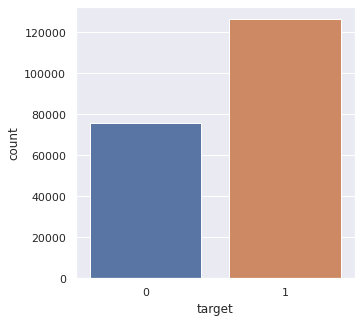

In [102]:
sns.countplot(x='target',data=Y_train_binary)

So we have both classes - 0 & 1

## Save them in a pickle file for future purpose

In [ ]:
X_train_history.to_pickle('/content/X_train_history.pkl')
X_train_new.to_pickle('/content/X_train_new.pkl')
X_train_unauth.to_pickle('/content/X_train_unauth.pkl')
X_train_auth_date.to_pickle('/content/drive/My Drive/kaggle/elo/data/X_train_auth_date_v2.pkl')
X_train_unauth_date.to_pickle('/content/drive/My Drive/kaggle/elo/data/X_train_unauth_date_v2.pkl')
X_train_new_date.to_pickle('/content/drive/My Drive/kaggle/elo/data/X_train_new_date_v2.pkl')
#X_train.to_pickle('/content/drive/My Drive/kaggle/elo/data/X_train.pkl')
#Y_train.to_pickle('/content/drive/My Drive/kaggle/elo/data/Y_train.pkl')
#Y_train_binary.to_pickle('/content/drive/My Drive/kaggle/elo/data/Y_train_binary.pkl')


## Model - Classification Problem

In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pickledata/data/X_train_new.pkl
/kaggle/input/pickledata/data/X_train_history.pkl
/kaggle/input/pickledata/data/X_train.pkl
/kaggle/input/pickledata/data/X_train_auth_date.pkl
/kaggle/input/pickledata/data/X_train_unauth_date.pkl
/kaggle/input/pickledata/data/X_train_unauth.pkl
/kaggle/input/pickledata/data/train_csv_card.pkl
/kaggle/input/pickledata/data/Y_train.pkl
/kaggle/input/pickledata/data/X_train_new_date.pkl
/kaggle/input/elo-merchant-category-recommendation/test.csv
/kaggle/input/elo-merchant-category-recommendation/sample_submission.csv
/kaggle/input/elo-merchant-category-recommendation/train.csv
/kaggle/input/elo-merchant-category-recommendation/new_merchant_transactions.csv
/kaggle/input/elo-merchant-category-recommendation/Data Dictionary.xlsx
/kaggle/input/elo-merchant-category-recommendation/merchants.csv
/kaggle/input/elo-merchant-category-recommendation/historical_transactions.csv
/kaggle/input/elo-merchant-category-recommendation/Data_Dictionary.xlsx
/k

In [100]:
train_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/train.csv')
test_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/test.csv')
test_csv.shape

(123623, 5)

In [101]:
test_csv = pd.get_dummies(test_csv, columns=['feature_1', 'feature_2'])
train_csv=pd.get_dummies(train_csv, columns=['feature_1', 'feature_2'])

In [103]:
import datetime
#train
train_csv['first_active_month'] = pd.to_datetime(train_csv['first_active_month'])
train_csv['year'] = train_csv['first_active_month'].dt.year
train_csv['month'] = train_csv['first_active_month'].dt.month
train_csv['howlong'] = (datetime.date(2018,2,1) - train_csv['first_active_month'].dt.date).dt.days

In [104]:
#test
test_csv['first_active_month'] = pd.to_datetime(test_csv['first_active_month'])
test_csv['year'] = test_csv['first_active_month'].dt.year
test_csv['month'] = test_csv['first_active_month'].dt.month
test_csv['howlong'] = (datetime.date(2018,2,1) - test_csv['first_active_month'].dt.date).dt.days

In [105]:
X_train_unauth=pd.read_pickle('/kaggle/input/pickledata/data/X_train_unauth.pkl')
X_train_unauth_date=pd.read_pickle('/kaggle/input/elomodel/X_train_unauth_date_v2.pkl')
X_train_auth_date=pd.read_pickle('/kaggle/input/elomodel/X_train_auth_date_v2.pkl')
X_train_history=pd.read_pickle('/kaggle/input/pickledata/data/X_train_history.pkl')
X_train_new=pd.read_pickle('/kaggle/input/pickledata/data/X_train_new.pkl')
X_train_new_date=pd.read_pickle('/kaggle/input/elomodel/X_train_new_date_v2.pkl')

In [106]:
X_train_new_date.shape

(286913, 26)

In [107]:
X_train_unauth_date.columns

Index(['card_id', 'unauth_hist_months_diff_mean',
       'unauth_hist_months_diff_max', 'unauth_hist_months_diff_min',
       'unauth_hist_purchase_month_max', 'unauth_hist_purchase_month_min',
       'unauth_hist_purchase_month_mean', 'unauth_hist_purchase_month_std',
       'unauth_hist_purchase_year_mean', 'unauth_hist_purchase_year_max',
       'unauth_hist_purchase_year_min', 'unauth_hist_purchase_year_std',
       'unauth_hist_purchase_year_nunique', 'unauth_hist_weekofyear_mean',
       'unauth_hist_weekofyear_max', 'unauth_hist_weekofyear_min',
       'unauth_hist_weekofyear_nunique', 'unauth_hist_dayofweek_mean',
       'unauth_hist_weekend_sum', 'unauth_hist_weekend_mean',
       'unauth_hist_hour_mean', 'unauth_hist_hour_max', 'unauth_hist_hour_min',
       'unauth_hist_pur_date_max', 'unauth_hist_pur_date_min',
       'unauth_hist_pur_date_ptp'],
      dtype='object')

In [108]:
X_train_auth_date.columns

Index(['card_id', 'auth_hist_months_diff_mean', 'auth_hist_months_diff_max',
       'auth_hist_months_diff_min', 'auth_hist_purchase_month_max',
       'auth_hist_purchase_month_min', 'auth_hist_purchase_month_mean',
       'auth_hist_purchase_month_std', 'auth_hist_purchase_year_mean',
       'auth_hist_purchase_year_max', 'auth_hist_purchase_year_min',
       'auth_hist_purchase_year_std', 'auth_hist_purchase_year_nunique',
       'auth_hist_weekofyear_mean', 'auth_hist_weekofyear_max',
       'auth_hist_weekofyear_min', 'auth_hist_weekofyear_nunique',
       'auth_hist_dayofweek_mean', 'auth_hist_weekend_sum',
       'auth_hist_weekend_mean', 'auth_hist_hour_mean', 'auth_hist_hour_max',
       'auth_hist_hour_min', 'auth_hist_pur_date_max',
       'auth_hist_pur_date_min', 'auth_hist_pur_date_ptp'],
      dtype='object')

In [109]:
X_train_auth_date.shape

(325540, 26)

In [110]:
X_train_unauth_date.shape

(274262, 26)

In [111]:
X_train_unauth_date.head(10)

card_id  unauth_hist_months_diff_mean  unauth_hist_months_diff_max  \
0  C_ID_00007093c1                     38.028571                           43   
1  C_ID_0001238066                     33.333333                           34   
2  C_ID_0001506ef0                     34.500000                           40   
3  C_ID_0001793786                     39.518519                           43   
4  C_ID_000183fdda                     37.714286                           38   
5  C_ID_00024e244b                     36.411765                           42   
6  C_ID_0002709b5a                     37.166667                           45   
7  C_ID_00027503e2                     37.444444                           40   
8  C_ID_000298032a                     39.500000                           42   
9  C_ID_0002ba3c2e                     38.600000                           45   

   unauth_hist_months_diff_min  unauth_hist_purchase_month_max  \
0                           32                              12   
1                           32                              12   
2                           32                              12   
3                           37                               9   
4                           36                              10   
5                           32                              12   
6                           33                               8   
7                           33                              11   
8                           37                               9   
9                           36                              10   

   unauth_hist_purchase_month_min  unauth_hist_purchase_month_mean  \
0                               1                         5.914286   
1                               2                         8.666667   
2                               2                         5.500000   
3                               3                         6.481481   
4                               8                         8.285714   
5                               1                         6.764706   
6                               1                         2.833333   
7                               1                         6.555556   
8                               4                         6.500000   
9                               1                         7.400000   

   unauth_hist_purchase_month_std  unauth_hist_purchase_year_mean  \
0                        3.071419                     2017.171429   
1                        5.773503                     2017.333333   
2                        4.725816                     2017.500000   
3                        2.375684                     2017.000000   
4                        0.755929                     2017.000000   
5                        3.945399                     2017.235294   
6                        2.994439                     2017.500000   
7                        3.052910                     2017.166667   
8                        3.535534                     2017.000000   
9                        2.848559                     2017.000000   

   unauth_hist_purchase_year_max  ...  unauth_hist_weekofyear_nunique  \
0                           2018  ...                              19   
1                           2018  ...                               2   
2                           2018  ...                               4   
3                           2017  ...                              13   
4                           2017  ...                               4   
5                           2018  ...                               7   
6                           2018  ...                               4   
7                           2018  ...                               9   
8                           2017  ...                               2   
9                           2017  ...                               7   

   unauth_hist_dayofweek_mean  unauth_hist_weekend_sum  \

In [112]:
X_train_unauth_merge=X_train_unauth.merge(X_train_unauth_date,on='card_id',how='left')
X_train_auth_merge=X_train_history.merge(X_train_auth_date,on='card_id',how='left')
history=X_train_auth_merge.merge(X_train_unauth_merge,on='card_id',how='left')
new=X_train_new.merge(X_train_new_date,on='card_id',how='left')
test=test_csv.merge(history,on='card_id',how='left')

In [117]:
X_test=test.merge(new,on='card_id',how='left')
X_test.shape

(123623, 305)

In [119]:
train=train_csv.merge(history,on='card_id',how='left')
X_train=train.merge(new,on='card_id',how='left')
X_train.shape

(201917, 306)

In [120]:
X_train=X_train.sort_values(by=['first_active_month'])

In [122]:
X_test=X_test.drop(columns=['first_active_month','card_id'])
X_test.shape

(123623, 303)

In [123]:
Y_train=X_train['target']

In [124]:
X_train=X_train.drop(columns=['first_active_month','card_id','target'])
X_train.shape

(201917, 303)

In [125]:
type(Y_train)

pandas.core.series.Series

In [126]:
Y_train.head(5)

69678     0.645766
145874   -0.069560
9322     -2.544361
33398    -3.573636
152463   -0.693447
Name: target, dtype: float64

In [127]:
#converting the target variable from continuous to 0  1
Y_train_binary=Y_train
Y=Y_train_binary.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y_train_binary = scaler.fit_transform(Y)
Y_train_binary=pd.DataFrame(Y_train_binary,columns=['target'])
Y_train_binary['target']=Y_train_binary['target'].map(lambda x: 1 if x > 0 else 0)
Y_train_binary

target
0            1
1            1
2            0
3            0
4            0
...        ...
201912       1
201913       1
201914       1
201915       1
201916       1

[201917 rows x 1 columns]

# LGBM Classifier

In [129]:
random_grid={'boosting_type':['gbdt'], 
             'objective':['binary'], 
             'num_leaves':[15],
             'learning_rate': [0.01,0.001,0.05,0.02,0.03], 
              'n_estimators':[2011], 
              'max_depth':[3,5,10,15],
              'metric':['none'], 
             'min_child_samples':[84],
             'bagging_freq':[2],
             'bagging_seed':[5,10,12,15],
             'lambda_l1':[2.786857535211943e-08],
             'lambda_l2':[1.283262179401335],
              'bagging_fraction':[0.9959913528376535], 
              'feature_fraction':[0.6110722387385512], 
               'max_bin':[10,30,50,70,80],
             'min_data_in_leaf':[10,20,30,40],
              'reg_lambda':[0.9,1.0,0.5,1.5,0.1]
            }

In [134]:
X_train_init=X_train
Y_train_init=Y_train_binary

In [135]:
X_train=X_train_init[:170000]
Y_train=Y_train_init[:170000]
X_CV=X_train_init[170000:]
Y_CV=Y_train_init[170000:]

In [136]:
X_train.shape

(170000, 303)

In [137]:
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [139]:
model=lgb.LGBMClassifier()
lgb_randoms = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, 
                                 cv = 5, verbose=2, random_state=42,scoring='roc_auc')

lgb_randoms.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=3, max_bin=10, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=10, min_child_samples=84, metric=none, max_depth=15, max_bin=10, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=5, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=5, max_bin=50, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=10, learning_rate=0.02, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=1.0, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=15, max_bin=80, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.0min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.0min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.0min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.0min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=3, max_bin=50, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.0min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.5, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=70, learning_rate=0.05, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=10, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.2min
[CV] reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.1, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=30, min_child_samples=84, metric=none, max_depth=10, max_bin=30, learning_rate=0.03, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=12, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.1min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.3min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.4min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.4min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.4min
[CV] reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  reg_lambda=0.9, objective=binary, num_leaves=15, n_estimators=2011, min_data_in_leaf=20, min_child_samples=84, metric=none, max_depth=5, max_bin=70, learning_rate=0.01, lambda_l2=1.283262179401335, lambda_l1=2.786857535211943e-08, feature_fraction=0.6110722387385512, boosting_type=gbdt, bagging_seed=15, bagging_freq=2, bagging_fraction=0.9959913528376535, total= 2.4min


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 108.5min finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'bagging_fraction': [0.9959913528376535],
                                        'bagging_freq': [2],
                                        'bagging_seed': [5, 10, 12, 15],
                                        'boosting_type': ['gbdt'],
                                        'feature_fraction': [0.6110722387385512],
                                        'lambda_l1': [2.786857535211943e-08],
                                        'lambda_l2': [1.283262179401335],
                                        'learning_rate': [0.01, 0.001, 0.05,
                                                          0.02, 0.03],
                                        'max_bin': [10, 30, 50, 70, 80],
                                        'max_depth': [3, 5, 10, 15],
                                        'metric': ['none'],
                                        'min_child_samples': [84],
             

In [140]:
Y_pred=lgb_randoms.predict(X_CV)
roc_auc_score(Y_pred, Y_CV)

0.648474182589488

In [142]:
Y_pred=lgb_randoms.predict(X_train)
roc_auc_score(Y_pred, Y_train)

0.688158183160029

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_train)

0.6948

In [145]:
Y_pred=lgb_randoms.predict(X_CV)
accuracy_score(Y_pred, Y_CV)

0.6854967572140239

In [147]:
lgb_randoms.best_params_

{'reg_lambda': 0.9,
 'objective': 'binary',
 'num_leaves': 15,
 'n_estimators': 2011,
 'min_data_in_leaf': 30,
 'min_child_samples': 84,
 'metric': 'none',
 'max_depth': 15,
 'max_bin': 10,
 'learning_rate': 0.02,
 'lambda_l2': 1.283262179401335,
 'lambda_l1': 2.786857535211943e-08,
 'feature_fraction': 0.6110722387385512,
 'boosting_type': 'gbdt',
 'bagging_seed': 15,
 'bagging_freq': 2,
 'bagging_fraction': 0.9959913528376535}

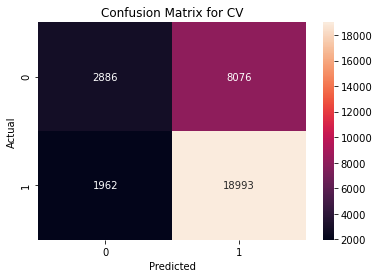

In [132]:
conf_matrix = confusion_matrix(Y_CV, Y_pred, labels)
class_label = [0, 1]
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for CV")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [148]:
import pickle
filename = 'lgbm_classifier_model.sav'
pickle.dump(lgb_randoms, open(filename, 'wb'))

# XGBOOST Classifier

In [116]:
random_grid = {'learning_rate'    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 'max_depth'        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'n_estimators'     : [100,200,300,500],
 'subsample'        : [0.5,0.8,1.0],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'reg_alpha'        : [100,200,300],
 'reg_lambda'       : [100,200,300],
 'gamma'            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ] 
}
print(random_grid)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'n_estimators': [100, 200, 300, 500], 'subsample': [0.5, 0.8, 1.0], 'min_child_weight': [1, 3, 5, 7], 'reg_alpha': [100, 200, 300], 'reg_lambda': [100, 200, 300], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}


In [117]:
# lgb_randoms = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, 
#                                  cv = 5, verbose=2, random_state=42,scoring='roc_auc')

# lgb_randoms.fit(X_train,Y_train)

In [118]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
x_model = xgb. XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = x_model, param_distributions = random_grid, n_iter = 10, 
                                 cv = 5, verbose=2, random_state=42,scoring='roc_auc')
xgb_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, total= 1.6min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, total= 1.6min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, total= 1.5min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, total= 1.6min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, gamma=0.0, colsample_bytree=0.4, total= 1.5min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, total= 9.8min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, total= 9.8min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, total= 9.7min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, total= 9.6min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=200, n_estimators=500, min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.2, colsample_bytree=0.4, total= 8.8min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, total= 5.0min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, total= 4.8min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, total= 5.0min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, total= 5.0min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=200, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, total= 4.8min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, total=11.5min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, total=12.2min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, total=11.8min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, total=11.8min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=200, min_child_weight=7, max_depth=12, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7, total=10.9min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5, total=15.3min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5, total=19.2min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5, total=17.8min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5, total=17.2min
[CV] subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=200, reg_alpha=100, n_estimators=500, min_child_weight=7, max_depth=15, learning_rate=0.15, gamma=0.2, colsample_bytree=0.5, total=17.5min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, total= 4.9min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, total= 4.9min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, total= 4.9min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, total= 4.7min
[CV] subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=1.0, reg_lambda=300, reg_alpha=300, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.25, gamma=0.0, colsample_bytree=0.4, total= 4.5min
[CV] subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, total= 5.3min
[CV] subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, total= 5.3min
[CV] subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, total= 5.3min
[CV] subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, total= 5.3min
[CV] subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=100, reg_alpha=100, n_estimators=100, min_child_weight=3, max_depth=15, learning_rate=0.1, gamma=0.0, colsample_bytree=0.4, total= 5.2min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, total= 9.7min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, total= 9.4min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, total= 9.6min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, total= 9.4min
[CV] subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=100, reg_alpha=300, n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.5, total= 9.1min
[CV] subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3, total= 3.7min
[CV] subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3, total= 3.5min
[CV] subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3, total= 3.6min
[CV] subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3, total= 3.6min
[CV] subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.8, reg_lambda=200, reg_alpha=300, n_estimators=100, min_child_weight=1, max_depth=15, learning_rate=0.2, gamma=0.2, colsample_bytree=0.3, total= 3.6min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4, total= 7.8min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4, total= 7.8min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4, total= 7.9min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4, total= 8.0min
[CV] subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4 


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  subsample=0.5, reg_lambda=300, reg_alpha=200, n_estimators=300, min_child_weight=7, max_depth=10, learning_rate=0.2, gamma=0.1, colsample_bytree=0.4, total= 7.5min


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 379.6min finished
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                      

In [119]:
xgb_random.best_params_

{'subsample': 0.8,
 'reg_lambda': 100,
 'reg_alpha': 300,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [120]:
Y_pred=xgb_random.predict(X_CV)
roc_auc_score(Y_pred, Y_CV)

0.6375713948329914

In [121]:
Y_pred=xgb_random.predict(X_train)
roc_auc_score(Y_pred, Y_train)

0.6531587813076793

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, Y_train)

0.6713117647058824

In [123]:
Y_pred=xgb_random.predict(X_CV)
accuracy_score(Y_pred, Y_CV)

0.6807030735971425

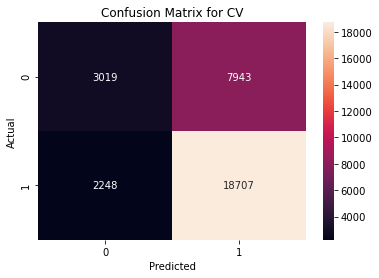

In [128]:
conf_matrix = confusion_matrix(Y_CV, Y_pred, labels)
class_label = [0, 1]
df_conf_matrix = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for CV")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [124]:
import pickle
filename = 'xgb_classifier_model.sav'
pickle.dump(xgb_random, open(filename, 'wb'))

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Validation ROC_AUC Score", "Validation Accuracy"]
x.add_row(["LGBM Classifier", 0.65, 0.69])
x.add_row(["XGBOOST Classifier", 0.64, 0.68])
print(x)

+--------------------+--------------------------+---------------------+
|       Model        | Validation ROC_AUC Score | Validation Accuracy |
+--------------------+--------------------------+---------------------+
|  LGBM Classifier   |           0.65           |         0.69        |
| XGBOOST Classifier |           0.64           |         0.68        |
+--------------------+--------------------------+---------------------+


# Regression with LGBM regressor

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pickledatav2/X_train_new_date_v2.pkl
/kaggle/input/pickledatav2/X_train_unauth_date_v2.pkl
/kaggle/input/pickledatav2/X_train_auth_date_v2.pkl
/kaggle/input/pickledata/data/X_train_new_date.pkl
/kaggle/input/pickledata/data/Y_train.pkl
/kaggle/input/pickledata/data/X_train.pkl
/kaggle/input/pickledata/data/X_train_unauth_date.pkl
/kaggle/input/pickledata/data/train_csv_card.pkl
/kaggle/input/pickledata/data/X_train_auth_date.pkl
/kaggle/input/pickledata/data/X_train_new.pkl
/kaggle/input/pickledata/data/X_train_unauth.pkl
/kaggle/input/pickledata/data/X_train_history.pkl
/kaggle/input/elo-merchant-category-recommendation/new_merchant_transactions.csv
/kaggle/input/elo-merchant-category-recommendation/merchants.csv
/kaggle/input/elo-merchant-category-recommendation/test.csv
/kaggle/input/elo-merchant-category-recommendation/sample_submission.csv
/kaggle/input/elo-merchant-category-recommendation/historical_transactions.csv
/kaggle/input/elo-merchant-category-recommendation

In [2]:
#import the required libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/train.csv')

In [4]:
test_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/test.csv')
test_csv.shape

(123623, 5)

In [5]:
test_csv = pd.get_dummies(test_csv, columns=['feature_1', 'feature_2'])

In [6]:
train_csv=pd.get_dummies(train_csv, columns=['feature_1', 'feature_2'])

In [7]:
import datetime
#train
train_csv['first_active_month'] = pd.to_datetime(train_csv['first_active_month'])
train_csv['year'] = train_csv['first_active_month'].dt.year
train_csv['month'] = train_csv['first_active_month'].dt.month
train_csv['howlong'] = (datetime.date(2018,2,1) - train_csv['first_active_month'].dt.date).dt.days

In [8]:
#test
test_csv['first_active_month'] = pd.to_datetime(test_csv['first_active_month'])
test_csv['year'] = test_csv['first_active_month'].dt.year
test_csv['month'] = test_csv['first_active_month'].dt.month
test_csv['howlong'] = (datetime.date(2018,2,1) - test_csv['first_active_month'].dt.date).dt.days

In [9]:
X_train_unauth=pd.read_pickle('/kaggle/input/pickledata/data/X_train_unauth.pkl')
X_train_unauth_date=pd.read_pickle('/kaggle/input/pickledatav2/X_train_unauth_date_v2.pkl')
X_train_auth_date=pd.read_pickle('/kaggle/input/pickledatav2/X_train_auth_date_v2.pkl')
X_train_history=pd.read_pickle('/kaggle/input/pickledata/data/X_train_history.pkl')
X_train_new=pd.read_pickle('/kaggle/input/pickledata/data/X_train_new.pkl')
X_train_new_date=pd.read_pickle('/kaggle/input/pickledatav2/X_train_new_date_v2.pkl')

In [10]:
X_train_new_date.shape

(286913, 26)

In [11]:
X_train_unauth_date.columns

Index(['card_id', 'unauth_hist_months_diff_mean',
       'unauth_hist_months_diff_max', 'unauth_hist_months_diff_min',
       'unauth_hist_purchase_month_max', 'unauth_hist_purchase_month_min',
       'unauth_hist_purchase_month_mean', 'unauth_hist_purchase_month_std',
       'unauth_hist_purchase_year_mean', 'unauth_hist_purchase_year_max',
       'unauth_hist_purchase_year_min', 'unauth_hist_purchase_year_std',
       'unauth_hist_purchase_year_nunique', 'unauth_hist_weekofyear_mean',
       'unauth_hist_weekofyear_max', 'unauth_hist_weekofyear_min',
       'unauth_hist_weekofyear_nunique', 'unauth_hist_dayofweek_mean',
       'unauth_hist_weekend_sum', 'unauth_hist_weekend_mean',
       'unauth_hist_hour_mean', 'unauth_hist_hour_max', 'unauth_hist_hour_min',
       'unauth_hist_pur_date_max', 'unauth_hist_pur_date_min',
       'unauth_hist_pur_date_ptp'],
      dtype='object')

In [12]:
X_train_auth_date.columns

Index(['card_id', 'auth_hist_months_diff_mean', 'auth_hist_months_diff_max',
       'auth_hist_months_diff_min', 'auth_hist_purchase_month_max',
       'auth_hist_purchase_month_min', 'auth_hist_purchase_month_mean',
       'auth_hist_purchase_month_std', 'auth_hist_purchase_year_mean',
       'auth_hist_purchase_year_max', 'auth_hist_purchase_year_min',
       'auth_hist_purchase_year_std', 'auth_hist_purchase_year_nunique',
       'auth_hist_weekofyear_mean', 'auth_hist_weekofyear_max',
       'auth_hist_weekofyear_min', 'auth_hist_weekofyear_nunique',
       'auth_hist_dayofweek_mean', 'auth_hist_weekend_sum',
       'auth_hist_weekend_mean', 'auth_hist_hour_mean', 'auth_hist_hour_max',
       'auth_hist_hour_min', 'auth_hist_pur_date_max',
       'auth_hist_pur_date_min', 'auth_hist_pur_date_ptp'],
      dtype='object')

In [13]:
X_train_auth_date.shape

(325540, 26)

In [14]:
X_train_unauth_date.shape

(274262, 26)

In [15]:
X_train_unauth_date.head(10)

card_id  unauth_hist_months_diff_mean  unauth_hist_months_diff_max  \
0  C_ID_00007093c1                     38.028571                           43   
1  C_ID_0001238066                     33.333333                           34   
2  C_ID_0001506ef0                     34.500000                           40   
3  C_ID_0001793786                     39.518519                           43   
4  C_ID_000183fdda                     37.714286                           38   
5  C_ID_00024e244b                     36.411765                           42   
6  C_ID_0002709b5a                     37.166667                           45   
7  C_ID_00027503e2                     37.444444                           40   
8  C_ID_000298032a                     39.500000                           42   
9  C_ID_0002ba3c2e                     38.600000                           45   

   unauth_hist_months_diff_min  unauth_hist_purchase_month_max  \
0                           32                              12   
1                           32                              12   
2                           32                              12   
3                           37                               9   
4                           36                              10   
5                           32                              12   
6                           33                               8   
7                           33                              11   
8                           37                               9   
9                           36                              10   

   unauth_hist_purchase_month_min  unauth_hist_purchase_month_mean  \
0                               1                         5.914286   
1                               2                         8.666667   
2                               2                         5.500000   
3                               3                         6.481481   
4                               8                         8.285714   
5                               1                         6.764706   
6                               1                         2.833333   
7                               1                         6.555556   
8                               4                         6.500000   
9                               1                         7.400000   

   unauth_hist_purchase_month_std  unauth_hist_purchase_year_mean  \
0                        3.071419                     2017.171429   
1                        5.773503                     2017.333333   
2                        4.725816                     2017.500000   
3                        2.375684                     2017.000000   
4                        0.755929                     2017.000000   
5                        3.945399                     2017.235294   
6                        2.994439                     2017.500000   
7                        3.052910                     2017.166667   
8                        3.535534                     2017.000000   
9                        2.848559                     2017.000000   

   unauth_hist_purchase_year_max  ...  unauth_hist_weekofyear_nunique  \
0                           2018  ...                              19   
1                           2018  ...                               2   
2                           2018  ...                               4   
3                           2017  ...                              13   
4                           2017  ...                               4   
5                           2018  ...                               7   
6                           2018  ...                               4   
7                           2018  ...                               9   
8                           2017  ...                               2   
9                           2017  ...                               7   

   unauth_hist_dayofweek_mean  unauth_hist_weekend_sum  \

In [16]:
X_train_unauth_merge=X_train_unauth.merge(X_train_unauth_date,on='card_id',how='left')

In [17]:
X_train_auth_merge=X_train_history.merge(X_train_auth_date,on='card_id',how='left')

In [18]:
history=X_train_auth_merge.merge(X_train_unauth_merge,on='card_id',how='left')

In [19]:
new=X_train_new.merge(X_train_new_date,on='card_id',how='left')

In [20]:
test=test_csv.merge(history,on='card_id',how='left')

In [21]:
X_test=test.merge(new,on='card_id',how='left')
X_test.shape

(123623, 305)

In [22]:
train=train_csv.merge(history,on='card_id',how='left')

In [23]:
X_train=train.merge(new,on='card_id',how='left')
X_train.shape

(201917, 306)

In [24]:
X_train=X_train.sort_values(by=['first_active_month'])

In [25]:
# X_test=X_test.sort_values(by=['first_active_month'])
# X_test_card=X_test['card_id']

In [26]:
X_test=X_test.drop(columns=['first_active_month','card_id'])
X_test.shape

(123623, 303)

In [27]:
Y_train=X_train['target']

In [28]:
X_train=X_train.drop(columns=['first_active_month','card_id','target'])
X_train.shape

(201917, 303)

In [34]:
def root_mean_squared_error(y_true, y_pred):
    """Root mean squared error regression loss"""
    return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [35]:
X_train_init=X_train
Y_train_init=Y_train

In [ ]:
#mean model to check the RMSE and cosider it as baseline model
root_mean_squared_error(np.mean(Y_train), Y_train)

3.85049046061597

In [36]:
X_train=X_train_init[:170000]
Y_train=Y_train_init[:170000]
X_CV=X_train_init[170000:]
Y_CV=Y_train_init[170000:]

In [78]:
#https://github.com/optuna/optuna/blob/master/examples/lightgbm_tuner_simple.py

import optuna.integration.lightgbm as lgb


In [79]:
#https://www.kaggle.com/aleksandrovich/smart-hyperparameter-tuning-with-optuna
import lightgbm as lgbm
from optuna.samplers import TPESampler
import optuna

sampler = TPESampler(seed=10) # for reproducibility
def objective(trial):
    
    # dtrain = lgb.Dataset(X_train, label=y_train)
    
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        # 'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 2000),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        # 'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'learning_rate': 0.01,
        'n_estimators': trial.suggest_int('n_estimators', 700, 3000),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    lgbm_regr = lgbm.LGBMRegressor(**param)
    gbm_2 = lgbm_regr.fit(X_train, Y_train, eval_set=[(X_CV, Y_CV)], verbose=False)
    return root_mean_squared_error(Y_CV,gbm_2.predict(X_CV))

study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2020-10-31 20:02:04,907] A new study created in memory with name: no-name-fe0979e4-a86f-4b50-80f8-eb9f05412ce9
[I 2020-10-31 20:12:37,048] Trial 0 finished with value: 1.4609999950803207 and parameters: {'lambda_l1': 0.08747537025773001, 'lambda_l2': 1.537331564587801e-08, 'num_leaves': 322, 'n_estimators': 1880, 'feature_fraction': 0.6991042073815543, 'bagging_fraction': 0.5348779873185086, 'bagging_freq': 2, 'min_child_samples': 13}. Best is trial 0 with value: 1.4609999950803207.
[I 2020-10-31 20:36:25,856] Trial 1 finished with value: 1.4668211769548478 and parameters: {'lambda_l1': 2.4552467279949516e-06, 'lambda_l2': 2.3573583942260753e-06, 'num_leaves': 504, 'n_estimators': 2252, 'feature_fraction': 0.8899611011324, 'bagging_fraction': 0.6016429506787311, 'bagging_freq': 1, 'min_child_samples': 67}. Best is trial 0 with value: 1.4609999950803207.
[I 2020-10-31 20:38:22,543] Trial 2 finished with value: 1.4319445797047732 and parameters: {'lambda_l1': 1.8860355948710983e-08, '

Now Train the model with the parameters   

In [40]:
import lightgbm as lgbm

model = lgbm.LGBMRegressor(objective='regression',metric='rmse',
                           learning_rate=0.01,boosting_type='gbdt',lambda_l1=0.00011695397311687352,
                           lambda_l2=6.215236198348551, num_leaves=114,n_estimators=827,
                           feature_fraction=0.6016720073147184,
                           bagging_fraction=0.984776963426634, bagging_freq=3, min_child_samples=10
                           
                          )
model.fit(X_train,Y_train)

LGBMRegressor(bagging_fraction=0.984776963426634, bagging_freq=3,
              feature_fraction=0.6016720073147184,
              lambda_l1=0.00011695397311687352, lambda_l2=6.215236198348551,
              learning_rate=0.01, metric='rmse', min_child_samples=10,
              n_estimators=827, num_leaves=114, objective='regression')

# Feature Importance

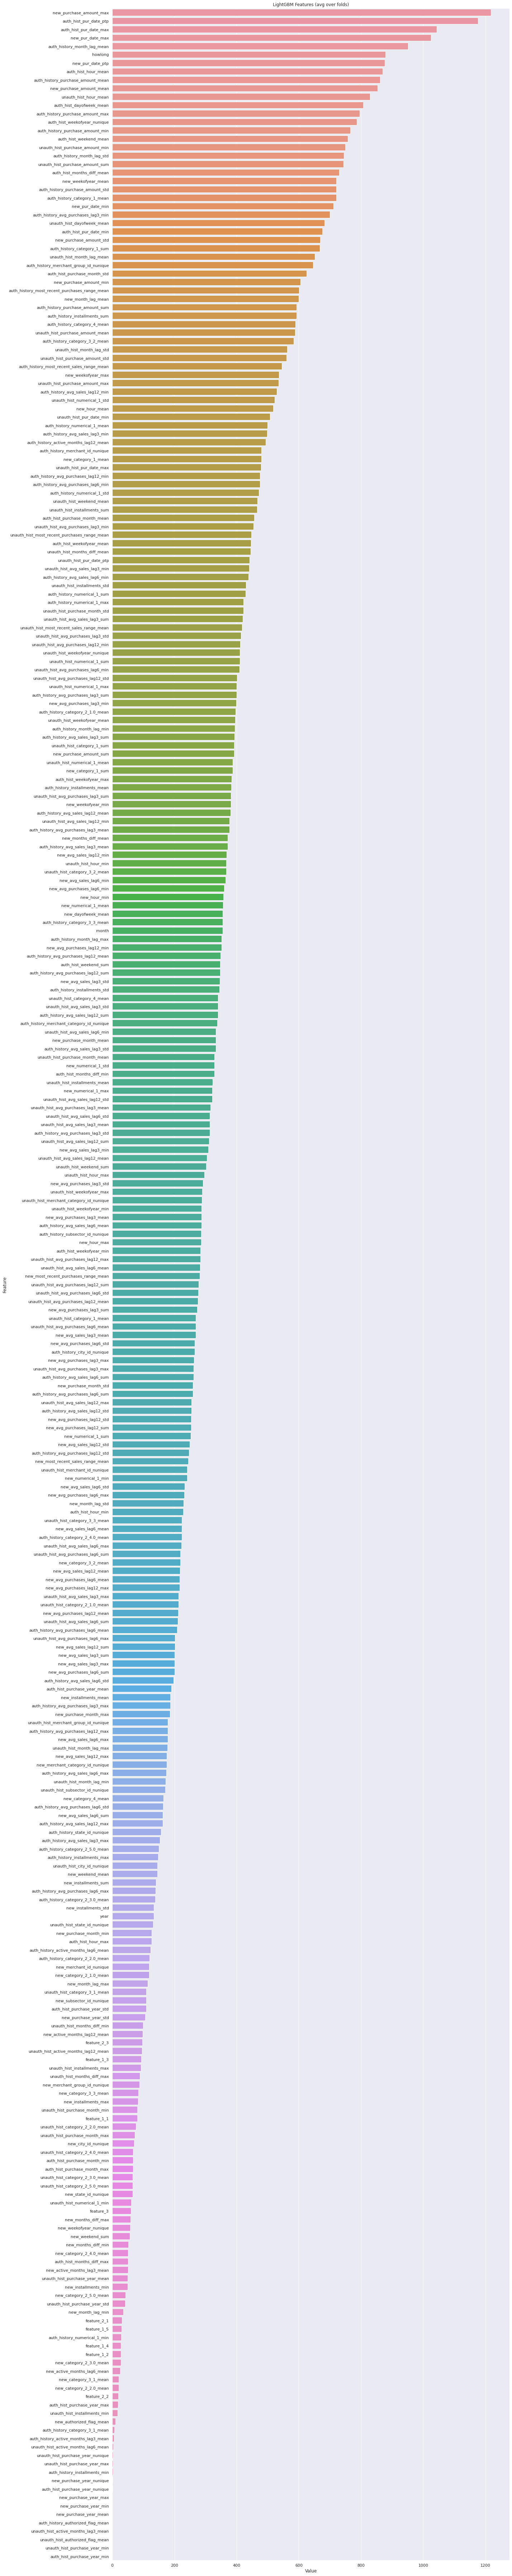

In [41]:
#https://www.kaggle.com/ashishpatel26/feature-importance-of-lightgbm
sns.set(rc={'figure.figsize':(20,100)})
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

#plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

Prepare for submission

In [ ]:
Y_predict=model.predict(X_test)
column_values=['target']
df = pd.DataFrame(data = Y_predict,columns = column_values)
df.shape
X_test_card.head()
test_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/test.csv')
df['card_id']=test_csv['card_id']
submission=pd.DataFrame()
submission['card_id']=df['card_id']
submission['target']=df['target']
submission.shape
submission.to_csv('mysubmission.csv',index=False)

In [1]:
print("After submitting in Kaggle:")

After submitting in Kaggle:


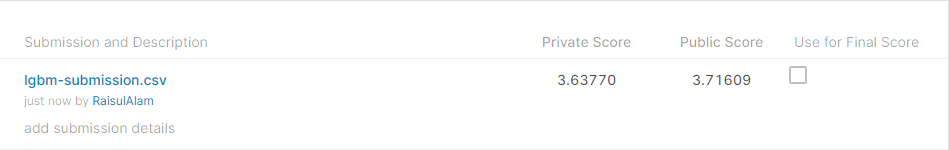

# Neural Network 

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Flatten
from keras.layers import Dense, Input , Dropout
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization

In [48]:
X_train.shape

(170000, 303)

In [58]:
model = Sequential()
model.add(Dense(2 ** 10, input_dim = 303, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.25))    
model.add(BatchNormalization())
model.add(Dense(2 ** 9, kernel_initializer='random_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 
model.add(Dense(2 ** 5, kernel_initializer='random_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))      
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')

In [59]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_CV, Y_CV))

Epoch 1/30
5313/5313 [==============================] - 24s 4ms/step - loss: 3.3931 - val_loss: 1.4300
Epoch 2/30
5313/5313 [==============================] - 22s 4ms/step - loss: 3.3898 - val_loss: 1.4288
Epoch 3/30
5313/5313 [==============================] - 23s 4ms/step - loss: 3.3814 - val_loss: 1.4341
Epoch 4/30
5313/5313 [==============================] - 23s 4ms/step - loss: 3.3964 - val_loss: 1.4315
Epoch 5/30
5313/5313 [==============================] - 22s 4ms/step - loss: 3.3894 - val_loss: 1.4327
Epoch 6/30
5313/5313 [==============================] - 22s 4ms/step - loss: 3.3822 - val_loss: 1.4338
Epoch 7/30
5313/5313 [==============================] - 24s 4ms/step - loss: 3.3836 - val_loss: 1.4309
Epoch 8/30
5313/5313 [==============================] - 22s 4ms/step - loss: 3.3832 - val_loss: 1.4325
Epoch 9/30
5313/5313 [==============================] - 23s 4ms/step - loss: 3.3814 - val_loss: 1.4334
Epoch 10/30
5313/5313 [==============================] - 22s 4ms/step - l

In [ ]:
Y_predict=model.predict(X_test)
#This is for test submission
column_values=['target']
df = pd.DataFrame(data = Y_predict,columns = column_values)
df.shape
#X_test_card.head()
test_csv=pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/test.csv')
df['card_id']=test_csv['card_id']
submission=pd.DataFrame()
submission['card_id']=df['card_id']
submission['target']=df['target']
submission.shape
submission.to_csv('mysubmission_mlp.csv',index=False)

But after submitting the rmse(private score) is increased to 3.8 

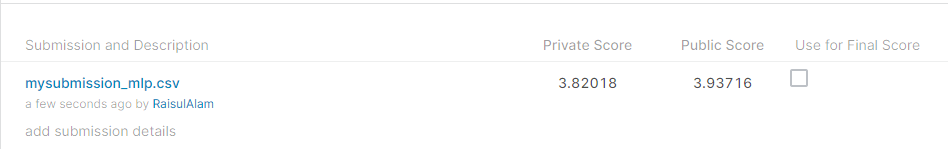

# XGBoost Regressor

In [37]:
import xgboost as xgb
model_xgb =  xgb.XGBRegressor(max_depth=2,
                              colsample_bytree=0.7,
                              n_estimators=20000,
                              scale_pos_weight = 9,
                              learning_rate=0.02,
                              min_child_weight=1.5,
                              #max_depth=3,
                              reg_alpha=0.75,
                              reg_lambda=0.45, 
                              verbosity =1,
                              eval_metric  = 'rmse',
                              tree_method='gpu_hist',
                              n_jobs=-1)


In [44]:
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import RepeatedKFold

import lightgbm as lgbm

import gc
from sklearn.metrics import mean_squared_error

oof = np.zeros(len(train))
predictions = np.zeros(len(test))

#folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
folds = RepeatedKFold(n_splits=5, n_repeats=2, random_state=4950)

for fold_index, (train_index,val_index) in enumerate(folds.split(X_train.values,Y_train.values)):
    print("fold:",fold_index,"started")
    gc.collect()
    bst = model_xgb.fit(X_train.iloc[train_index],Y_train.iloc[train_index],
              eval_set = [(X_train.iloc[val_index],Y_train.iloc[val_index])],
              early_stopping_rounds=200,
              verbose= 200, 
              eval_metric ='rmse'
              )
    #val[val_index] = model_xgb.predict_proba(train[val_index])[:,1]
    #print('auc of this val set is {}'.format(roc_auc_score(y[val_index],val[val_index])))
    #pred += model_xgb.predict(test.values)[:,1]/folds.n_splits
    
    oof[val_index] = bst.predict(X_train.iloc[val_index]) 
    predictions += bst.predict(X_test) / (5*2)
    
np.sqrt(mean_squared_error(oof, Y_train))

fold: 0 started
[0]	validation_0-rmse:3.95585
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:3.74718
[400]	validation_0-rmse:3.73106
[600]	validation_0-rmse:3.72228
[800]	validation_0-rmse:3.71696
[1000]	validation_0-rmse:3.71361
[1200]	validation_0-rmse:3.71155
[1400]	validation_0-rmse:3.70988
[1600]	validation_0-rmse:3.70868
[1800]	validation_0-rmse:3.70792
[2000]	validation_0-rmse:3.70700
[2200]	validation_0-rmse:3.70681
[2400]	validation_0-rmse:3.70653
[2600]	validation_0-rmse:3.70633
[2800]	validation_0-rmse:3.70596
[3000]	validation_0-rmse:3.70548
[3200]	validation_0-rmse:3.70507
[3400]	validation_0-rmse:3.70477
[3600]	validation_0-rmse:3.70471
[3800]	validation_0-rmse:3.70446
[4000]	validation_0-rmse:3.70406
[4200]	validation_0-rmse:3.70401
Stopping. Best iteration:
[4176]	validation_0-rmse:3.70395

fold: 1 started
[0]	validation_0-rmse:4.03851
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:3.8

3.704836623559138

In [43]:
np.sqrt(mean_squared_error(oof, Y_train))

3.704836623559138

In [45]:
sample_submission = pd.read_csv('../input/elo-merchant-category-recommendation/sample_submission.csv')
sample_submission['target'] = predictions
sample_submission.to_csv('xgb_submission.csv', index=False)

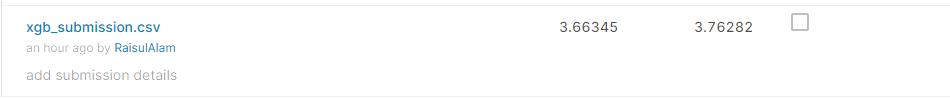

In [2]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model_Description", "Public Score", "Private Score"]
x.add_row(["LGBM Regressor", 3.71609, 3.63770])
x.add_row(["XGBOOST Regressor", 3.76282, 3.66345])
x.add_row(["MLP Architecture",3.93716, 3.82018])
print(x)

+-------------------+--------------+---------------+
| Model_Description | Public Score | Private Score |
+-------------------+--------------+---------------+
|   LGBM Regressor  |   3.71609    |     3.6377    |
| XGBOOST Regressor |   3.76282    |    3.66345    |
|  MLP Architecture |   3.93716    |    3.82018    |
+-------------------+--------------+---------------+


To improve the RMSE for the test submission , we will take the reference to other kernels and perform some 
advanced feature engineering with the Kfold modelling technic

#### This kernel is extensively inspired from the below reference kernel

ref: https://www.kaggle.com/mfjwr1/simple-lightgbm-without-blending/output

In [3]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import time
import warnings
import gc
gc.collect()
import os
from six.moves import urllib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
from sklearn.model_selection import KFold #for K-fold cross validation
from scipy import sparse

In [ ]:
train_csv = pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/train.csv',parse_dates=["first_active_month"])
test_csv = pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/test.csv',parse_dates=["first_active_month"])

In [6]:
# Remove the Outliers if any 
train_csv['outliers'] = 0
train_csv.loc[train_csv['target'] < -30, 'outliers'] = 1
train_csv['outliers'].value_counts()

for features in ['feature_1','feature_2','feature_3']:
    order_label = train_csv.groupby([features])['outliers'].mean()
    #print(order_label)
    train_csv[features] = train_csv[features].map(order_label)
    test_csv[features] =  test_csv[features].map(order_label)

In [7]:
#train
train_csv['day'] = (datetime.date(2018, 2, 1) - train_csv['first_active_month'].dt.date).dt.days
train_csv['quarter'] = train_csv['first_active_month'].dt.quarter

for feature in ['feature_1','feature_2','feature_3']:
  column=feature+'_day'
  train_csv[column] = train_csv['day'] * train_csv[feature]
  column=feature+'_day_ratio'
  train_csv[column] = train_csv[feature] / train_csv['day']


In [8]:
#test
test_csv['day'] = (datetime.date(2018, 2, 1) - test_csv['first_active_month'].dt.date).dt.days
test_csv['quarter'] = test_csv['first_active_month'].dt.quarter

for feature in ['feature_1','feature_2','feature_3']:
  column=feature+'_day'
  test_csv[column] = test_csv['day'] * test_csv[feature]
  column=feature+'_day_ratio'
  test_csv[column] = test_csv[feature] / test_csv['day']


gc.collect()

30

In [1]:
historical_transactions = pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/historical_transactions.csv')
new_merchant_transactions = pd.read_csv('/kaggle/input/elo-merchant-category-recommendation/new_merchant_transactions.csv')
gc.collect()

In [10]:
#history
historical_transactions['category_3']=historical_transactions['category_3'].fillna('A',inplace=True)
historical_transactions['category_2']=historical_transactions['category_2'].fillna(1.0,inplace=True)
historical_transactions['merchant_id']=historical_transactions['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)

#new
new_merchant_transactions['category_2'] = new_merchant_transactions['category_2'].fillna(1.0,inplace=True)
new_merchant_transactions['category_3'] = new_merchant_transactions['category_3'].fillna('A',inplace=True)
new_merchant_transactions['merchant_id'] = new_merchant_transactions['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)

In [11]:
#history
historical_transactions['installments'].replace(-1, np.nan,inplace=True)
historical_transactions['installments'].replace(999, np.nan,inplace=True)

#new
new_merchant_transactions['installments'].replace(-1, np.nan,inplace=True)
new_merchant_transactions['installments'].replace(999, np.nan,inplace=True)

In [12]:
#history
historical_transactions['purchase_amount'] = historical_transactions['purchase_amount'].apply(lambda x: min(x, 0.8))

#new
new_merchant_transactions['purchase_amount'] = new_merchant_transactions['purchase_amount'].apply(lambda x: min(x, 0.8))

In [24]:
#https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
#history
historical_transactions['authorized_flag'] = historical_transactions['authorized_flag'].map({'Y': 1, 'N': 0})
historical_transactions['category_1'] = historical_transactions['category_1'].map({'Y': 1, 'N': 0})
historical_transactions['category_3'] = historical_transactions['category_3'].map({'A': 1, 'B': 2, 'C': 3})

#new
new_merchant_transactions['authorized_flag'] = new_merchant_transactions['authorized_flag'].map({'Y': 1, 'N': 0})
new_merchant_transactions['category_1'] = new_merchant_transactions['category_1'].map({'Y': 1, 'N': 0})
new_merchant_transactions['category_3'] = new_merchant_transactions['category_3'].map({'A':0, 'B':1, 'C':2})

In [13]:
#https://www.kaggle.com/juliaflower/feature-selection-lgbm-with-python

#history
historical_transactions['pur_date'] = pd.DatetimeIndex(historical_transactions['purchase_date']).date
historical_transactions['pur_date'] = pd.DatetimeIndex(historical_transactions['pur_date']).astype(np.int64) * 1e-9

#new
new_merchant_transactions['pur_date'] = pd.DatetimeIndex(new_merchant_transactions['purchase_date']).date
new_merchant_transactions['pur_date'] = pd.DatetimeIndex(new_merchant_transactions['pur_date']).astype(np.int64) * 1e-9



In [14]:
#history
historical_transactions['purchase_date']=pd.to_datetime(historical_transactions['purchase_date'],format='%Y-%m')

#new
new_merchant_transactions['purchase_date']=pd.to_datetime(new_merchant_transactions['purchase_date'],format='%Y-%m')

In [15]:
#ref: https://stackoverflow.com/questions/42822768/pandas-number-of-months-between-two-dates

def date_features(data):
  import datetime 
  current_time = datetime.datetime.now()
  data['months_diff']= (current_time.year - data.purchase_date.dt.year) * 12 + (current_time.month - data.purchase_date.dt.month)
  data['months_diff'] = data['months_diff'] + data['month_lag']
  data['purchase_month']=data.purchase_date.dt.month
  data['purchase_day']=data['purchase_date'].dt.day
  data['weekday']=data['purchase_date'].dt.weekday
  data['purchase_year'] = data['purchase_date'].dt.year
  #data['purchase_month'] = data['purchase_date'].dt.month
  data['weekofyear'] = data['purchase_date'].dt.weekofyear
  data['dayofweek'] = data['purchase_date'].dt.dayofweek
  data['weekend'] = (data.purchase_date.dt.weekday >=5).astype(int)
  data['hour'] = data['purchase_date'].dt.hour

  return data

In [16]:
historical_transactions = date_features(historical_transactions)
new_merchant_transactions = date_features(new_merchant_transactions)

In [17]:
#other features:
historical_transactions['duration'] = historical_transactions['purchase_amount'] * historical_transactions['months_diff']
historical_transactions['amount_month_ratio'] = historical_transactions['purchase_amount'] / historical_transactions['months_diff']
historical_transactions['price'] = historical_transactions['purchase_amount'] / historical_transactions['installments']

new_merchant_transactions['duration'] = new_merchant_transactions['purchase_amount'] * new_merchant_transactions['months_diff']
new_merchant_transactions['amount_month_ratio'] = new_merchant_transactions['purchase_amount'] / new_merchant_transactions['months_diff']
new_merchant_transactions['price'] = new_merchant_transactions['purchase_amount'] / new_merchant_transactions['installments']


In [18]:
for i in ['category_2','category_3']:
  historical_transactions[i + '_mean']=historical_transactions['purchase_amount'].groupby(historical_transactions[i]).agg('mean')
  historical_transactions[i + '_min']=historical_transactions['purchase_amount'].groupby(historical_transactions[i]).agg('min')
  historical_transactions[i + '_max']=historical_transactions['purchase_amount'].groupby(historical_transactions[i]).agg('max')
  historical_transactions[i + '_sum']=historical_transactions['purchase_amount'].groupby(historical_transactions[i]).agg('sum')
  historical_transactions[i + '_var']=historical_transactions['purchase_amount'].groupby(historical_transactions[i]).agg('var')

  new_merchant_transactions[i + '_mean']=new_merchant_transactions['purchase_amount'].groupby(new_merchant_transactions[i]).agg('mean')
  new_merchant_transactions[i + '_min']=new_merchant_transactions['purchase_amount'].groupby(new_merchant_transactions[i]).agg('min')
  new_merchant_transactions[i + '_max']=new_merchant_transactions['purchase_amount'].groupby(new_merchant_transactions[i]).agg('max')
  new_merchant_transactions[i + '_sum']=new_merchant_transactions['purchase_amount'].groupby(new_merchant_transactions[i]).agg('sum')
  new_merchant_transactions[i + '_var']=new_merchant_transactions['purchase_amount'].groupby(new_merchant_transactions[i]).agg('var')

In [26]:
#ref: https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/
#This function performs the aggregate  operation on the numerical features
def aggregate_func(data,str_data):
    agg_func= {
      'authorized_flag':['sum','mean'],
      'card_id':['size','count'],
      'category_1':['mean','sum','max','min'],
      'installments':['max','var','mean','skew','sum'],
      'merchant_category_id':['nunique'],
      'month_lag':['max','mean','min','var','skew'],
      'purchase_amount':['max','mean','min','var','sum','skew'],
      'subsector_id':['nunique'],
      'months_diff':['mean','max','min','var','skew'],
      'purchase_month':['max','min','mean','nunique'],
      'weekofyear': ['mean','max','min','nunique'],
      'weekend': ['sum', 'mean'],
      'weekday':['sum','mean'],
      'hour': ['mean','max','min','nunique'], 
      'purchase_day':['nunique','max','min','mean'],
      'pur_date':['max','min'],
      'price' :['sum','mean','max','min','var'],
      'duration' : ['mean','min','max','var','skew'],
      'amount_month_ratio':['mean','min','max','var','skew'],

    }
    #print("11")
    featured_data=data.groupby(['card_id']).agg(agg_func)
    #print(featured_data)
    #print("ssss")
    col_list=[]
    for col in featured_data.columns:
        col_str='_'.join(col)
        col_str=str_data + col_str
        ren_name=col_str.split(",")
        col_list.extend(ren_name)
        
    col_list.insert(0,'card_id')
    featured_data.reset_index(inplace=True)
    return featured_data,col_list


In [20]:
#historical_transactions.info

In [27]:
hist_trans,col_list=aggregate_func(historical_transactions,'hist_')
hist_trans.columns=col_list

In [28]:
new_trans,col_list=aggregate_func(new_merchant_transactions,'new_')
new_trans.columns=col_list

In [30]:
train_data=pd.merge(train_csv,hist_trans,on='card_id',how='left')
test_data=pd.merge(test_csv,hist_trans,on='card_id',how='left')

train_data=pd.merge(train_data,new_trans,on='card_id',how='left')
test_data=pd.merge(test_data,new_trans,on='card_id',how='left')

In [31]:
gc.collect()

42

In [32]:
def additional_feature(data,str):
  data[str +'_purchase_date_max'] = pd.to_datetime(data[str + '_pur_date_max'])
  #print("1")
  data[str + '_purchase_date_min'] = pd.to_datetime(data[str + '_pur_date_min'])
  #print("2")
  data[str + '_purchase_date_diff'] = (data[str + '_purchase_date_max'] - data[str + '_purchase_date_min']).dt.days
  data[str + '_purchase_date_average'] = data[str + '_purchase_date_diff']/data[str + '_card_id_size']
  #print("3")
  data[str + '_purchase_date_uptonow'] = (datetime.datetime.today() - data[str + '_purchase_date_max']).dt.days
  #print("4")
  data[str + '_purchase_date_uptomin'] = (datetime.datetime.today() - data[str + '_purchase_date_min']).dt.days
  #print("5")
  data[str + '_first_buy'] = (data[str + '_purchase_date_min'] - data['first_active_month']).dt.days
  data[str + '_last_buy'] = (data[str + '_purchase_date_max'] - data['first_active_month']).dt.days
  
  if (str=='hist'):
    for feature in [str + '_purchase_date_max', str + '_purchase_date_min']:
      data[feature] = data[feature].astype(np.int64) * 1e-9
  
  if (str=='new'):
    for feature in ['new_purchase_date_max','new_purchase_date_min']:
      data[feature] = pd.DatetimeIndex(data[feature]).astype(np.int64) * 1e-9
  
  return data



In [33]:
train_data=additional_feature(train_data,'hist')
train_data=additional_feature(train_data,'new')

test_data=additional_feature(test_data,'hist')
test_data=additional_feature(test_data,'new')

In [34]:
def combined_feature(data):
  data['card_id_total'] = data['new_card_id_size'] + data['hist_card_id_size']
  data['card_id_cnt_total'] = data['new_card_id_count'] + data['hist_card_id_count']
  data['card_id_cnt_ratio'] = data['new_card_id_count'] / data['hist_card_id_count']
  data['purchase_amount_total'] = data['new_purchase_amount_sum'] + data['hist_purchase_amount_sum']
  data['purchase_amount_mean'] = data['new_purchase_amount_mean'] + data['hist_purchase_amount_mean']
  data['purchase_amount_max'] = data['new_purchase_amount_max'] + data['hist_purchase_amount_max']
  data['purchase_amount_min'] = data['new_purchase_amount_min']+ data['hist_purchase_amount_min']
  data['purchase_amount_ratio'] = data['new_purchase_amount_sum'] / data['hist_purchase_amount_sum']
  data['month_diff_mean'] = data['new_months_diff_mean'] + data['hist_months_diff_mean']
  data['month_diff_ratio'] = data['new_months_diff_mean'] / data['hist_months_diff_mean']
  data['month_lag_mean'] = data['new_month_lag_mean'] + data['hist_month_lag_mean']
  data['month_lag_max'] = data['new_month_lag_max'] + data['hist_month_lag_max']
  data['month_lag_min'] = data['new_month_lag_min']+ data['hist_month_lag_min']
  data['category_1_mean'] = data['new_category_1_mean'] + data['hist_category_1_mean']
  data['installments_total'] = data['new_installments_sum'] + data['hist_installments_sum']
  data['installments_mean'] = data['new_installments_mean'] + data['hist_installments_mean']
  data['installments_max'] = data['new_installments_max'] + data['hist_installments_max']
  data['installments_ratio'] = data['new_installments_sum'] / data['hist_installments_sum']
  data['price_total'] = data['purchase_amount_total'] / data['installments_total']
  data['price_mean'] = data['purchase_amount_mean'] / data['installments_mean']
  data['price_max'] = data['purchase_amount_max'] / data['installments_max']
  data['duration_mean'] = data['new_duration_mean'] + data['hist_duration_mean']
  data['duration_min'] = data['new_duration_min'] + data['hist_duration_min']
  data['duration_max'] = data['new_duration_max'] + data['hist_duration_max']
  data['amount_month_ratio_mean']= data['new_amount_month_ratio_mean'] + data['hist_amount_month_ratio_mean']
  data['amount_month_ratio_min'] = data['new_amount_month_ratio_min'] + data['hist_amount_month_ratio_min']
  data['amount_month_ratio_max']= data['new_amount_month_ratio_max'] + data['hist_amount_month_ratio_max']
  data['new_CLV'] = data['new_card_id_count'] * data['new_purchase_amount_sum'] / data['new_months_diff_mean']
  data['hist_CLV'] = data['hist_card_id_count'] * data['hist_purchase_amount_sum'] / data['hist_months_diff_mean']
  data['CLV_ratio'] = data['new_CLV'] / data['hist_CLV']

  return data

In [35]:
train=combined_feature(train_data)
test=combined_feature(test_data)

In [36]:
train.to_pickle('train.pkl')
test.to_pickle('test.pkl')

In [4]:
import pickle
test=pd.read_pickle('/kaggle/input/todaydata/test.pkl')
train=pd.read_pickle('/kaggle/input/todaydata/train.pkl')

In [5]:
feature = [c for c in train.columns if c not in ['target', 'outliers']]
#target = train['target']
cols=train[feature].columns


In [6]:
# https://www.kaggle.com/c/elo-merchant-category-recommendation/discussion/77537
from tqdm import tqdm
from scipy.stats import ks_2samp
list_p_value =[]

for i in tqdm(cols):
    list_p_value.append(ks_2samp(test[i] , train[i])[1])

Se = pd.Series(list_p_value, index = cols).sort_values() 
list_discarded = list(Se[Se < .1].index)

100%|██████████| 195/195 [00:10<00:00, 18.93it/s]


In [7]:
discard_cols=list_discarded + ['target', 'outliers']
feature = [c for c in train.columns if c not in discard_cols]

In [8]:
X_Train=train[feature]
Y_Train=train['target']

In [9]:
X_Train = X_Train.drop(['card_id', 'first_active_month'], axis = 1)
#test = test.drop(['card_id', 'first_active_month'], axis = 1)

In [10]:
def root_mean_squared_error(y_true, y_pred):
    """Root mean squared error regression loss"""
    return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [12]:
#https://www.kaggle.com/aleksandrovich/smart-hyperparameter-tuning-with-optuna
import lightgbm as lgbm
from optuna.samplers import TPESampler
import optuna

sampler = TPESampler(seed=10) # for reproducibility
def objective(trial):
    
    # dtrain = lgb.Dataset(X_train, label=y_train)
    
    param = {
              'objective': 'regression', 
              'metric': 'rmse',
              'verbosity': -1,  
              'learning_rate': 0.01,
              'device': 'gpu',  
              'seed': trial.suggest_int('seed',1,50),
              'boosting_type': 'gbdt', 
              'n_jobs': -1,
              'num_leaves': trial.suggest_int('num_leaves', 16, 64), 
              'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.001, 1),
              'subsample': trial.suggest_uniform('subsample', 0.001, 1),
              'top_rate': trial.suggest_uniform('top_rate', 0.001, 1),
              'other_rate': trial.suggest_uniform('other_rate', 0.001, 1),
              'max_depth': trial.suggest_int('max_depth', 1, 12),
              'reg_alpha': trial.suggest_uniform('reg_alpha', 0, 10), 
              'reg_lambda': trial.suggest_uniform('reg_lambda', 0, 10),
              'min_split_gain': trial.suggest_uniform('min_split_gain', 0, 10), 
              'min_child_weight': trial.suggest_uniform('min_child_weight', 0, 45),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 16, 64)
              }

    
    lgbm_regr = lgbm.LGBMRegressor(**param)
    gbm_2 = lgbm_regr.fit(X_Train, Y_Train, eval_set=[(X_Train, Y_Train)], verbose=False)
    return root_mean_squared_error(Y_Train,gbm_2.predict(X_Train))

study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=200)

[I 2020-11-20 11:25:37,613] A new study created in memory with name: no-name-6578a692-c698-4d28-a3cc-ad371a31a62e
[I 2020-11-20 11:25:51,310] Trial 0 finished with value: 3.7713163522359276 and parameters: {'seed': 10, 'num_leaves': 52, 'colsample_bytree': 0.49509533960383073, 'subsample': 0.44357193274091977, 'top_rate': 0.8320794476122297, 'other_rate': 0.5837384152007985, 'max_depth': 2, 'reg_alpha': 7.09208009843012, 'reg_lambda': 2.65566126772097, 'min_split_gain': 2.6360284602895234, 'min_child_weight': 6.7670040267794676, 'min_data_in_leaf': 32}. Best is trial 0 with value: 3.7713163522359276.
[I 2020-11-20 11:26:00,717] Trial 1 finished with value: 3.7092360587328757 and parameters: {'seed': 37, 'num_leaves': 63, 'colsample_bytree': 0.33673551288008735, 'subsample': 0.8909257141486431, 'top_rate': 0.1989236912199373, 'other_rate': 0.031586037218820716, 'max_depth': 5, 'reg_alpha': 2.9187606817063316, 'reg_lambda': 9.177741225129434, 'min_split_gain': 7.145757833976906, 'min_chi

In [3]:
target=train['target']
train = train.drop(['card_id', 'first_active_month'], axis = 1)
test = test.drop(['card_id', 'first_active_month'], axis = 1)

In [24]:
test.shape

(123623, 193)

In [28]:
feature.remove('first_active_month')
feature.remove('card_id')

In [ ]:
feature = [c for c in train.columns if c not in ['first_active_month', 'target', 'card_id', 'outliers',
                  'hist_purchase_date_max', 'hist_purchase_date_min', 'hist_card_id_size',
                  'new_purchase_date_max', 'new_purchase_date_min', 'new_card_id_size']] 
target = train['target']

# LGBM Regressor

In [21]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm

from sklearn.metrics import mean_squared_error

oof = np.zeros(len(train))
predictions = np.zeros(len(test))

skf = StratifiedKFold(n_splits=5,shuffle = True, random_state=4950)

fold=0
for train_index, test_index in skf.split(train.values, train['outliers'].values):
    X_train, Y_train = train.iloc[train_index][feature], target.iloc[train_index]
    X_test, Y_test = train.iloc[test_index][feature], target.iloc[test_index]

    
    data_train=lgbm.Dataset(X_train,label=Y_train) 
    data_test=lgbm.Dataset(X_test,label=Y_test)
    
  #after tweaking the few parameter ,obtained using optuna  
    param ={
                'task': 'train',
                'boosting': 'goss',
                'objective': 'regression',
                'metric': 'rmse',
                'learning_rate': 0.01,
                'subsample': 0.9855232997390695,
                'max_depth': 7,
                'top_rate': 0.9064148448434349,
                'num_leaves': 63,
                'min_child_weight': 41.9612869171337,
                'other_rate': 0.0721768246018207,
                'reg_alpha': 9.677537745007898,
                'colsample_bytree': 0.5665320670155495,
                'min_split_gain': 9.820197773625843,
                'reg_lambda': 8.2532317400459,
                'min_data_in_leaf': 21,
                'verbose': -1,
                'seed':int(2**fold),
                'bagging_seed':int(2**fold),
                'drop_seed':int(2**fold)
                }
    
    num_round = 10000
    
    model = lgbm.train(param, data_train, num_round, valid_sets = [data_train, data_test], 
                    verbose_eval=-1, early_stopping_rounds = 200)
    
    oof[test_index] = model.predict(train.iloc[test_index][feature], num_iteration=model.best_iteration)
    
    
    predictions += model.predict(test[feature], num_iteration=model.best_iteration) / skf.n_splits
    
    fold=fold+1
    
np.sqrt(mean_squared_error(oof, target))
    

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1037]	training's rmse: 3.3741	valid_1's rmse: 3.65358
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1397]	training's rmse: 3.32412	valid_1's rmse: 3.65022
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[841]	training's rmse: 3.4003	valid_1's rmse: 3.66828
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1185]	training's rmse: 3.35631	valid_1's rmse: 3.6489
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[873]	training's rmse: 3.4009	valid_1's rmse: 3.65938


3.6560778694866767

In [22]:
from sklearn.model_selection import RepeatedKFold
import lightgbm as lgbm

from sklearn.metrics import mean_squared_error

oof_rkfold = np.zeros(len(train))
predictions_rkfold = np.zeros(len(test))

rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=4950)

fold=0
for train_index, test_index in rkf.split(train.values, target.values):
    X_train, Y_train = train.iloc[train_index][feature], target.iloc[train_index]
    X_test, Y_test = train.iloc[test_index][feature], target.iloc[test_index]

    
    data_train=lgbm.Dataset(X_train,label=Y_train) 
    data_test=lgbm.Dataset(X_test,label=Y_test)
    
    print("fold:",fold)
    
    param ={
                'task': 'train',
                'boosting': 'goss',
                'objective': 'regression',
                'metric': 'rmse',
                'learning_rate': 0.01,
                'subsample': 0.9855232997390695,
                'max_depth': 7,
                'top_rate': 0.9064148448434349,
                'num_leaves': 63,
                'min_child_weight': 41.9612869171337,
                'other_rate': 0.0721768246018207,
                'reg_alpha': 9.677537745007898,
                'colsample_bytree': 0.5665320670155495,
                'min_split_gain': 9.820197773625843,
                'reg_lambda': 8.2532317400459,
                'min_data_in_leaf': 21,
                'verbose': -1,
                'seed':int(2**fold),
                'bagging_seed':int(2**fold),
                'drop_seed':int(2**fold)
                }
    
    num_round = 10000
    
    models = lgbm.train(param, data_train, num_round, valid_sets = [data_train, data_test], 
                    verbose_eval=-1, early_stopping_rounds = 200)
    
    oof_rkfold[test_index] = models.predict(train.iloc[test_index][feature], num_iteration=models.best_iteration)
    
    #feature=[c for c in train.columns if c not in ['outliers']]
    predictions_rkfold += models.predict(test[feature], num_iteration=models.best_iteration) / (5*2)
    
    fold=fold+1
    
np.sqrt(mean_squared_error(oof_rkfold, target))
    

fold: 0
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1017]	training's rmse: 3.37683	valid_1's rmse: 3.667
fold: 1
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1025]	training's rmse: 3.34465	valid_1's rmse: 3.80252
fold: 2
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[702]	training's rmse: 3.45443	valid_1's rmse: 3.56279
fold: 3
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1082]	training's rmse: 3.36701	valid_1's rmse: 3.61899
fold: 4
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[992]	training's rmse: 3.38719	valid_1's rmse: 3.61939
fold: 5
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[869]	training's rmse: 3.38518	valid_1's rmse: 3.73264
fold: 6
Training until validation score

3.6548108906553756

In [23]:
from sklearn.linear_model import BayesianRidge

train_stack = np.vstack([oof,oof_rkfold]).transpose()
test_stack = np.vstack([predictions, predictions_rkfold]).transpose()

folds_stack = RepeatedKFold(n_splits=5, n_repeats=1, random_state=4590)
oof_stack = np.zeros(train_stack.shape[0])
predictions_3 = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,target)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], target.iloc[val_idx].values
    
    model = BayesianRidge()
    model.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = model.predict(val_data)
    predictions_3 += model.predict(test_stack) / 5
    
np.sqrt(mean_squared_error(target.values, oof_stack))


fold 0
fold 1
fold 2
fold 3
fold 4


3.6530326031203604

In [25]:
sample_submission = pd.read_csv('../input/elo-merchant-category-recommendation/sample_submission.csv')
sample_submission['target'] = predictions_3
sample_submission.to_csv('mysubmission.csv', index=False)

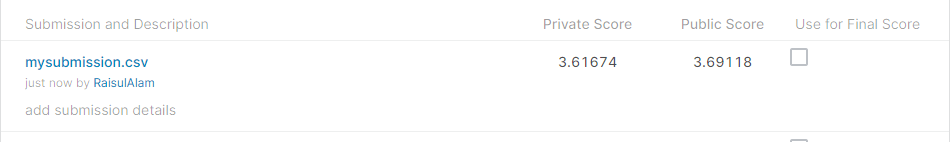

# XGBOOST Regressor

In [19]:
import xgboost as xgb

In [20]:
model_xgb =  xgb.XGBRegressor(max_depth=2,
                              colsample_bytree=0.7,
                              n_estimators=20000,
                              scale_pos_weight = 9,
                              learning_rate=0.02,
                              min_child_weight=1.5,
                              #max_depth=3,
                              reg_alpha=0.75,
                              reg_lambda=0.45, 
                              verbosity =1,
                              eval_metric  = 'rmse',
                              tree_method='gpu_hist',
                              n_jobs=-1)


In [22]:
target

0        -0.820312
1         0.392822
2         0.687988
3         0.142456
4        -0.159790
            ...   
201912   -2.740234
201913    0.312988
201914    0.093506
201915   -4.675781
201916   -1.859375
Name: target, Length: 201917, dtype: float16

In [32]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm

import gc
from sklearn.metrics import mean_squared_error

oof = np.zeros(len(train))
predictions = np.zeros(len(test))

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
for fold_index, (train_index,val_index) in enumerate(folds.split(train.values,train['outliers'].values)):
    print("fold:",fold_index,"started")
    gc.collect()
    bst = model_xgb.fit(train.iloc[train_index][feature],target.iloc[train_index],
              eval_set = [(train.iloc[val_index][feature],target.iloc[val_index])],
              early_stopping_rounds=200,
              verbose= 200, 
              eval_metric ='rmse'
              )
    #val[val_index] = model_xgb.predict_proba(train[val_index])[:,1]
    #print('auc of this val set is {}'.format(roc_auc_score(y[val_index],val[val_index])))
    #pred += model_xgb.predict(test.values)[:,1]/folds.n_splits
    
    oof[val_index] = bst.predict(train.iloc[val_index][feature]) 
    predictions += bst.predict(test[feature]) / folds.n_splits
    
np.sqrt(mean_squared_error(oof, target))

fold: 0 started
[0]	validation_0-rmse:3.94124
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:3.72281
[400]	validation_0-rmse:3.70677
[600]	validation_0-rmse:3.69799
[800]	validation_0-rmse:3.69340
[1000]	validation_0-rmse:3.69035
[1200]	validation_0-rmse:3.68792
[1400]	validation_0-rmse:3.68549
[1600]	validation_0-rmse:3.68345
[1800]	validation_0-rmse:3.68251
[2000]	validation_0-rmse:3.68143
[2200]	validation_0-rmse:3.68019
[2400]	validation_0-rmse:3.67942
[2600]	validation_0-rmse:3.67889
[2800]	validation_0-rmse:3.67861
[3000]	validation_0-rmse:3.67821
[3200]	validation_0-rmse:3.67798
[3400]	validation_0-rmse:3.67793
[3600]	validation_0-rmse:3.67780
Stopping. Best iteration:
[3451]	validation_0-rmse:3.67760

fold: 1 started
[0]	validation_0-rmse:3.93904
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:3.72049
[400]	validation_0-rmse:3.70606
[600]	validation_0-rmse:3.69851
[800]	validation_0-rmse:3.6942

3.694238229091928

In [33]:
sample_submission = pd.read_csv('../input/elo-merchant-category-recommendation/sample_submission.csv')
sample_submission['target'] = predictions
sample_submission.to_csv('xgb_mysubmission.csv', index=False)

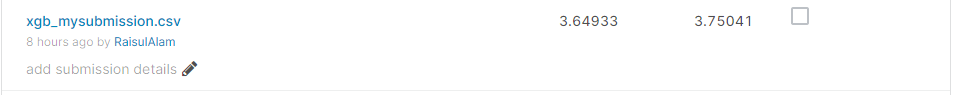

# MLP Architecture

In [36]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(train[feature], target, test_size=0.30, random_state=42)

In [54]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    """Root mean squared error regression loss"""
    return K.sqrt(K.mean(K.square(y_true-y_pred)))

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Flatten
from keras.layers import Dense, Input , Dropout
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_df[train_cols].shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer="adam")

In [66]:
model = Sequential()
model.add(Dense(2 ** 10, input_dim = 187, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.25))    
model.add(BatchNormalization())
model.add(Dense(2 ** 9, kernel_initializer='random_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 
model.add(Dense(2 ** 5, kernel_initializer='random_uniform', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))      
model.add(Dense(1))
model.compile(loss=keras_root_mean_squared_error, optimizer='adam')

In [67]:
history = model.fit(X_Train, Y_Train, batch_size=32, epochs=10, verbose=1, validation_data=(X_Test, Y_Test))

Epoch 1/10
4417/4417 [==============================] - 19s 4ms/step - loss: 3.1019 - val_loss: 3.2950
Epoch 2/10
4417/4417 [==============================] - 18s 4ms/step - loss: 3.1114 - val_loss: 3.1176
Epoch 3/10
4417/4417 [==============================] - 20s 4ms/step - loss: 3.0987 - val_loss: 3.1225
Epoch 4/10
4417/4417 [==============================] - 18s 4ms/step - loss: 3.1088 - val_loss: 3.1173
Epoch 5/10
4417/4417 [==============================] - 19s 4ms/step - loss: 3.1089 - val_loss: 3.1174
Epoch 6/10
4417/4417 [==============================] - 19s 4ms/step - loss: 3.1051 - val_loss: 3.1174
Epoch 7/10
4417/4417 [==============================] - 18s 4ms/step - loss: 3.1000 - val_loss: 3.1173
Epoch 8/10
4417/4417 [==============================] - 19s 4ms/step - loss: 3.1113 - val_loss: 3.1173
Epoch 9/10
4417/4417 [==============================] - 19s 4ms/step - loss: 3.1059 - val_loss: 3.1173
Epoch 10/10
4417/4417 [==============================] - 19s 4ms/step - l

In [68]:
prediction=model.predict(test[feature])

In [69]:
!rm /kaggle/working/*.csv

In [70]:
sample_submission = pd.read_csv('../input/elo-merchant-category-recommendation/sample_submission.csv')
sample_submission['target'] = prediction
sample_submission.to_csv('mlp_submission.csv', index=False)

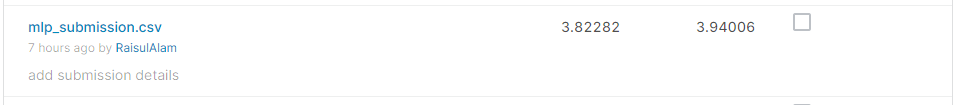

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model_Description", "Public Score", "Private Score"]
x.add_row(["LGBM Regressor with kfold", 3.69118, 3.61674])
x.add_row(["XGBOOST Regressor with k fold", 3.75041, 3.64933])
x.add_row(["MLP Architecture",3.94006,3.82282 ])
print(x)

+-------------------------------+--------------+---------------+
|       Model_Description       | Public Score | Private Score |
+-------------------------------+--------------+---------------+
|   LGBM Regressor with kfold   |   3.69118    |    3.61674    |
| XGBOOST Regressor with k fold |   3.75041    |    3.64933    |
|        MLP Architecture       |   3.94006    |    3.82282    |
+-------------------------------+--------------+---------------+


# Deployment

Currently the site is live at http://ec2-18-188-225-171.us-east-2.compute.amazonaws.com:8080/index .
This is done using Flask framework and it is deployed in AWS . 

There are few limitations exist in frontend perspective which can be improved further ie,
i) Entering the NULL/inproper value will hamper the loyalty score also Run time exceptions may occur which can be prevented further to make it real time compliance.
ii) UI can be improved significantly and make it responsive.

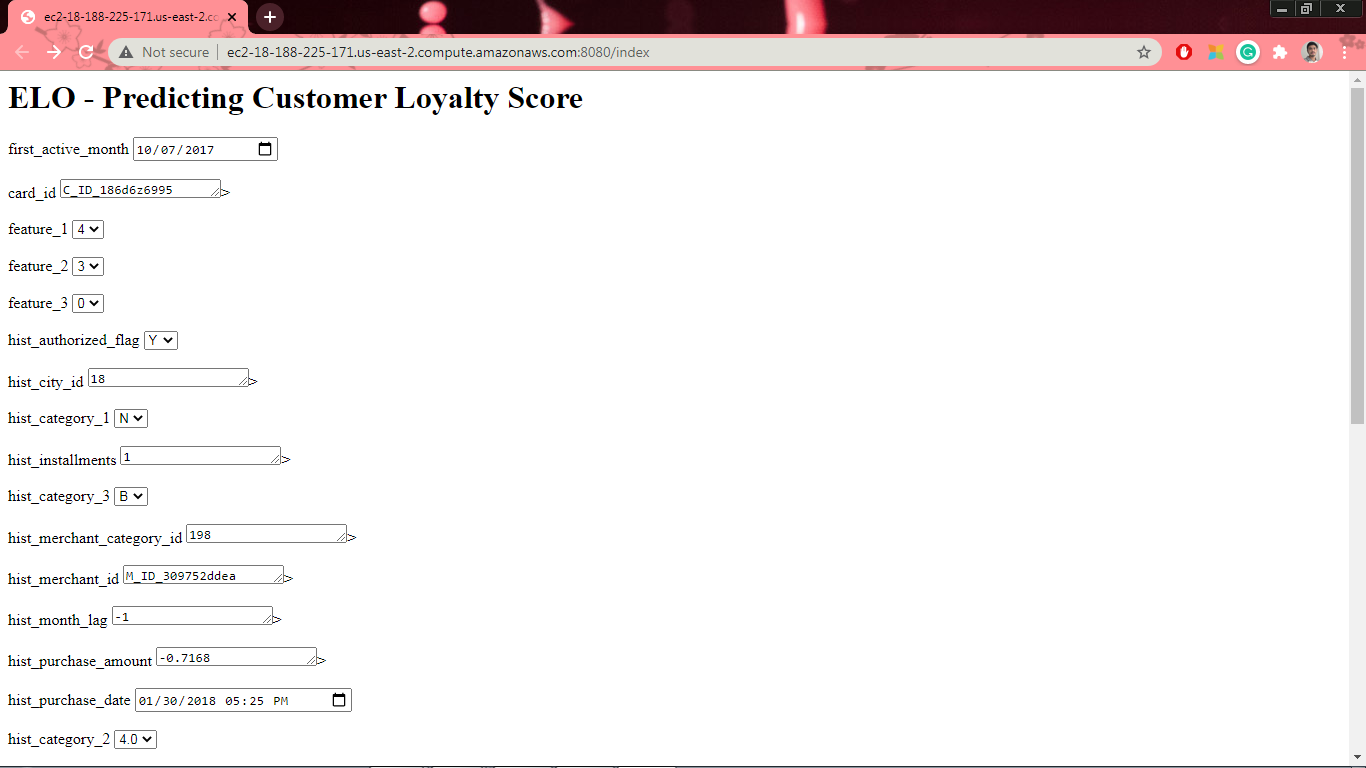

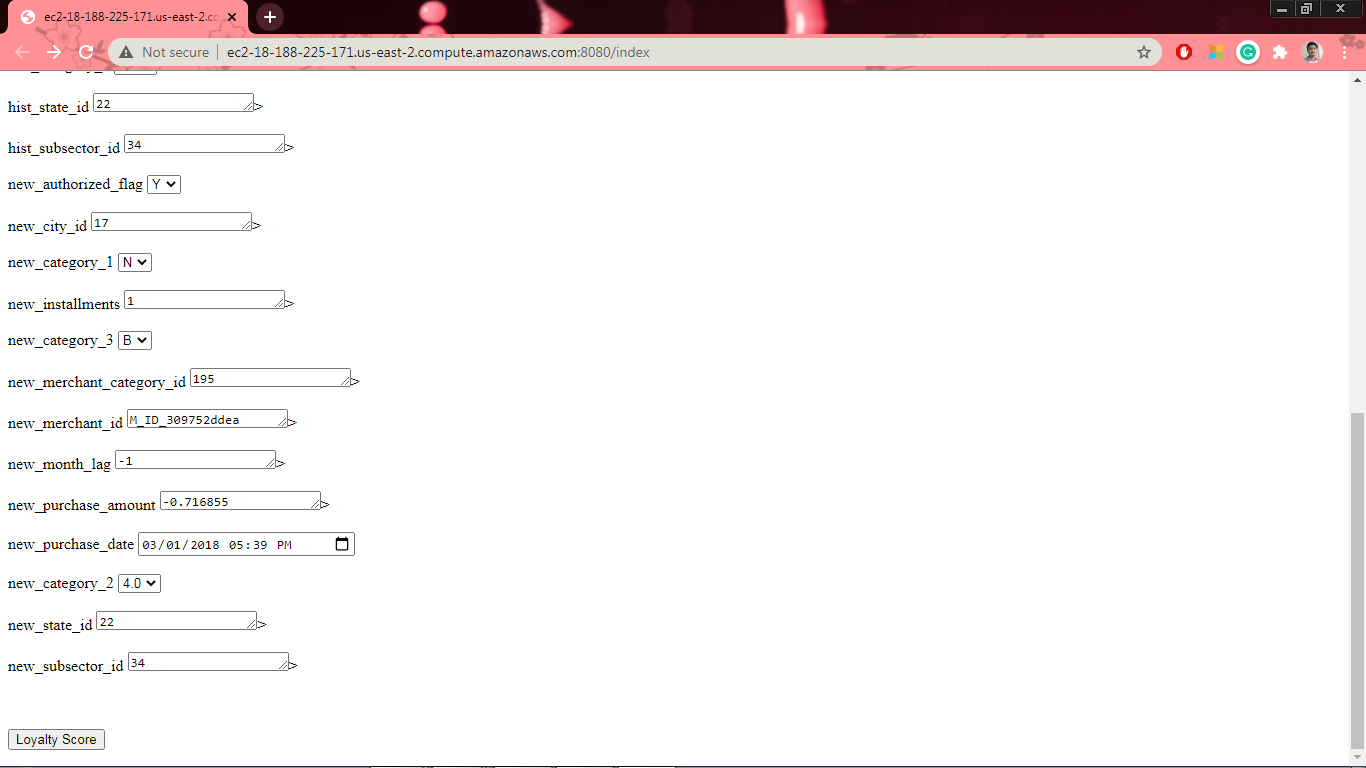

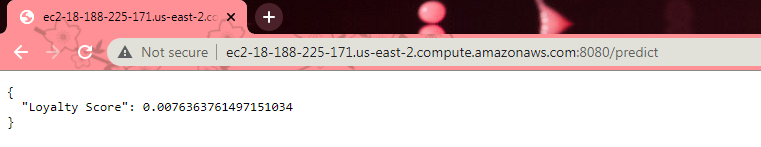